In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn import metrics

from keras.wrappers.scikit_learn import KerasRegressor
#from keras import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

# load a saved model
from keras.models import load_model

from matplotlib import pyplot

import os
%matplotlib inline
print(os.listdir("../dados/input"))


Using TensorFlow backend.


['teste.csv', 'todos.csv', 'todos2.csv', 'todos2.ods', 'treino.csv']


In [2]:
original_data = pd.read_csv('../dados/input/treino.csv')

In [3]:
X_train = original_data.iloc[:,1:19]

In [4]:
X_train.values

array([[ 29.9 ,  77.25,   0.  , ..., 101.  , 178.  , 215.  ],
       [ 29.2 ,  74.25,   1.  , ..., 178.  , 215.  , 263.  ],
       [ 31.9 ,  67.5 ,   0.  , ..., 215.  , 263.  , 145.  ],
       ...,
       [ 24.1 ,  88.25,   1.  , ...,   0.  ,   0.  ,   0.  ],
       [ 20.3 ,  78.75,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [ 25.2 ,  83.5 ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

In [5]:
Y_train = original_data.iloc[:,19].values

In [6]:
Y_train

array([ 42,  70,  64, 101, 178, 215, 263, 145, 295, 351, 387, 294, 194,
       460, 363, 437, 314, 212, 396, 336, 427, 312, 218, 407, 428, 306,
       220, 367, 352, 463, 320, 306, 451, 353,  95, 149, 209, 227, 202,
       233, 391, 358, 456, 335, 323, 469, 319, 297, 411, 370, 412, 331,
       255, 446, 394, 472, 361, 263, 428, 336, 470, 343, 232, 449, 386,
       477, 377, 347, 480, 359, 224, 450, 375, 491, 347, 266, 415, 405,
       464, 358, 253, 446, 388, 523, 346, 245, 438, 361, 503, 319,  39,
        45,  97, 115, 138, 134, 211, 308, 353, 401, 382, 321, 352, 428,
       453, 433, 376, 449, 403, 286, 408, 393, 442, 431,  17,  12,  17,
        27,  16, 141, 117,  42,  20, 363, 162,  35, 351,  21,  23,  27,
        28, 162,  23,  14,  84,  41,   9,  15,  15,  17,  26,  10,  14,
        17,  26,  10,  22,  14], dtype=int64)

In [7]:
test_data = pd.read_csv('../dados/input/teste.csv')

In [8]:
Y_test = test_data.iloc[:,19].values

In [9]:
X_test = test_data.iloc[:,1:19]

In [10]:
scaler = StandardScaler().fit(X_train)
standardized_X_train = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

In [11]:
early_stopping_monitor = EarlyStopping(
                                        monitor = 'mean_squared_error', 
                                        mode = 'min',
                                        min_delta=1,
                                        verbose=0,
                                        patience = 500
)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='mean_squared_error', mode='min', verbose=0, save_best_only=True)

In [12]:
model1 = Sequential()
model1.add(
            Dense(
                    9,
                    activation='relu',
                    input_dim=standardized_X_train.shape[1]
            )
)
model1.add(
            Dense(1)
)
model1.compile(
                loss='mean_squared_error',
                optimizer='adam',
                metrics=[   'accuracy',
                            'mse',
                            'mae',
                        ]
)

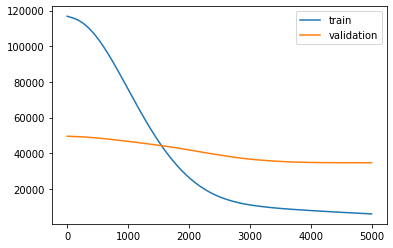

In [13]:
model1_history = model1.fit(
            standardized_X_train,
            Y_train,
            batch_size=148,
            epochs=5000,
            validation_split=0.3,
            #validation_data=(standardized_X_test,Y_test),
            verbose=0,
            callbacks=[model_checkpoint,early_stopping_monitor]
)

saved_model1 = load_model('best_model.h5')

pyplot.plot(model1_history.history['loss'], label='train')
pyplot.plot(model1_history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [14]:
model2 = Sequential()

model2.add(
            Dense(
                    standardized_X_train.shape[1],
                    activation='relu',
                    input_dim=standardized_X_train.shape[1]
            )
)
model2.add(
            Dense(
                    9,
                    activation='relu',
                    input_dim=standardized_X_train.shape[1]
            )
)
model2.add(
            Dense(1)
)
model2.compile(
                loss='mean_squared_error',
                optimizer='adam',
                metrics=[   'accuracy',
                            'mse',
                            'mae',
                        ]
)

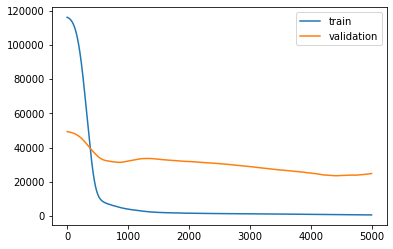

In [15]:
model2_history = model2.fit(
            standardized_X_train,
            Y_train,
            batch_size=148,
            epochs=5000,
            validation_split=0.3,
            #validation_data=(standardized_X_test,Y_test),
            verbose=0,
            callbacks=[model_checkpoint,early_stopping_monitor]
)
saved_model2 = load_model('best_model.h5')

pyplot.plot(model2_history.history['loss'], label='train')
pyplot.plot(model2_history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [16]:
model3 = Sequential()
model3.add(
            Dense(
                    standardized_X_train.shape[1],
                    activation='relu',
                    input_dim=standardized_X_train.shape[1]
            )
)
model3.add(
            Dense(
                    10,
                    activation='relu',
                    input_dim=standardized_X_train.shape[1]
            )
)
model3.add(
            Dense(
                    5,
                    activation='relu',
                    input_dim=10
            )
)
model3.add(
            Dense(1)
)
model3.compile(
                loss='mean_squared_error',
                optimizer='adam',
                metrics=[   'accuracy',
                            'mse',
                            'mae',
                        ]
)

Train on 103 samples, validate on 45 samples
Epoch 1/5000
103/103 [==============================] - 0s 5ms/step - loss: 116369.0781 - acc: 0.0000e+00 - mean_squared_error: 116369.0781 - mean_absolute_error: 320.4309 - val_loss: 49395.6719 - val_acc: 0.0000e+00 - val_mean_squared_error: 49395.6719 - val_mean_absolute_error: 142.8667
Epoch 2/5000
103/103 [==============================] - 0s 29us/step - loss: 116356.7656 - acc: 0.0000e+00 - mean_squared_error: 116356.7656 - mean_absolute_error: 320.4124 - val_loss: 49392.3125 - val_acc: 0.0000e+00 - val_mean_squared_error: 49392.3125 - val_mean_absolute_error: 142.8558
Epoch 3/5000
103/103 [==============================] - 0s 19us/step - loss: 116346.5234 - acc: 0.0000e+00 - mean_squared_error: 116346.5234 - mean_absolute_error: 320.3969 - val_loss: 49388.7344 - val_acc: 0.0000e+00 - val_mean_squared_error: 49388.7344 - val_mean_absolute_error: 142.8440
Epoch 4/5000
103/103 [==============================] - 0s 29us/step - loss: 116335

Epoch 29/5000
103/103 [==============================] - 0s 29us/step - loss: 115997.0547 - acc: 0.0000e+00 - mean_squared_error: 115997.0547 - mean_absolute_error: 319.8738 - val_loss: 49260.0117 - val_acc: 0.0000e+00 - val_mean_squared_error: 49260.0117 - val_mean_absolute_error: 142.4816
Epoch 30/5000
103/103 [==============================] - 0s 29us/step - loss: 115978.3906 - acc: 0.0000e+00 - mean_squared_error: 115978.3906 - mean_absolute_error: 319.8464 - val_loss: 49254.1016 - val_acc: 0.0000e+00 - val_mean_squared_error: 49254.1016 - val_mean_absolute_error: 142.4675
Epoch 31/5000
103/103 [==============================] - 0s 29us/step - loss: 115959.1328 - acc: 0.0000e+00 - mean_squared_error: 115959.1328 - mean_absolute_error: 319.8181 - val_loss: 49248.0781 - val_acc: 0.0000e+00 - val_mean_squared_error: 49248.0781 - val_mean_absolute_error: 142.4533
Epoch 32/5000
103/103 [==============================] - 0s 29us/step - loss: 115939.4453 - acc: 0.0000e+00 - mean_squared_e

Epoch 58/5000
103/103 [==============================] - 0s 29us/step - loss: 115161.0391 - acc: 0.0000e+00 - mean_squared_error: 115161.0391 - mean_absolute_error: 318.6568 - val_loss: 49045.7852 - val_acc: 0.0000e+00 - val_mean_squared_error: 49045.7852 - val_mean_absolute_error: 142.0014
Epoch 59/5000
103/103 [==============================] - 0s 29us/step - loss: 115117.7969 - acc: 0.0000e+00 - mean_squared_error: 115117.7969 - mean_absolute_error: 318.5944 - val_loss: 49035.9844 - val_acc: 0.0000e+00 - val_mean_squared_error: 49035.9844 - val_mean_absolute_error: 141.9803
Epoch 60/5000
103/103 [==============================] - 0s 49us/step - loss: 115073.3125 - acc: 0.0000e+00 - mean_squared_error: 115073.3125 - mean_absolute_error: 318.5302 - val_loss: 49026.0000 - val_acc: 0.0000e+00 - val_mean_squared_error: 49026.0000 - val_mean_absolute_error: 141.9590
Epoch 61/5000
103/103 [==============================] - 0s 29us/step - loss: 115027.4297 - acc: 0.0000e+00 - mean_squared_e

Epoch 87/5000
103/103 [==============================] - 0s 39us/step - loss: 113356.9688 - acc: 0.0000e+00 - mean_squared_error: 113356.9688 - mean_absolute_error: 316.0237 - val_loss: 48661.5664 - val_acc: 0.0000e+00 - val_mean_squared_error: 48661.5664 - val_mean_absolute_error: 141.2752
Epoch 88/5000
103/103 [==============================] - 0s 29us/step - loss: 113272.9844 - acc: 0.0000e+00 - mean_squared_error: 113272.9844 - mean_absolute_error: 315.9004 - val_loss: 48644.8398 - val_acc: 0.0000e+00 - val_mean_squared_error: 48644.8398 - val_mean_absolute_error: 141.2463
Epoch 89/5000
103/103 [==============================] - 0s 29us/step - loss: 113187.4375 - acc: 0.0000e+00 - mean_squared_error: 113187.4375 - mean_absolute_error: 315.7747 - val_loss: 48627.9766 - val_acc: 0.0000e+00 - val_mean_squared_error: 48627.9766 - val_mean_absolute_error: 141.2172
Epoch 90/5000
103/103 [==============================] - 0s 29us/step - loss: 113100.2734 - acc: 0.0000e+00 - mean_squared_e

103/103 [==============================] - 0s 29us/step - loss: 110292.3203 - acc: 0.0000e+00 - mean_squared_error: 110292.3203 - mean_absolute_error: 311.5199 - val_loss: 48102.9766 - val_acc: 0.0000e+00 - val_mean_squared_error: 48102.9766 - val_mean_absolute_error: 140.3242
Epoch 116/5000
103/103 [==============================] - 0s 29us/step - loss: 110149.6406 - acc: 0.0000e+00 - mean_squared_error: 110149.6406 - mean_absolute_error: 311.3094 - val_loss: 48079.4492 - val_acc: 0.0000e+00 - val_mean_squared_error: 48079.4492 - val_mean_absolute_error: 140.2851
Epoch 117/5000
103/103 [==============================] - 0s 39us/step - loss: 110004.1172 - acc: 0.0000e+00 - mean_squared_error: 110004.1172 - mean_absolute_error: 311.0945 - val_loss: 48055.3594 - val_acc: 0.0000e+00 - val_mean_squared_error: 48055.3594 - val_mean_absolute_error: 140.2454
Epoch 118/5000
103/103 [==============================] - 0s 39us/step - loss: 109855.8281 - acc: 0.0000e+00 - mean_squared_error: 10985

103/103 [==============================] - 0s 29us/step - loss: 105202.4453 - acc: 0.0000e+00 - mean_squared_error: 105202.4453 - mean_absolute_error: 303.9465 - val_loss: 47311.0781 - val_acc: 0.0000e+00 - val_mean_squared_error: 47311.0781 - val_mean_absolute_error: 139.0700
Epoch 144/5000
103/103 [==============================] - 0s 29us/step - loss: 104972.3125 - acc: 0.0000e+00 - mean_squared_error: 104972.3125 - mean_absolute_error: 303.6003 - val_loss: 47277.5898 - val_acc: 0.0000e+00 - val_mean_squared_error: 47277.5898 - val_mean_absolute_error: 139.0172
Epoch 145/5000
103/103 [==============================] - 0s 29us/step - loss: 104739.0703 - acc: 0.0000e+00 - mean_squared_error: 104739.0703 - mean_absolute_error: 303.2491 - val_loss: 47243.7266 - val_acc: 0.0000e+00 - val_mean_squared_error: 47243.7266 - val_mean_absolute_error: 138.9633
Epoch 146/5000
103/103 [==============================] - 0s 39us/step - loss: 104502.0312 - acc: 0.0000e+00 - mean_squared_error: 10450

Epoch 172/5000
103/103 [==============================] - 0s 29us/step - loss: 96776.1953 - acc: 0.0000e+00 - mean_squared_error: 96776.1953 - mean_absolute_error: 291.0138 - val_loss: 46136.2344 - val_acc: 0.0000e+00 - val_mean_squared_error: 46136.2344 - val_mean_absolute_error: 137.1673
Epoch 173/5000
103/103 [==============================] - 0s 29us/step - loss: 96412.6953 - acc: 0.0000e+00 - mean_squared_error: 96412.6953 - mean_absolute_error: 290.4434 - val_loss: 46087.7148 - val_acc: 0.0000e+00 - val_mean_squared_error: 46087.7148 - val_mean_absolute_error: 137.0889
Epoch 174/5000
103/103 [==============================] - 0s 39us/step - loss: 96044.0547 - acc: 0.0000e+00 - mean_squared_error: 96044.0547 - mean_absolute_error: 289.8637 - val_loss: 46038.6875 - val_acc: 0.0000e+00 - val_mean_squared_error: 46038.6875 - val_mean_absolute_error: 137.0098
Epoch 175/5000
103/103 [==============================] - 0s 29us/step - loss: 95670.2422 - acc: 0.0000e+00 - mean_squared_erro

Epoch 201/5000
103/103 [==============================] - 0s 29us/step - loss: 84033.5312 - acc: 0.0000e+00 - mean_squared_error: 84033.5312 - mean_absolute_error: 270.2830 - val_loss: 44502.8594 - val_acc: 0.0000e+00 - val_mean_squared_error: 44502.8594 - val_mean_absolute_error: 134.5003
Epoch 202/5000
103/103 [==============================] - 0s 39us/step - loss: 83513.1328 - acc: 0.0000e+00 - mean_squared_error: 83513.1328 - mean_absolute_error: 269.4014 - val_loss: 44438.1562 - val_acc: 0.0000e+00 - val_mean_squared_error: 44438.1562 - val_mean_absolute_error: 134.3948
Epoch 203/5000
103/103 [==============================] - 0s 39us/step - loss: 82987.1641 - acc: 0.0000e+00 - mean_squared_error: 82987.1641 - mean_absolute_error: 268.5074 - val_loss: 44372.1602 - val_acc: 0.0000e+00 - val_mean_squared_error: 44372.1602 - val_mean_absolute_error: 134.2872
Epoch 204/5000
103/103 [==============================] - 0s 29us/step - loss: 82456.0078 - acc: 0.0000e+00 - mean_squared_erro

Epoch 230/5000
103/103 [==============================] - 0s 49us/step - loss: 66923.0234 - acc: 0.0000e+00 - mean_squared_error: 66923.0234 - mean_absolute_error: 239.4798 - val_loss: 42366.9844 - val_acc: 0.0000e+00 - val_mean_squared_error: 42366.9844 - val_mean_absolute_error: 130.9487
Epoch 231/5000
103/103 [==============================] - 0s 39us/step - loss: 66269.6719 - acc: 0.0000e+00 - mean_squared_error: 66269.6719 - mean_absolute_error: 238.2169 - val_loss: 42285.4648 - val_acc: 0.0000e+00 - val_mean_squared_error: 42285.4648 - val_mean_absolute_error: 130.8128
Epoch 232/5000
103/103 [==============================] - 0s 39us/step - loss: 65613.1719 - acc: 0.0000e+00 - mean_squared_error: 65613.1719 - mean_absolute_error: 236.9404 - val_loss: 42203.3594 - val_acc: 0.0000e+00 - val_mean_squared_error: 42203.3594 - val_mean_absolute_error: 130.6754
Epoch 233/5000
103/103 [==============================] - 0s 49us/step - loss: 64952.4922 - acc: 0.0000e+00 - mean_squared_erro

Epoch 259/5000
103/103 [==============================] - 0s 39us/step - loss: 47191.9258 - acc: 0.0000e+00 - mean_squared_error: 47191.9258 - mean_absolute_error: 197.3211 - val_loss: 39812.3281 - val_acc: 0.0000e+00 - val_mean_squared_error: 39812.3281 - val_mean_absolute_error: 126.6407
Epoch 260/5000
103/103 [==============================] - 0s 39us/step - loss: 46508.3867 - acc: 0.0097 - mean_squared_error: 46508.3867 - mean_absolute_error: 195.6752 - val_loss: 39716.5469 - val_acc: 0.0000e+00 - val_mean_squared_error: 39716.5469 - val_mean_absolute_error: 126.4755
Epoch 261/5000
103/103 [==============================] - 0s 29us/step - loss: 45826.7539 - acc: 0.0000e+00 - mean_squared_error: 45826.7539 - mean_absolute_error: 194.0416 - val_loss: 39620.4375 - val_acc: 0.0000e+00 - val_mean_squared_error: 39620.4375 - val_mean_absolute_error: 126.3099
Epoch 262/5000
103/103 [==============================] - 0s 39us/step - loss: 45147.1328 - acc: 0.0000e+00 - mean_squared_error: 4

Epoch 288/5000
103/103 [==============================] - 0s 39us/step - loss: 28928.4512 - acc: 0.0000e+00 - mean_squared_error: 28928.4512 - mean_absolute_error: 147.2856 - val_loss: 36936.7656 - val_acc: 0.0000e+00 - val_mean_squared_error: 36936.7656 - val_mean_absolute_error: 121.5839
Epoch 289/5000
103/103 [==============================] - 0s 39us/step - loss: 28387.1094 - acc: 0.0000e+00 - mean_squared_error: 28387.1094 - mean_absolute_error: 145.5103 - val_loss: 36835.4648 - val_acc: 0.0000e+00 - val_mean_squared_error: 36835.4648 - val_mean_absolute_error: 121.3983
Epoch 290/5000
103/103 [==============================] - 0s 29us/step - loss: 27852.7578 - acc: 0.0000e+00 - mean_squared_error: 27852.7578 - mean_absolute_error: 143.7316 - val_loss: 36734.3281 - val_acc: 0.0000e+00 - val_mean_squared_error: 36734.3281 - val_mean_absolute_error: 121.2122
Epoch 291/5000
103/103 [==============================] - 0s 29us/step - loss: 27327.1230 - acc: 0.0000e+00 - mean_squared_erro

Epoch 317/5000
103/103 [==============================] - 0s 39us/step - loss: 16630.8184 - acc: 0.0000e+00 - mean_squared_error: 16630.8184 - mean_absolute_error: 100.1642 - val_loss: 34040.4297 - val_acc: 0.0000e+00 - val_mean_squared_error: 34040.4297 - val_mean_absolute_error: 115.9258
Epoch 318/5000
103/103 [==============================] - 0s 29us/step - loss: 16335.8564 - acc: 0.0000e+00 - mean_squared_error: 16335.8564 - mean_absolute_error: 98.9426 - val_loss: 33944.0156 - val_acc: 0.0000e+00 - val_mean_squared_error: 33944.0156 - val_mean_absolute_error: 115.7271
Epoch 319/5000
103/103 [==============================] - 0s 29us/step - loss: 16048.7363 - acc: 0.0000e+00 - mean_squared_error: 16048.7363 - mean_absolute_error: 97.7285 - val_loss: 33848.2500 - val_acc: 0.0000e+00 - val_mean_squared_error: 33848.2500 - val_mean_absolute_error: 115.5290
Epoch 320/5000
103/103 [==============================] - 0s 29us/step - loss: 15770.1270 - acc: 0.0097 - mean_squared_error: 157

Epoch 346/5000
103/103 [==============================] - 0s 29us/step - loss: 10920.9053 - acc: 0.0000e+00 - mean_squared_error: 10920.9053 - mean_absolute_error: 73.6197 - val_loss: 31526.4941 - val_acc: 0.0222 - val_mean_squared_error: 31526.4941 - val_mean_absolute_error: 110.4695
Epoch 347/5000
103/103 [==============================] - 0s 29us/step - loss: 10808.4717 - acc: 0.0000e+00 - mean_squared_error: 10808.4717 - mean_absolute_error: 73.0365 - val_loss: 31453.1855 - val_acc: 0.0000e+00 - val_mean_squared_error: 31453.1855 - val_mean_absolute_error: 110.3035
Epoch 348/5000
103/103 [==============================] - 0s 29us/step - loss: 10699.9736 - acc: 0.0000e+00 - mean_squared_error: 10699.9736 - mean_absolute_error: 72.4621 - val_loss: 31380.8750 - val_acc: 0.0000e+00 - val_mean_squared_error: 31380.8750 - val_mean_absolute_error: 110.1389
Epoch 349/5000
103/103 [==============================] - 0s 29us/step - loss: 10595.2363 - acc: 0.0000e+00 - mean_squared_error: 1059

Epoch 375/5000
103/103 [==============================] - 0s 39us/step - loss: 8840.1641 - acc: 0.0097 - mean_squared_error: 8840.1641 - mean_absolute_error: 62.3891 - val_loss: 29815.8672 - val_acc: 0.0000e+00 - val_mean_squared_error: 29815.8672 - val_mean_absolute_error: 106.3139
Epoch 376/5000
103/103 [==============================] - 0s 29us/step - loss: 8797.3809 - acc: 0.0194 - mean_squared_error: 8797.3809 - mean_absolute_error: 62.1761 - val_loss: 29771.2500 - val_acc: 0.0000e+00 - val_mean_squared_error: 29771.2500 - val_mean_absolute_error: 106.1949
Epoch 377/5000
103/103 [==============================] - 0s 39us/step - loss: 8755.6426 - acc: 0.0097 - mean_squared_error: 8755.6426 - mean_absolute_error: 61.9986 - val_loss: 29727.2109 - val_acc: 0.0000e+00 - val_mean_squared_error: 29727.2109 - val_mean_absolute_error: 106.0770
Epoch 378/5000
103/103 [==============================] - 0s 29us/step - loss: 8715.0293 - acc: 0.0194 - mean_squared_error: 8715.0293 - mean_absolu

Epoch 404/5000
103/103 [==============================] - 0s 39us/step - loss: 7922.6128 - acc: 0.0000e+00 - mean_squared_error: 7922.6128 - mean_absolute_error: 58.2652 - val_loss: 28783.0938 - val_acc: 0.0000e+00 - val_mean_squared_error: 28783.0938 - val_mean_absolute_error: 103.3990
Epoch 405/5000
103/103 [==============================] - 0s 29us/step - loss: 7898.8901 - acc: 0.0000e+00 - mean_squared_error: 7898.8901 - mean_absolute_error: 58.1482 - val_loss: 28754.3047 - val_acc: 0.0000e+00 - val_mean_squared_error: 28754.3047 - val_mean_absolute_error: 103.3171
Epoch 406/5000
103/103 [==============================] - 0s 29us/step - loss: 7875.4917 - acc: 0.0000e+00 - mean_squared_error: 7875.4917 - mean_absolute_error: 58.0321 - val_loss: 28725.8340 - val_acc: 0.0000e+00 - val_mean_squared_error: 28725.8340 - val_mean_absolute_error: 103.2358
Epoch 407/5000
103/103 [==============================] - 0s 39us/step - loss: 7852.3672 - acc: 0.0000e+00 - mean_squared_error: 7852.36

Epoch 433/5000
103/103 [==============================] - 0s 39us/step - loss: 7334.3867 - acc: 0.0097 - mean_squared_error: 7334.3867 - mean_absolute_error: 55.3044 - val_loss: 28051.1270 - val_acc: 0.0222 - val_mean_squared_error: 28051.1270 - val_mean_absolute_error: 101.2805
Epoch 434/5000
103/103 [==============================] - 0s 29us/step - loss: 7316.9868 - acc: 0.0097 - mean_squared_error: 7316.9868 - mean_absolute_error: 55.2164 - val_loss: 28028.7910 - val_acc: 0.0222 - val_mean_squared_error: 28028.7910 - val_mean_absolute_error: 101.2192
Epoch 435/5000
103/103 [==============================] - 0s 39us/step - loss: 7299.7349 - acc: 0.0097 - mean_squared_error: 7299.7349 - mean_absolute_error: 55.1288 - val_loss: 28006.6055 - val_acc: 0.0222 - val_mean_squared_error: 28006.6055 - val_mean_absolute_error: 101.1581
Epoch 436/5000
103/103 [==============================] - 0s 29us/step - loss: 7282.6128 - acc: 0.0097 - mean_squared_error: 7282.6128 - mean_absolute_error: 55

Epoch 463/5000
103/103 [==============================] - 0s 39us/step - loss: 6865.3784 - acc: 0.0097 - mean_squared_error: 6865.3784 - mean_absolute_error: 52.8599 - val_loss: 27425.2891 - val_acc: 0.0444 - val_mean_squared_error: 27425.2891 - val_mean_absolute_error: 99.5120
Epoch 464/5000
103/103 [==============================] - 0s 39us/step - loss: 6851.2568 - acc: 0.0097 - mean_squared_error: 6851.2568 - mean_absolute_error: 52.7862 - val_loss: 27405.7715 - val_acc: 0.0444 - val_mean_squared_error: 27405.7715 - val_mean_absolute_error: 99.4591
Epoch 465/5000
103/103 [==============================] - 0s 29us/step - loss: 6837.1870 - acc: 0.0194 - mean_squared_error: 6837.1870 - mean_absolute_error: 52.7126 - val_loss: 27386.3340 - val_acc: 0.0444 - val_mean_squared_error: 27386.3340 - val_mean_absolute_error: 99.4063
Epoch 466/5000
103/103 [==============================] - 0s 39us/step - loss: 6823.1826 - acc: 0.0097 - mean_squared_error: 6823.1826 - mean_absolute_error: 52.63

Epoch 493/5000
103/103 [==============================] - 0s 29us/step - loss: 6468.0430 - acc: 0.0000e+00 - mean_squared_error: 6468.0430 - mean_absolute_error: 50.8416 - val_loss: 26878.2031 - val_acc: 0.0222 - val_mean_squared_error: 26878.2031 - val_mean_absolute_error: 98.0690
Epoch 494/5000
103/103 [==============================] - 0s 49us/step - loss: 6455.5366 - acc: 0.0000e+00 - mean_squared_error: 6455.5366 - mean_absolute_error: 50.7855 - val_loss: 26861.0176 - val_acc: 0.0222 - val_mean_squared_error: 26861.0176 - val_mean_absolute_error: 98.0249
Epoch 495/5000
103/103 [==============================] - 0s 29us/step - loss: 6443.0991 - acc: 0.0000e+00 - mean_squared_error: 6443.0991 - mean_absolute_error: 50.7299 - val_loss: 26843.9258 - val_acc: 0.0222 - val_mean_squared_error: 26843.9258 - val_mean_absolute_error: 97.9843
Epoch 496/5000
103/103 [==============================] - 0s 39us/step - loss: 6430.6792 - acc: 0.0000e+00 - mean_squared_error: 6430.6792 - mean_absol

Epoch 523/5000
103/103 [==============================] - 0s 39us/step - loss: 6089.5874 - acc: 0.0097 - mean_squared_error: 6089.5874 - mean_absolute_error: 49.3144 - val_loss: 26375.8945 - val_acc: 0.0000e+00 - val_mean_squared_error: 26375.8945 - val_mean_absolute_error: 96.9556
Epoch 524/5000
103/103 [==============================] - 0s 29us/step - loss: 6076.1978 - acc: 0.0097 - mean_squared_error: 6076.1978 - mean_absolute_error: 49.2673 - val_loss: 26359.1777 - val_acc: 0.0000e+00 - val_mean_squared_error: 26359.1777 - val_mean_absolute_error: 96.9235
Epoch 525/5000
103/103 [==============================] - 0s 29us/step - loss: 6062.7783 - acc: 0.0097 - mean_squared_error: 6062.7783 - mean_absolute_error: 49.2201 - val_loss: 26342.5137 - val_acc: 0.0000e+00 - val_mean_squared_error: 26342.5137 - val_mean_absolute_error: 96.8915
Epoch 526/5000
103/103 [==============================] - 0s 29us/step - loss: 6049.3501 - acc: 0.0097 - mean_squared_error: 6049.3501 - mean_absolute_

Epoch 553/5000
103/103 [==============================] - 0s 29us/step - loss: 5685.7627 - acc: 0.0194 - mean_squared_error: 5685.7627 - mean_absolute_error: 47.9497 - val_loss: 25882.7715 - val_acc: 0.0222 - val_mean_squared_error: 25882.7715 - val_mean_absolute_error: 96.8455
Epoch 554/5000
103/103 [==============================] - 0s 39us/step - loss: 5672.3828 - acc: 0.0194 - mean_squared_error: 5672.3828 - mean_absolute_error: 47.9059 - val_loss: 25866.9883 - val_acc: 0.0222 - val_mean_squared_error: 25866.9883 - val_mean_absolute_error: 96.8556
Epoch 555/5000
103/103 [==============================] - 0s 39us/step - loss: 5659.0122 - acc: 0.0194 - mean_squared_error: 5659.0122 - mean_absolute_error: 47.8621 - val_loss: 25851.2754 - val_acc: 0.0444 - val_mean_squared_error: 25851.2754 - val_mean_absolute_error: 96.8665
Epoch 556/5000
103/103 [==============================] - 0s 39us/step - loss: 5645.6519 - acc: 0.0194 - mean_squared_error: 5645.6519 - mean_absolute_error: 47.81

Epoch 583/5000
103/103 [==============================] - 0s 39us/step - loss: 5292.4893 - acc: 0.0291 - mean_squared_error: 5292.4893 - mean_absolute_error: 46.7500 - val_loss: 25436.5703 - val_acc: 0.0000e+00 - val_mean_squared_error: 25436.5703 - val_mean_absolute_error: 97.6754
Epoch 584/5000
103/103 [==============================] - 0s 29us/step - loss: 5279.7935 - acc: 0.0291 - mean_squared_error: 5279.7935 - mean_absolute_error: 46.7136 - val_loss: 25422.6660 - val_acc: 0.0000e+00 - val_mean_squared_error: 25422.6660 - val_mean_absolute_error: 97.7166
Epoch 585/5000
103/103 [==============================] - 0s 29us/step - loss: 5267.1226 - acc: 0.0291 - mean_squared_error: 5267.1226 - mean_absolute_error: 46.6774 - val_loss: 25408.8203 - val_acc: 0.0000e+00 - val_mean_squared_error: 25408.8203 - val_mean_absolute_error: 97.7579
Epoch 586/5000
103/103 [==============================] - 0s 39us/step - loss: 5254.4653 - acc: 0.0291 - mean_squared_error: 5254.4653 - mean_absolute_

Epoch 613/5000
103/103 [==============================] - 0s 39us/step - loss: 4923.1836 - acc: 0.0097 - mean_squared_error: 4923.1836 - mean_absolute_error: 45.6707 - val_loss: 25055.9395 - val_acc: 0.0000e+00 - val_mean_squared_error: 25055.9395 - val_mean_absolute_error: 99.1007
Epoch 614/5000
103/103 [==============================] - 0s 29us/step - loss: 4911.1616 - acc: 0.0097 - mean_squared_error: 4911.1616 - mean_absolute_error: 45.6339 - val_loss: 25044.8086 - val_acc: 0.0000e+00 - val_mean_squared_error: 25044.8086 - val_mean_absolute_error: 99.1529
Epoch 615/5000
103/103 [==============================] - 0s 29us/step - loss: 4899.1328 - acc: 0.0097 - mean_squared_error: 4899.1328 - mean_absolute_error: 45.5968 - val_loss: 25033.8164 - val_acc: 0.0000e+00 - val_mean_squared_error: 25033.8164 - val_mean_absolute_error: 99.2053
Epoch 616/5000
103/103 [==============================] - 0s 39us/step - loss: 4887.1191 - acc: 0.0097 - mean_squared_error: 4887.1191 - mean_absolute_

Epoch 643/5000
103/103 [==============================] - 0s 39us/step - loss: 4569.6836 - acc: 0.0097 - mean_squared_error: 4569.6836 - mean_absolute_error: 44.5419 - val_loss: 24765.6133 - val_acc: 0.0222 - val_mean_squared_error: 24765.6133 - val_mean_absolute_error: 100.7438
Epoch 644/5000
103/103 [==============================] - 0s 39us/step - loss: 4558.2422 - acc: 0.0097 - mean_squared_error: 4558.2422 - mean_absolute_error: 44.5034 - val_loss: 24757.3340 - val_acc: 0.0222 - val_mean_squared_error: 24757.3340 - val_mean_absolute_error: 100.8022
Epoch 645/5000
103/103 [==============================] - 0s 29us/step - loss: 4546.8628 - acc: 0.0097 - mean_squared_error: 4546.8628 - mean_absolute_error: 44.4650 - val_loss: 24749.1328 - val_acc: 0.0222 - val_mean_squared_error: 24749.1328 - val_mean_absolute_error: 100.8610
Epoch 646/5000
103/103 [==============================] - 0s 29us/step - loss: 4535.5508 - acc: 0.0097 - mean_squared_error: 4535.5508 - mean_absolute_error: 44

Epoch 673/5000
103/103 [==============================] - 0s 39us/step - loss: 4246.4878 - acc: 0.0291 - mean_squared_error: 4246.4878 - mean_absolute_error: 43.4275 - val_loss: 24505.5547 - val_acc: 0.0000e+00 - val_mean_squared_error: 24505.5547 - val_mean_absolute_error: 102.5776
Epoch 674/5000
103/103 [==============================] - 0s 39us/step - loss: 4236.2876 - acc: 0.0291 - mean_squared_error: 4236.2876 - mean_absolute_error: 43.3936 - val_loss: 24496.6953 - val_acc: 0.0000e+00 - val_mean_squared_error: 24496.6953 - val_mean_absolute_error: 102.6401
Epoch 675/5000
103/103 [==============================] - 0s 29us/step - loss: 4226.1216 - acc: 0.0291 - mean_squared_error: 4226.1216 - mean_absolute_error: 43.3597 - val_loss: 24487.8418 - val_acc: 0.0222 - val_mean_squared_error: 24487.8418 - val_mean_absolute_error: 102.7025
Epoch 676/5000
103/103 [==============================] - 0s 39us/step - loss: 4215.9839 - acc: 0.0194 - mean_squared_error: 4215.9839 - mean_absolute_e

Epoch 703/5000
103/103 [==============================] - 0s 29us/step - loss: 3955.9929 - acc: 0.0097 - mean_squared_error: 3955.9929 - mean_absolute_error: 42.4617 - val_loss: 24282.4785 - val_acc: 0.0000e+00 - val_mean_squared_error: 24282.4785 - val_mean_absolute_error: 104.4201
Epoch 704/5000
103/103 [==============================] - 0s 39us/step - loss: 3946.8071 - acc: 0.0097 - mean_squared_error: 3946.8071 - mean_absolute_error: 42.4305 - val_loss: 24276.6250 - val_acc: 0.0000e+00 - val_mean_squared_error: 24276.6250 - val_mean_absolute_error: 104.4823
Epoch 705/5000
103/103 [==============================] - 0s 29us/step - loss: 3937.6477 - acc: 0.0097 - mean_squared_error: 3937.6477 - mean_absolute_error: 42.3992 - val_loss: 24270.8418 - val_acc: 0.0000e+00 - val_mean_squared_error: 24270.8418 - val_mean_absolute_error: 104.5444
Epoch 706/5000
103/103 [==============================] - 0s 29us/step - loss: 3928.5225 - acc: 0.0097 - mean_squared_error: 3928.5225 - mean_absolu

Epoch 732/5000
103/103 [==============================] - 0s 29us/step - loss: 3701.1760 - acc: 0.0194 - mean_squared_error: 3701.1760 - mean_absolute_error: 41.5744 - val_loss: 24146.4023 - val_acc: 0.0000e+00 - val_mean_squared_error: 24146.4023 - val_mean_absolute_error: 106.2049
Epoch 733/5000
103/103 [==============================] - 0s 29us/step - loss: 3692.8015 - acc: 0.0194 - mean_squared_error: 3692.8015 - mean_absolute_error: 41.5440 - val_loss: 24143.1328 - val_acc: 0.0000e+00 - val_mean_squared_error: 24143.1328 - val_mean_absolute_error: 106.2655
Epoch 734/5000
103/103 [==============================] - 0s 39us/step - loss: 3684.4250 - acc: 0.0291 - mean_squared_error: 3684.4250 - mean_absolute_error: 41.5143 - val_loss: 24139.9590 - val_acc: 0.0000e+00 - val_mean_squared_error: 24139.9590 - val_mean_absolute_error: 106.3265
Epoch 735/5000
103/103 [==============================] - 0s 29us/step - loss: 3676.0691 - acc: 0.0291 - mean_squared_error: 3676.0691 - mean_absolu

Epoch 761/5000
103/103 [==============================] - 0s 29us/step - loss: 3469.1499 - acc: 0.0194 - mean_squared_error: 3469.1499 - mean_absolute_error: 40.7349 - val_loss: 24084.8926 - val_acc: 0.0000e+00 - val_mean_squared_error: 24084.8926 - val_mean_absolute_error: 107.9425
Epoch 762/5000
103/103 [==============================] - 0s 29us/step - loss: 3461.5400 - acc: 0.0194 - mean_squared_error: 3461.5400 - mean_absolute_error: 40.7061 - val_loss: 24083.9883 - val_acc: 0.0000e+00 - val_mean_squared_error: 24083.9883 - val_mean_absolute_error: 108.0001
Epoch 763/5000
103/103 [==============================] - 0s 39us/step - loss: 3453.9536 - acc: 0.0194 - mean_squared_error: 3453.9536 - mean_absolute_error: 40.6775 - val_loss: 24083.1562 - val_acc: 0.0000e+00 - val_mean_squared_error: 24083.1562 - val_mean_absolute_error: 108.0576
Epoch 764/5000
103/103 [==============================] - 0s 29us/step - loss: 3446.3887 - acc: 0.0194 - mean_squared_error: 3446.3887 - mean_absolu

Epoch 790/5000
103/103 [==============================] - 0s 29us/step - loss: 3260.7913 - acc: 0.0194 - mean_squared_error: 3260.7913 - mean_absolute_error: 39.9140 - val_loss: 24080.9414 - val_acc: 0.0000e+00 - val_mean_squared_error: 24080.9414 - val_mean_absolute_error: 109.5850
Epoch 791/5000
103/103 [==============================] - 0s 39us/step - loss: 3254.0090 - acc: 0.0194 - mean_squared_error: 3254.0090 - mean_absolute_error: 39.8862 - val_loss: 24081.5273 - val_acc: 0.0000e+00 - val_mean_squared_error: 24081.5273 - val_mean_absolute_error: 109.6414
Epoch 792/5000
103/103 [==============================] - 0s 19us/step - loss: 3247.2522 - acc: 0.0194 - mean_squared_error: 3247.2522 - mean_absolute_error: 39.8585 - val_loss: 24082.1699 - val_acc: 0.0000e+00 - val_mean_squared_error: 24082.1699 - val_mean_absolute_error: 109.6977
Epoch 793/5000
103/103 [==============================] - 0s 29us/step - loss: 3240.5286 - acc: 0.0194 - mean_squared_error: 3240.5286 - mean_absolu

Epoch 819/5000
103/103 [==============================] - 0s 34us/step - loss: 3073.9822 - acc: 0.0000e+00 - mean_squared_error: 3073.9822 - mean_absolute_error: 39.1496 - val_loss: 24102.2090 - val_acc: 0.0000e+00 - val_mean_squared_error: 24102.2090 - val_mean_absolute_error: 111.2122
Epoch 820/5000
103/103 [==============================] - 0s 29us/step - loss: 3067.9062 - acc: 0.0000e+00 - mean_squared_error: 3067.9062 - mean_absolute_error: 39.1237 - val_loss: 24103.0508 - val_acc: 0.0000e+00 - val_mean_squared_error: 24103.0508 - val_mean_absolute_error: 111.2656
Epoch 821/5000
103/103 [==============================] - 0s 39us/step - loss: 3061.8599 - acc: 0.0000e+00 - mean_squared_error: 3061.8599 - mean_absolute_error: 39.0979 - val_loss: 24103.9668 - val_acc: 0.0000e+00 - val_mean_squared_error: 24103.9668 - val_mean_absolute_error: 111.3187
Epoch 822/5000
103/103 [==============================] - 0s 39us/step - loss: 3055.8303 - acc: 0.0000e+00 - mean_squared_error: 3055.83

Epoch 848/5000
103/103 [==============================] - 0s 39us/step - loss: 2908.2275 - acc: 0.0097 - mean_squared_error: 2908.2275 - mean_absolute_error: 38.3962 - val_loss: 24148.3223 - val_acc: 0.0000e+00 - val_mean_squared_error: 24148.3223 - val_mean_absolute_error: 112.7002
Epoch 849/5000
103/103 [==============================] - 0s 39us/step - loss: 2902.6284 - acc: 0.0097 - mean_squared_error: 2902.6284 - mean_absolute_error: 38.3693 - val_loss: 24151.2168 - val_acc: 0.0000e+00 - val_mean_squared_error: 24151.2168 - val_mean_absolute_error: 112.7484
Epoch 850/5000
103/103 [==============================] - 0s 29us/step - loss: 2897.0088 - acc: 0.0097 - mean_squared_error: 2897.0088 - mean_absolute_error: 38.3423 - val_loss: 24154.2148 - val_acc: 0.0000e+00 - val_mean_squared_error: 24154.2148 - val_mean_absolute_error: 112.7971
Epoch 851/5000
103/103 [==============================] - 0s 29us/step - loss: 2891.4158 - acc: 0.0097 - mean_squared_error: 2891.4158 - mean_absolu

Epoch 877/5000
103/103 [==============================] - 0s 29us/step - loss: 2746.7974 - acc: 0.0000e+00 - mean_squared_error: 2746.7974 - mean_absolute_error: 37.5883 - val_loss: 24238.7969 - val_acc: 0.0000e+00 - val_mean_squared_error: 24238.7969 - val_mean_absolute_error: 114.0690
Epoch 878/5000
103/103 [==============================] - 0s 39us/step - loss: 2741.1433 - acc: 0.0097 - mean_squared_error: 2741.1433 - mean_absolute_error: 37.5611 - val_loss: 24241.9941 - val_acc: 0.0000e+00 - val_mean_squared_error: 24241.9941 - val_mean_absolute_error: 114.1156
Epoch 879/5000
103/103 [==============================] - 0s 29us/step - loss: 2735.4966 - acc: 0.0097 - mean_squared_error: 2735.4966 - mean_absolute_error: 37.5339 - val_loss: 24245.0840 - val_acc: 0.0000e+00 - val_mean_squared_error: 24245.0840 - val_mean_absolute_error: 114.1618
Epoch 880/5000
103/103 [==============================] - 0s 29us/step - loss: 2729.8550 - acc: 0.0097 - mean_squared_error: 2729.8550 - mean_ab

Epoch 906/5000
103/103 [==============================] - 0s 39us/step - loss: 2590.5950 - acc: 0.0097 - mean_squared_error: 2590.5950 - mean_absolute_error: 36.8627 - val_loss: 24351.8105 - val_acc: 0.0222 - val_mean_squared_error: 24351.8105 - val_mean_absolute_error: 115.2703
Epoch 907/5000
103/103 [==============================] - 0s 39us/step - loss: 2585.4121 - acc: 0.0097 - mean_squared_error: 2585.4121 - mean_absolute_error: 36.8388 - val_loss: 24356.3223 - val_acc: 0.0222 - val_mean_squared_error: 24356.3223 - val_mean_absolute_error: 115.3057
Epoch 908/5000
103/103 [==============================] - 0s 29us/step - loss: 2580.2278 - acc: 0.0097 - mean_squared_error: 2580.2278 - mean_absolute_error: 36.8148 - val_loss: 24360.8008 - val_acc: 0.0222 - val_mean_squared_error: 24360.8008 - val_mean_absolute_error: 115.3409
Epoch 909/5000
103/103 [==============================] - 0s 39us/step - loss: 2575.0920 - acc: 0.0097 - mean_squared_error: 2575.0920 - mean_absolute_error: 36

Epoch 936/5000
103/103 [==============================] - 0s 29us/step - loss: 2445.8279 - acc: 0.0097 - mean_squared_error: 2445.8279 - mean_absolute_error: 36.1689 - val_loss: 24493.4551 - val_acc: 0.0222 - val_mean_squared_error: 24493.4551 - val_mean_absolute_error: 116.2327
Epoch 937/5000
103/103 [==============================] - 0s 29us/step - loss: 2441.4248 - acc: 0.0097 - mean_squared_error: 2441.4248 - mean_absolute_error: 36.1472 - val_loss: 24498.5273 - val_acc: 0.0222 - val_mean_squared_error: 24498.5273 - val_mean_absolute_error: 116.2651
Epoch 938/5000
103/103 [==============================] - 0s 29us/step - loss: 2437.0427 - acc: 0.0097 - mean_squared_error: 2437.0427 - mean_absolute_error: 36.1282 - val_loss: 24503.5547 - val_acc: 0.0222 - val_mean_squared_error: 24503.5547 - val_mean_absolute_error: 116.2992
Epoch 939/5000
103/103 [==============================] - 0s 29us/step - loss: 2432.7117 - acc: 0.0097 - mean_squared_error: 2432.7117 - mean_absolute_error: 36

Epoch 966/5000
103/103 [==============================] - 0s 39us/step - loss: 2323.0808 - acc: 0.0000e+00 - mean_squared_error: 2323.0808 - mean_absolute_error: 35.6211 - val_loss: 24638.8301 - val_acc: 0.0444 - val_mean_squared_error: 24638.8301 - val_mean_absolute_error: 117.2234
Epoch 967/5000
103/103 [==============================] - 0s 29us/step - loss: 2319.3303 - acc: 0.0000e+00 - mean_squared_error: 2319.3303 - mean_absolute_error: 35.6062 - val_loss: 24644.2695 - val_acc: 0.0444 - val_mean_squared_error: 24644.2695 - val_mean_absolute_error: 117.2629
Epoch 968/5000
103/103 [==============================] - 0s 29us/step - loss: 2315.5779 - acc: 0.0000e+00 - mean_squared_error: 2315.5779 - mean_absolute_error: 35.5911 - val_loss: 24649.6660 - val_acc: 0.0444 - val_mean_squared_error: 24649.6660 - val_mean_absolute_error: 117.3024
Epoch 969/5000
103/103 [==============================] - 0s 29us/step - loss: 2311.8499 - acc: 0.0000e+00 - mean_squared_error: 2311.8499 - mean_ab

Epoch 995/5000
103/103 [==============================] - 0s 39us/step - loss: 2222.4714 - acc: 0.0000e+00 - mean_squared_error: 2222.4714 - mean_absolute_error: 35.1906 - val_loss: 24789.1562 - val_acc: 0.0000e+00 - val_mean_squared_error: 24789.1562 - val_mean_absolute_error: 118.2141
Epoch 996/5000
103/103 [==============================] - 0s 29us/step - loss: 2219.2888 - acc: 0.0000e+00 - mean_squared_error: 2219.2888 - mean_absolute_error: 35.1761 - val_loss: 24794.7246 - val_acc: 0.0000e+00 - val_mean_squared_error: 24794.7246 - val_mean_absolute_error: 118.2460
Epoch 997/5000
103/103 [==============================] - 0s 39us/step - loss: 2216.0684 - acc: 0.0000e+00 - mean_squared_error: 2216.0684 - mean_absolute_error: 35.1612 - val_loss: 24800.2422 - val_acc: 0.0000e+00 - val_mean_squared_error: 24800.2422 - val_mean_absolute_error: 118.2774
Epoch 998/5000
103/103 [==============================] - 0s 19us/step - loss: 2212.9214 - acc: 0.0000e+00 - mean_squared_error: 2212.92

Epoch 1024/5000
103/103 [==============================] - 0s 29us/step - loss: 2137.5942 - acc: 0.0000e+00 - mean_squared_error: 2137.5942 - mean_absolute_error: 34.7784 - val_loss: 24936.1035 - val_acc: 0.0000e+00 - val_mean_squared_error: 24936.1035 - val_mean_absolute_error: 118.9874
Epoch 1025/5000
103/103 [==============================] - 0s 29us/step - loss: 2134.9272 - acc: 0.0000e+00 - mean_squared_error: 2134.9272 - mean_absolute_error: 34.7639 - val_loss: 24940.9941 - val_acc: 0.0000e+00 - val_mean_squared_error: 24940.9941 - val_mean_absolute_error: 119.0087
Epoch 1026/5000
103/103 [==============================] - 0s 29us/step - loss: 2132.2539 - acc: 0.0000e+00 - mean_squared_error: 2132.2539 - mean_absolute_error: 34.7491 - val_loss: 24945.7910 - val_acc: 0.0000e+00 - val_mean_squared_error: 24945.7910 - val_mean_absolute_error: 119.0294
Epoch 1027/5000
103/103 [==============================] - 0s 39us/step - loss: 2129.6279 - acc: 0.0000e+00 - mean_squared_error: 212

Epoch 1053/5000
103/103 [==============================] - 0s 39us/step - loss: 2064.5247 - acc: 0.0097 - mean_squared_error: 2064.5247 - mean_absolute_error: 34.3461 - val_loss: 25078.8223 - val_acc: 0.0000e+00 - val_mean_squared_error: 25078.8223 - val_mean_absolute_error: 119.5156
Epoch 1054/5000
103/103 [==============================] - 0s 39us/step - loss: 2062.1379 - acc: 0.0097 - mean_squared_error: 2062.1379 - mean_absolute_error: 34.3298 - val_loss: 25083.6465 - val_acc: 0.0000e+00 - val_mean_squared_error: 25083.6465 - val_mean_absolute_error: 119.5277
Epoch 1055/5000
103/103 [==============================] - 0s 39us/step - loss: 2059.7610 - acc: 0.0097 - mean_squared_error: 2059.7610 - mean_absolute_error: 34.3134 - val_loss: 25088.6113 - val_acc: 0.0000e+00 - val_mean_squared_error: 25088.6113 - val_mean_absolute_error: 119.5405
Epoch 1056/5000
103/103 [==============================] - 0s 39us/step - loss: 2057.3721 - acc: 0.0097 - mean_squared_error: 2057.3721 - mean_ab

Epoch 1082/5000
103/103 [==============================] - 0s 39us/step - loss: 1998.3706 - acc: 0.0000e+00 - mean_squared_error: 1998.3706 - mean_absolute_error: 33.8767 - val_loss: 25233.2109 - val_acc: 0.0000e+00 - val_mean_squared_error: 25233.2109 - val_mean_absolute_error: 119.9141
Epoch 1083/5000
103/103 [==============================] - 0s 29us/step - loss: 1996.1267 - acc: 0.0000e+00 - mean_squared_error: 1996.1267 - mean_absolute_error: 33.8580 - val_loss: 25238.3750 - val_acc: 0.0000e+00 - val_mean_squared_error: 25238.3750 - val_mean_absolute_error: 119.9244
Epoch 1084/5000
103/103 [==============================] - 0s 39us/step - loss: 1993.8950 - acc: 0.0000e+00 - mean_squared_error: 1993.8950 - mean_absolute_error: 33.8400 - val_loss: 25243.6328 - val_acc: 0.0000e+00 - val_mean_squared_error: 25243.6328 - val_mean_absolute_error: 119.9358
Epoch 1085/5000
103/103 [==============================] - 0s 39us/step - loss: 1991.6088 - acc: 0.0000e+00 - mean_squared_error: 199

Epoch 1111/5000
103/103 [==============================] - 0s 29us/step - loss: 1934.5292 - acc: 0.0000e+00 - mean_squared_error: 1934.5292 - mean_absolute_error: 33.3668 - val_loss: 25387.9277 - val_acc: 0.0000e+00 - val_mean_squared_error: 25387.9277 - val_mean_absolute_error: 120.2755
Epoch 1112/5000
103/103 [==============================] - 0s 39us/step - loss: 1932.3994 - acc: 0.0000e+00 - mean_squared_error: 1932.3994 - mean_absolute_error: 33.3505 - val_loss: 25394.0801 - val_acc: 0.0000e+00 - val_mean_squared_error: 25394.0801 - val_mean_absolute_error: 120.2938
Epoch 1113/5000
103/103 [==============================] - 0s 29us/step - loss: 1930.2858 - acc: 0.0000e+00 - mean_squared_error: 1930.2858 - mean_absolute_error: 33.3337 - val_loss: 25400.0898 - val_acc: 0.0000e+00 - val_mean_squared_error: 25400.0898 - val_mean_absolute_error: 120.3105
Epoch 1114/5000
103/103 [==============================] - 0s 29us/step - loss: 1928.1506 - acc: 0.0000e+00 - mean_squared_error: 192

Epoch 1140/5000
103/103 [==============================] - 0s 29us/step - loss: 1875.0879 - acc: 0.0194 - mean_squared_error: 1875.0879 - mean_absolute_error: 32.8601 - val_loss: 25563.0977 - val_acc: 0.0000e+00 - val_mean_squared_error: 25563.0977 - val_mean_absolute_error: 120.8487
Epoch 1141/5000
103/103 [==============================] - 0s 39us/step - loss: 1873.0868 - acc: 0.0194 - mean_squared_error: 1873.0868 - mean_absolute_error: 32.8428 - val_loss: 25568.7891 - val_acc: 0.0000e+00 - val_mean_squared_error: 25568.7891 - val_mean_absolute_error: 120.8689
Epoch 1142/5000
103/103 [==============================] - 0s 29us/step - loss: 1871.1906 - acc: 0.0194 - mean_squared_error: 1871.1906 - mean_absolute_error: 32.8256 - val_loss: 25574.6523 - val_acc: 0.0000e+00 - val_mean_squared_error: 25574.6523 - val_mean_absolute_error: 120.8901
Epoch 1143/5000
103/103 [==============================] - 0s 39us/step - loss: 1869.2523 - acc: 0.0194 - mean_squared_error: 1869.2523 - mean_ab

Epoch 1169/5000
103/103 [==============================] - 0s 39us/step - loss: 1819.6356 - acc: 0.0097 - mean_squared_error: 1819.6356 - mean_absolute_error: 32.3712 - val_loss: 25741.1836 - val_acc: 0.0222 - val_mean_squared_error: 25741.1836 - val_mean_absolute_error: 121.4354
Epoch 1170/5000
103/103 [==============================] - 0s 29us/step - loss: 1817.7717 - acc: 0.0097 - mean_squared_error: 1817.7717 - mean_absolute_error: 32.3555 - val_loss: 25747.7285 - val_acc: 0.0222 - val_mean_squared_error: 25747.7285 - val_mean_absolute_error: 121.4570
Epoch 1171/5000
103/103 [==============================] - 0s 29us/step - loss: 1815.9331 - acc: 0.0097 - mean_squared_error: 1815.9331 - mean_absolute_error: 32.3399 - val_loss: 25754.1172 - val_acc: 0.0222 - val_mean_squared_error: 25754.1172 - val_mean_absolute_error: 121.4799
Epoch 1172/5000
103/103 [==============================] - 0s 39us/step - loss: 1814.0850 - acc: 0.0097 - mean_squared_error: 1814.0850 - mean_absolute_error

Epoch 1198/5000
103/103 [==============================] - 0s 29us/step - loss: 1767.2692 - acc: 0.0194 - mean_squared_error: 1767.2692 - mean_absolute_error: 31.8931 - val_loss: 25925.4883 - val_acc: 0.0000e+00 - val_mean_squared_error: 25925.4883 - val_mean_absolute_error: 122.0544
Epoch 1199/5000
103/103 [==============================] - 0s 29us/step - loss: 1765.5417 - acc: 0.0194 - mean_squared_error: 1765.5417 - mean_absolute_error: 31.8765 - val_loss: 25931.6836 - val_acc: 0.0000e+00 - val_mean_squared_error: 25931.6836 - val_mean_absolute_error: 122.0726
Epoch 1200/5000
103/103 [==============================] - 0s 29us/step - loss: 1763.8013 - acc: 0.0194 - mean_squared_error: 1763.8013 - mean_absolute_error: 31.8599 - val_loss: 25938.0000 - val_acc: 0.0000e+00 - val_mean_squared_error: 25938.0000 - val_mean_absolute_error: 122.0914
Epoch 1201/5000
103/103 [==============================] - 0s 29us/step - loss: 1762.0684 - acc: 0.0194 - mean_squared_error: 1762.0684 - mean_ab

Epoch 1227/5000
103/103 [==============================] - 0s 29us/step - loss: 1718.2682 - acc: 0.0097 - mean_squared_error: 1718.2682 - mean_absolute_error: 31.4678 - val_loss: 26115.1836 - val_acc: 0.0000e+00 - val_mean_squared_error: 26115.1836 - val_mean_absolute_error: 122.6327
Epoch 1228/5000
103/103 [==============================] - 0s 29us/step - loss: 1716.6002 - acc: 0.0097 - mean_squared_error: 1716.6002 - mean_absolute_error: 31.4539 - val_loss: 26121.8438 - val_acc: 0.0000e+00 - val_mean_squared_error: 26121.8438 - val_mean_absolute_error: 122.6522
Epoch 1229/5000
103/103 [==============================] - 0s 29us/step - loss: 1714.9481 - acc: 0.0097 - mean_squared_error: 1714.9481 - mean_absolute_error: 31.4406 - val_loss: 26128.4727 - val_acc: 0.0000e+00 - val_mean_squared_error: 26128.4727 - val_mean_absolute_error: 122.6724
Epoch 1230/5000
103/103 [==============================] - 0s 29us/step - loss: 1713.2880 - acc: 0.0097 - mean_squared_error: 1713.2880 - mean_ab

Epoch 1256/5000
103/103 [==============================] - 0s 39us/step - loss: 1671.2996 - acc: 0.0097 - mean_squared_error: 1671.2996 - mean_absolute_error: 31.0781 - val_loss: 26303.3438 - val_acc: 0.0222 - val_mean_squared_error: 26303.3438 - val_mean_absolute_error: 123.1577
Epoch 1257/5000
103/103 [==============================] - 0s 39us/step - loss: 1669.6914 - acc: 0.0097 - mean_squared_error: 1669.6914 - mean_absolute_error: 31.0646 - val_loss: 26309.7031 - val_acc: 0.0222 - val_mean_squared_error: 26309.7031 - val_mean_absolute_error: 123.1745
Epoch 1258/5000
103/103 [==============================] - 0s 39us/step - loss: 1668.0990 - acc: 0.0097 - mean_squared_error: 1668.0990 - mean_absolute_error: 31.0513 - val_loss: 26316.3613 - val_acc: 0.0222 - val_mean_squared_error: 26316.3613 - val_mean_absolute_error: 123.1920
Epoch 1259/5000
103/103 [==============================] - 0s 29us/step - loss: 1666.5009 - acc: 0.0097 - mean_squared_error: 1666.5009 - mean_absolute_error

Epoch 1285/5000
103/103 [==============================] - 0s 29us/step - loss: 1626.0712 - acc: 0.0000e+00 - mean_squared_error: 1626.0712 - mean_absolute_error: 30.6753 - val_loss: 26474.4453 - val_acc: 0.0000e+00 - val_mean_squared_error: 26474.4453 - val_mean_absolute_error: 123.6162
Epoch 1286/5000
103/103 [==============================] - 0s 29us/step - loss: 1624.5381 - acc: 0.0000e+00 - mean_squared_error: 1624.5381 - mean_absolute_error: 30.6606 - val_loss: 26479.9414 - val_acc: 0.0000e+00 - val_mean_squared_error: 26479.9414 - val_mean_absolute_error: 123.6289
Epoch 1287/5000
103/103 [==============================] - 0s 29us/step - loss: 1623.0370 - acc: 0.0000e+00 - mean_squared_error: 1623.0370 - mean_absolute_error: 30.6460 - val_loss: 26485.7188 - val_acc: 0.0000e+00 - val_mean_squared_error: 26485.7188 - val_mean_absolute_error: 123.6424
Epoch 1288/5000
103/103 [==============================] - 0s 29us/step - loss: 1621.5814 - acc: 0.0000e+00 - mean_squared_error: 162

Epoch 1314/5000
103/103 [==============================] - 0s 29us/step - loss: 1583.7823 - acc: 0.0097 - mean_squared_error: 1583.7823 - mean_absolute_error: 30.2794 - val_loss: 26633.8750 - val_acc: 0.0000e+00 - val_mean_squared_error: 26633.8750 - val_mean_absolute_error: 123.9947
Epoch 1315/5000
103/103 [==============================] - 0s 29us/step - loss: 1582.3418 - acc: 0.0097 - mean_squared_error: 1582.3418 - mean_absolute_error: 30.2648 - val_loss: 26640.0332 - val_acc: 0.0000e+00 - val_mean_squared_error: 26640.0332 - val_mean_absolute_error: 124.0109
Epoch 1316/5000
103/103 [==============================] - 0s 29us/step - loss: 1580.8599 - acc: 0.0097 - mean_squared_error: 1580.8599 - mean_absolute_error: 30.2503 - val_loss: 26645.5254 - val_acc: 0.0000e+00 - val_mean_squared_error: 26645.5254 - val_mean_absolute_error: 124.0241
Epoch 1317/5000
103/103 [==============================] - 0s 39us/step - loss: 1579.4927 - acc: 0.0097 - mean_squared_error: 1579.4927 - mean_ab

Epoch 1343/5000
103/103 [==============================] - 0s 29us/step - loss: 1543.7218 - acc: 0.0097 - mean_squared_error: 1543.7218 - mean_absolute_error: 29.8743 - val_loss: 26785.1504 - val_acc: 0.0000e+00 - val_mean_squared_error: 26785.1504 - val_mean_absolute_error: 124.3431
Epoch 1344/5000
103/103 [==============================] - 0s 29us/step - loss: 1542.3665 - acc: 0.0194 - mean_squared_error: 1542.3665 - mean_absolute_error: 29.8590 - val_loss: 26790.4062 - val_acc: 0.0000e+00 - val_mean_squared_error: 26790.4062 - val_mean_absolute_error: 124.3542
Epoch 1345/5000
103/103 [==============================] - 0s 29us/step - loss: 1541.0101 - acc: 0.0194 - mean_squared_error: 1541.0101 - mean_absolute_error: 29.8432 - val_loss: 26796.2090 - val_acc: 0.0000e+00 - val_mean_squared_error: 26796.2090 - val_mean_absolute_error: 124.3670
Epoch 1346/5000
103/103 [==============================] - 0s 39us/step - loss: 1539.6932 - acc: 0.0194 - mean_squared_error: 1539.6932 - mean_ab

Epoch 1372/5000
103/103 [==============================] - 0s 29us/step - loss: 1504.2811 - acc: 0.0194 - mean_squared_error: 1504.2811 - mean_absolute_error: 29.4487 - val_loss: 26941.5645 - val_acc: 0.0000e+00 - val_mean_squared_error: 26941.5645 - val_mean_absolute_error: 124.7176
Epoch 1373/5000
103/103 [==============================] - 0s 29us/step - loss: 1502.8632 - acc: 0.0194 - mean_squared_error: 1502.8632 - mean_absolute_error: 29.4332 - val_loss: 26945.5117 - val_acc: 0.0000e+00 - val_mean_squared_error: 26945.5117 - val_mean_absolute_error: 124.7274
Epoch 1374/5000
103/103 [==============================] - 0s 29us/step - loss: 1501.4736 - acc: 0.0194 - mean_squared_error: 1501.4736 - mean_absolute_error: 29.4175 - val_loss: 26950.0352 - val_acc: 0.0000e+00 - val_mean_squared_error: 26950.0352 - val_mean_absolute_error: 124.7396
Epoch 1375/5000
103/103 [==============================] - 0s 39us/step - loss: 1500.0807 - acc: 0.0194 - mean_squared_error: 1500.0807 - mean_ab

Epoch 1401/5000
103/103 [==============================] - 0s 39us/step - loss: 1464.3536 - acc: 0.0194 - mean_squared_error: 1464.3536 - mean_absolute_error: 28.9829 - val_loss: 27068.7578 - val_acc: 0.0000e+00 - val_mean_squared_error: 27068.7578 - val_mean_absolute_error: 125.0772
Epoch 1402/5000
103/103 [==============================] - 0s 29us/step - loss: 1463.0286 - acc: 0.0194 - mean_squared_error: 1463.0286 - mean_absolute_error: 28.9665 - val_loss: 27073.2715 - val_acc: 0.0000e+00 - val_mean_squared_error: 27073.2715 - val_mean_absolute_error: 125.0897
Epoch 1403/5000
103/103 [==============================] - 0s 39us/step - loss: 1461.7526 - acc: 0.0194 - mean_squared_error: 1461.7526 - mean_absolute_error: 28.9503 - val_loss: 27077.2637 - val_acc: 0.0000e+00 - val_mean_squared_error: 27077.2637 - val_mean_absolute_error: 125.1012
Epoch 1404/5000
103/103 [==============================] - 0s 29us/step - loss: 1460.4031 - acc: 0.0194 - mean_squared_error: 1460.4031 - mean_ab

Epoch 1430/5000
103/103 [==============================] - 0s 29us/step - loss: 1427.0743 - acc: 0.0097 - mean_squared_error: 1427.0743 - mean_absolute_error: 28.5020 - val_loss: 27182.3965 - val_acc: 0.0000e+00 - val_mean_squared_error: 27182.3965 - val_mean_absolute_error: 125.3629
Epoch 1431/5000
103/103 [==============================] - 0s 29us/step - loss: 1425.8611 - acc: 0.0097 - mean_squared_error: 1425.8611 - mean_absolute_error: 28.4856 - val_loss: 27186.8086 - val_acc: 0.0000e+00 - val_mean_squared_error: 27186.8086 - val_mean_absolute_error: 125.3708
Epoch 1432/5000
103/103 [==============================] - 0s 29us/step - loss: 1424.6599 - acc: 0.0097 - mean_squared_error: 1424.6599 - mean_absolute_error: 28.4689 - val_loss: 27190.5410 - val_acc: 0.0000e+00 - val_mean_squared_error: 27190.5410 - val_mean_absolute_error: 125.3776
Epoch 1433/5000
103/103 [==============================] - 0s 19us/step - loss: 1423.3531 - acc: 0.0097 - mean_squared_error: 1423.3531 - mean_ab

103/103 [==============================] - 0s 39us/step - loss: 1392.0492 - acc: 0.0097 - mean_squared_error: 1392.0492 - mean_absolute_error: 28.0295 - val_loss: 27287.4355 - val_acc: 0.0222 - val_mean_squared_error: 27287.4355 - val_mean_absolute_error: 125.5959
Epoch 1460/5000
103/103 [==============================] - 0s 39us/step - loss: 1390.9073 - acc: 0.0097 - mean_squared_error: 1390.9073 - mean_absolute_error: 28.0128 - val_loss: 27290.1055 - val_acc: 0.0222 - val_mean_squared_error: 27290.1055 - val_mean_absolute_error: 125.6033
Epoch 1461/5000
103/103 [==============================] - 0s 29us/step - loss: 1389.7794 - acc: 0.0194 - mean_squared_error: 1389.7794 - mean_absolute_error: 27.9962 - val_loss: 27293.8613 - val_acc: 0.0222 - val_mean_squared_error: 27293.8613 - val_mean_absolute_error: 125.6136
Epoch 1462/5000
103/103 [==============================] - 0s 29us/step - loss: 1388.5939 - acc: 0.0194 - mean_squared_error: 1388.5939 - mean_absolute_error: 27.9797 - val_

Epoch 1488/5000
103/103 [==============================] - 0s 39us/step - loss: 1359.0337 - acc: 0.0194 - mean_squared_error: 1359.0337 - mean_absolute_error: 27.5496 - val_loss: 27386.3477 - val_acc: 0.0000e+00 - val_mean_squared_error: 27386.3477 - val_mean_absolute_error: 125.8223
Epoch 1489/5000
103/103 [==============================] - 0s 29us/step - loss: 1357.9164 - acc: 0.0194 - mean_squared_error: 1357.9164 - mean_absolute_error: 27.5323 - val_loss: 27389.3828 - val_acc: 0.0000e+00 - val_mean_squared_error: 27389.3828 - val_mean_absolute_error: 125.8297
Epoch 1490/5000
103/103 [==============================] - 0s 29us/step - loss: 1356.8105 - acc: 0.0194 - mean_squared_error: 1356.8105 - mean_absolute_error: 27.5156 - val_loss: 27392.9688 - val_acc: 0.0000e+00 - val_mean_squared_error: 27392.9688 - val_mean_absolute_error: 125.8371
Epoch 1491/5000
103/103 [==============================] - 0s 39us/step - loss: 1355.6946 - acc: 0.0194 - mean_squared_error: 1355.6946 - mean_ab

Epoch 1517/5000
103/103 [==============================] - 0s 29us/step - loss: 1328.5149 - acc: 0.0194 - mean_squared_error: 1328.5149 - mean_absolute_error: 27.0857 - val_loss: 27487.2832 - val_acc: 0.0000e+00 - val_mean_squared_error: 27487.2832 - val_mean_absolute_error: 126.0491
Epoch 1518/5000
103/103 [==============================] - 0s 39us/step - loss: 1327.5250 - acc: 0.0194 - mean_squared_error: 1327.5250 - mean_absolute_error: 27.0708 - val_loss: 27491.1914 - val_acc: 0.0000e+00 - val_mean_squared_error: 27491.1914 - val_mean_absolute_error: 126.0595
Epoch 1519/5000
103/103 [==============================] - 0s 39us/step - loss: 1326.4504 - acc: 0.0194 - mean_squared_error: 1326.4504 - mean_absolute_error: 27.0545 - val_loss: 27494.1855 - val_acc: 0.0000e+00 - val_mean_squared_error: 27494.1855 - val_mean_absolute_error: 126.0686
Epoch 1520/5000
103/103 [==============================] - 0s 29us/step - loss: 1325.4746 - acc: 0.0194 - mean_squared_error: 1325.4746 - mean_ab

Epoch 1546/5000
103/103 [==============================] - 0s 39us/step - loss: 1300.7034 - acc: 0.0194 - mean_squared_error: 1300.7034 - mean_absolute_error: 26.6626 - val_loss: 27573.9941 - val_acc: 0.0000e+00 - val_mean_squared_error: 27573.9941 - val_mean_absolute_error: 126.2118
Epoch 1547/5000
103/103 [==============================] - 0s 29us/step - loss: 1299.8175 - acc: 0.0194 - mean_squared_error: 1299.8175 - mean_absolute_error: 26.6493 - val_loss: 27576.1777 - val_acc: 0.0000e+00 - val_mean_squared_error: 27576.1777 - val_mean_absolute_error: 126.2142
Epoch 1548/5000
103/103 [==============================] - 0s 29us/step - loss: 1298.8511 - acc: 0.0097 - mean_squared_error: 1298.8511 - mean_absolute_error: 26.6359 - val_loss: 27577.3633 - val_acc: 0.0000e+00 - val_mean_squared_error: 27577.3633 - val_mean_absolute_error: 126.2146
Epoch 1549/5000
103/103 [==============================] - 0s 39us/step - loss: 1297.8527 - acc: 0.0097 - mean_squared_error: 1297.8527 - mean_ab

Epoch 1575/5000
103/103 [==============================] - 0s 29us/step - loss: 1275.3663 - acc: 0.0000e+00 - mean_squared_error: 1275.3663 - mean_absolute_error: 26.3017 - val_loss: 27637.4199 - val_acc: 0.0000e+00 - val_mean_squared_error: 27637.4199 - val_mean_absolute_error: 126.2545
Epoch 1576/5000
103/103 [==============================] - 0s 39us/step - loss: 1274.5312 - acc: 0.0000e+00 - mean_squared_error: 1274.5312 - mean_absolute_error: 26.2901 - val_loss: 27639.9199 - val_acc: 0.0000e+00 - val_mean_squared_error: 27639.9199 - val_mean_absolute_error: 126.2553
Epoch 1577/5000
103/103 [==============================] - 0s 29us/step - loss: 1273.6644 - acc: 0.0000e+00 - mean_squared_error: 1273.6644 - mean_absolute_error: 26.2779 - val_loss: 27642.2109 - val_acc: 0.0000e+00 - val_mean_squared_error: 27642.2109 - val_mean_absolute_error: 126.2558
Epoch 1578/5000
103/103 [==============================] - 0s 29us/step - loss: 1272.8899 - acc: 0.0000e+00 - mean_squared_error: 127

Epoch 1604/5000
103/103 [==============================] - 0s 39us/step - loss: 1251.2491 - acc: 0.0194 - mean_squared_error: 1251.2491 - mean_absolute_error: 25.9489 - val_loss: 27707.6895 - val_acc: 0.0000e+00 - val_mean_squared_error: 27707.6895 - val_mean_absolute_error: 126.3129
Epoch 1605/5000
103/103 [==============================] - 0s 29us/step - loss: 1250.3785 - acc: 0.0194 - mean_squared_error: 1250.3785 - mean_absolute_error: 25.9361 - val_loss: 27709.6172 - val_acc: 0.0000e+00 - val_mean_squared_error: 27709.6172 - val_mean_absolute_error: 126.3141
Epoch 1606/5000
103/103 [==============================] - 0s 39us/step - loss: 1249.4524 - acc: 0.0194 - mean_squared_error: 1249.4524 - mean_absolute_error: 25.9228 - val_loss: 27711.7285 - val_acc: 0.0000e+00 - val_mean_squared_error: 27711.7285 - val_mean_absolute_error: 126.3162
Epoch 1607/5000
103/103 [==============================] - 0s 29us/step - loss: 1248.5085 - acc: 0.0194 - mean_squared_error: 1248.5085 - mean_ab

Epoch 1633/5000
103/103 [==============================] - 0s 29us/step - loss: 1223.3467 - acc: 0.0291 - mean_squared_error: 1223.3467 - mean_absolute_error: 25.5122 - val_loss: 27773.5020 - val_acc: 0.0000e+00 - val_mean_squared_error: 27773.5020 - val_mean_absolute_error: 126.3661
Epoch 1634/5000
103/103 [==============================] - 0s 29us/step - loss: 1222.4282 - acc: 0.0291 - mean_squared_error: 1222.4282 - mean_absolute_error: 25.4994 - val_loss: 27776.4746 - val_acc: 0.0000e+00 - val_mean_squared_error: 27776.4746 - val_mean_absolute_error: 126.3693
Epoch 1635/5000
103/103 [==============================] - 0s 29us/step - loss: 1221.5526 - acc: 0.0291 - mean_squared_error: 1221.5526 - mean_absolute_error: 25.4873 - val_loss: 27779.5938 - val_acc: 0.0000e+00 - val_mean_squared_error: 27779.5938 - val_mean_absolute_error: 126.3722
Epoch 1636/5000
103/103 [==============================] - 0s 29us/step - loss: 1220.6553 - acc: 0.0291 - mean_squared_error: 1220.6553 - mean_ab

Epoch 1662/5000
103/103 [==============================] - 0s 29us/step - loss: 1198.6241 - acc: 0.0194 - mean_squared_error: 1198.6241 - mean_absolute_error: 25.1561 - val_loss: 27849.8105 - val_acc: 0.0000e+00 - val_mean_squared_error: 27849.8105 - val_mean_absolute_error: 126.4454
Epoch 1663/5000
103/103 [==============================] - 0s 39us/step - loss: 1197.8369 - acc: 0.0291 - mean_squared_error: 1197.8369 - mean_absolute_error: 25.1440 - val_loss: 27853.3105 - val_acc: 0.0000e+00 - val_mean_squared_error: 27853.3105 - val_mean_absolute_error: 126.4501
Epoch 1664/5000
103/103 [==============================] - 0s 29us/step - loss: 1197.0461 - acc: 0.0291 - mean_squared_error: 1197.0461 - mean_absolute_error: 25.1323 - val_loss: 27855.6270 - val_acc: 0.0000e+00 - val_mean_squared_error: 27855.6270 - val_mean_absolute_error: 126.4522
Epoch 1665/5000
103/103 [==============================] - 0s 29us/step - loss: 1196.2633 - acc: 0.0388 - mean_squared_error: 1196.2633 - mean_ab

Epoch 1691/5000
103/103 [==============================] - 0s 29us/step - loss: 1176.3274 - acc: 0.0097 - mean_squared_error: 1176.3274 - mean_absolute_error: 24.8464 - val_loss: 27927.0664 - val_acc: 0.0222 - val_mean_squared_error: 27927.0664 - val_mean_absolute_error: 126.5655
Epoch 1692/5000
103/103 [==============================] - 0s 39us/step - loss: 1175.5360 - acc: 0.0097 - mean_squared_error: 1175.5360 - mean_absolute_error: 24.8361 - val_loss: 27929.5840 - val_acc: 0.0222 - val_mean_squared_error: 27929.5840 - val_mean_absolute_error: 126.5703
Epoch 1693/5000
103/103 [==============================] - 0s 29us/step - loss: 1174.8152 - acc: 0.0097 - mean_squared_error: 1174.8152 - mean_absolute_error: 24.8256 - val_loss: 27932.4160 - val_acc: 0.0222 - val_mean_squared_error: 27932.4160 - val_mean_absolute_error: 126.5759
Epoch 1694/5000
103/103 [==============================] - 0s 39us/step - loss: 1174.0219 - acc: 0.0097 - mean_squared_error: 1174.0219 - mean_absolute_error

103/103 [==============================] - 0s 29us/step - loss: 1154.7517 - acc: 0.0000e+00 - mean_squared_error: 1154.7517 - mean_absolute_error: 24.5405 - val_loss: 28001.1230 - val_acc: 0.0000e+00 - val_mean_squared_error: 28001.1230 - val_mean_absolute_error: 126.7571
Epoch 1721/5000
103/103 [==============================] - 0s 39us/step - loss: 1154.0144 - acc: 0.0000e+00 - mean_squared_error: 1154.0144 - mean_absolute_error: 24.5295 - val_loss: 28004.0508 - val_acc: 0.0000e+00 - val_mean_squared_error: 28004.0508 - val_mean_absolute_error: 126.7634
Epoch 1722/5000
103/103 [==============================] - 0s 29us/step - loss: 1153.2659 - acc: 0.0000e+00 - mean_squared_error: 1153.2659 - mean_absolute_error: 24.5180 - val_loss: 28006.5195 - val_acc: 0.0000e+00 - val_mean_squared_error: 28006.5195 - val_mean_absolute_error: 126.7688
Epoch 1723/5000
103/103 [==============================] - 0s 29us/step - loss: 1152.6079 - acc: 0.0000e+00 - mean_squared_error: 1152.6079 - mean_ab

Epoch 1749/5000
103/103 [==============================] - 0s 29us/step - loss: 1134.3002 - acc: 0.0000e+00 - mean_squared_error: 1134.3002 - mean_absolute_error: 24.2354 - val_loss: 28076.6562 - val_acc: 0.0000e+00 - val_mean_squared_error: 28076.6562 - val_mean_absolute_error: 126.9476
Epoch 1750/5000
103/103 [==============================] - 0s 29us/step - loss: 1133.5864 - acc: 0.0000e+00 - mean_squared_error: 1133.5864 - mean_absolute_error: 24.2248 - val_loss: 28079.1602 - val_acc: 0.0000e+00 - val_mean_squared_error: 28079.1602 - val_mean_absolute_error: 126.9542
Epoch 1751/5000
103/103 [==============================] - 0s 29us/step - loss: 1132.9216 - acc: 0.0000e+00 - mean_squared_error: 1132.9216 - mean_absolute_error: 24.2144 - val_loss: 28081.8086 - val_acc: 0.0000e+00 - val_mean_squared_error: 28081.8086 - val_mean_absolute_error: 126.9616
Epoch 1752/5000
103/103 [==============================] - 0s 29us/step - loss: 1132.2164 - acc: 0.0000e+00 - mean_squared_error: 113

Epoch 1778/5000
103/103 [==============================] - 0s 29us/step - loss: 1114.9218 - acc: 0.0194 - mean_squared_error: 1114.9218 - mean_absolute_error: 23.9328 - val_loss: 28153.0059 - val_acc: 0.0000e+00 - val_mean_squared_error: 28153.0059 - val_mean_absolute_error: 127.1661
Epoch 1779/5000
103/103 [==============================] - 0s 29us/step - loss: 1114.2308 - acc: 0.0291 - mean_squared_error: 1114.2308 - mean_absolute_error: 23.9231 - val_loss: 28154.8047 - val_acc: 0.0000e+00 - val_mean_squared_error: 28154.8047 - val_mean_absolute_error: 127.1730
Epoch 1780/5000
103/103 [==============================] - 0s 29us/step - loss: 1113.5640 - acc: 0.0291 - mean_squared_error: 1113.5640 - mean_absolute_error: 23.9128 - val_loss: 28157.0938 - val_acc: 0.0000e+00 - val_mean_squared_error: 28157.0938 - val_mean_absolute_error: 127.1798
Epoch 1781/5000
103/103 [==============================] - 0s 29us/step - loss: 1112.9579 - acc: 0.0291 - mean_squared_error: 1112.9579 - mean_ab

Epoch 1807/5000
103/103 [==============================] - 0s 39us/step - loss: 1095.8177 - acc: 0.0388 - mean_squared_error: 1095.8177 - mean_absolute_error: 23.6282 - val_loss: 28242.2559 - val_acc: 0.0000e+00 - val_mean_squared_error: 28242.2559 - val_mean_absolute_error: 127.4266
Epoch 1808/5000
103/103 [==============================] - 0s 29us/step - loss: 1095.2084 - acc: 0.0388 - mean_squared_error: 1095.2084 - mean_absolute_error: 23.6167 - val_loss: 28244.5586 - val_acc: 0.0000e+00 - val_mean_squared_error: 28244.5586 - val_mean_absolute_error: 127.4340
Epoch 1809/5000
103/103 [==============================] - 0s 29us/step - loss: 1094.5588 - acc: 0.0291 - mean_squared_error: 1094.5588 - mean_absolute_error: 23.6072 - val_loss: 28246.2324 - val_acc: 0.0000e+00 - val_mean_squared_error: 28246.2324 - val_mean_absolute_error: 127.4406
Epoch 1810/5000
103/103 [==============================] - 0s 39us/step - loss: 1093.8623 - acc: 0.0485 - mean_squared_error: 1093.8623 - mean_ab

Epoch 1836/5000
103/103 [==============================] - 0s 29us/step - loss: 1077.6621 - acc: 0.0291 - mean_squared_error: 1077.6621 - mean_absolute_error: 23.3653 - val_loss: 28305.0332 - val_acc: 0.0000e+00 - val_mean_squared_error: 28305.0332 - val_mean_absolute_error: 127.6082
Epoch 1837/5000
103/103 [==============================] - 0s 29us/step - loss: 1077.0596 - acc: 0.0388 - mean_squared_error: 1077.0596 - mean_absolute_error: 23.3551 - val_loss: 28306.5859 - val_acc: 0.0000e+00 - val_mean_squared_error: 28306.5859 - val_mean_absolute_error: 127.6117
Epoch 1838/5000
103/103 [==============================] - 0s 19us/step - loss: 1076.4785 - acc: 0.0388 - mean_squared_error: 1076.4785 - mean_absolute_error: 23.3454 - val_loss: 28307.9336 - val_acc: 0.0000e+00 - val_mean_squared_error: 28307.9336 - val_mean_absolute_error: 127.6162
Epoch 1839/5000
103/103 [==============================] - 0s 29us/step - loss: 1075.9344 - acc: 0.0388 - mean_squared_error: 1075.9344 - mean_ab

Epoch 1865/5000
103/103 [==============================] - 0s 39us/step - loss: 1061.0939 - acc: 0.0291 - mean_squared_error: 1061.0939 - mean_absolute_error: 23.0992 - val_loss: 28377.5840 - val_acc: 0.0000e+00 - val_mean_squared_error: 28377.5840 - val_mean_absolute_error: 127.7938
Epoch 1866/5000
103/103 [==============================] - 0s 39us/step - loss: 1060.5143 - acc: 0.0291 - mean_squared_error: 1060.5143 - mean_absolute_error: 23.0889 - val_loss: 28378.0215 - val_acc: 0.0000e+00 - val_mean_squared_error: 28378.0215 - val_mean_absolute_error: 127.7958
Epoch 1867/5000
103/103 [==============================] - 0s 29us/step - loss: 1059.8883 - acc: 0.0291 - mean_squared_error: 1059.8883 - mean_absolute_error: 23.0785 - val_loss: 28377.6367 - val_acc: 0.0000e+00 - val_mean_squared_error: 28377.6367 - val_mean_absolute_error: 127.7958
Epoch 1868/5000
103/103 [==============================] - 0s 29us/step - loss: 1059.3903 - acc: 0.0291 - mean_squared_error: 1059.3903 - mean_ab

Epoch 1894/5000
103/103 [==============================] - 0s 39us/step - loss: 1044.8340 - acc: 0.0291 - mean_squared_error: 1044.8340 - mean_absolute_error: 22.8340 - val_loss: 28439.4414 - val_acc: 0.0000e+00 - val_mean_squared_error: 28439.4414 - val_mean_absolute_error: 127.9188
Epoch 1895/5000
103/103 [==============================] - 0s 29us/step - loss: 1044.3160 - acc: 0.0388 - mean_squared_error: 1044.3160 - mean_absolute_error: 22.8225 - val_loss: 28441.9746 - val_acc: 0.0000e+00 - val_mean_squared_error: 28441.9746 - val_mean_absolute_error: 127.9247
Epoch 1896/5000
103/103 [==============================] - 0s 39us/step - loss: 1043.7833 - acc: 0.0388 - mean_squared_error: 1043.7833 - mean_absolute_error: 22.8113 - val_loss: 28443.4062 - val_acc: 0.0000e+00 - val_mean_squared_error: 28443.4062 - val_mean_absolute_error: 127.9286
Epoch 1897/5000
103/103 [==============================] - 0s 29us/step - loss: 1043.1696 - acc: 0.0388 - mean_squared_error: 1043.1696 - mean_ab

Epoch 1923/5000
103/103 [==============================] - 0s 29us/step - loss: 1029.1337 - acc: 0.0388 - mean_squared_error: 1029.1337 - mean_absolute_error: 22.5942 - val_loss: 28516.5449 - val_acc: 0.0000e+00 - val_mean_squared_error: 28516.5449 - val_mean_absolute_error: 128.0450
Epoch 1924/5000
103/103 [==============================] - 0s 29us/step - loss: 1028.6404 - acc: 0.0388 - mean_squared_error: 1028.6404 - mean_absolute_error: 22.5869 - val_loss: 28518.9531 - val_acc: 0.0000e+00 - val_mean_squared_error: 28518.9531 - val_mean_absolute_error: 128.0473
Epoch 1925/5000
103/103 [==============================] - 0s 29us/step - loss: 1028.1252 - acc: 0.0388 - mean_squared_error: 1028.1252 - mean_absolute_error: 22.5794 - val_loss: 28519.6172 - val_acc: 0.0000e+00 - val_mean_squared_error: 28519.6172 - val_mean_absolute_error: 128.0477
Epoch 1926/5000
103/103 [==============================] - 0s 39us/step - loss: 1027.5129 - acc: 0.0388 - mean_squared_error: 1027.5129 - mean_ab

Epoch 1952/5000
103/103 [==============================] - 0s 29us/step - loss: 1014.3221 - acc: 0.0485 - mean_squared_error: 1014.3221 - mean_absolute_error: 22.3930 - val_loss: 28601.0781 - val_acc: 0.0000e+00 - val_mean_squared_error: 28601.0781 - val_mean_absolute_error: 128.2280
Epoch 1953/5000
103/103 [==============================] - 0s 39us/step - loss: 1013.8054 - acc: 0.0485 - mean_squared_error: 1013.8054 - mean_absolute_error: 22.3853 - val_loss: 28605.4727 - val_acc: 0.0000e+00 - val_mean_squared_error: 28605.4727 - val_mean_absolute_error: 128.2364
Epoch 1954/5000
103/103 [==============================] - 0s 39us/step - loss: 1013.2504 - acc: 0.0485 - mean_squared_error: 1013.2504 - mean_absolute_error: 22.3769 - val_loss: 28609.9395 - val_acc: 0.0000e+00 - val_mean_squared_error: 28609.9395 - val_mean_absolute_error: 128.2439
Epoch 1955/5000
103/103 [==============================] - 0s 29us/step - loss: 1012.7447 - acc: 0.0485 - mean_squared_error: 1012.7447 - mean_ab

Epoch 1981/5000
103/103 [==============================] - 0s 29us/step - loss: 998.3896 - acc: 0.0680 - mean_squared_error: 998.3896 - mean_absolute_error: 22.1370 - val_loss: 28694.1191 - val_acc: 0.0000e+00 - val_mean_squared_error: 28694.1191 - val_mean_absolute_error: 128.3958
Epoch 1982/5000
103/103 [==============================] - 0s 29us/step - loss: 997.7369 - acc: 0.0680 - mean_squared_error: 997.7369 - mean_absolute_error: 22.1256 - val_loss: 28697.2188 - val_acc: 0.0000e+00 - val_mean_squared_error: 28697.2188 - val_mean_absolute_error: 128.4001
Epoch 1983/5000
103/103 [==============================] - 0s 29us/step - loss: 997.0884 - acc: 0.0680 - mean_squared_error: 997.0884 - mean_absolute_error: 22.1128 - val_loss: 28700.5801 - val_acc: 0.0000e+00 - val_mean_squared_error: 28700.5801 - val_mean_absolute_error: 128.4042
Epoch 1984/5000
103/103 [==============================] - 0s 29us/step - loss: 996.4313 - acc: 0.0680 - mean_squared_error: 996.4313 - mean_absolute_e

Epoch 2011/5000
103/103 [==============================] - 0s 29us/step - loss: 978.2122 - acc: 0.0485 - mean_squared_error: 978.2122 - mean_absolute_error: 21.8097 - val_loss: 28782.9355 - val_acc: 0.0000e+00 - val_mean_squared_error: 28782.9355 - val_mean_absolute_error: 128.5259
Epoch 2012/5000
103/103 [==============================] - 0s 39us/step - loss: 977.5876 - acc: 0.0485 - mean_squared_error: 977.5876 - mean_absolute_error: 21.7989 - val_loss: 28784.9414 - val_acc: 0.0000e+00 - val_mean_squared_error: 28784.9414 - val_mean_absolute_error: 128.5329
Epoch 2013/5000
103/103 [==============================] - 0s 29us/step - loss: 976.9208 - acc: 0.0485 - mean_squared_error: 976.9208 - mean_absolute_error: 21.7888 - val_loss: 28785.5723 - val_acc: 0.0000e+00 - val_mean_squared_error: 28785.5723 - val_mean_absolute_error: 128.5375
Epoch 2014/5000
103/103 [==============================] - 0s 29us/step - loss: 976.3936 - acc: 0.0485 - mean_squared_error: 976.3936 - mean_absolute_e

Epoch 2040/5000
103/103 [==============================] - 0s 39us/step - loss: 960.7046 - acc: 0.0388 - mean_squared_error: 960.7046 - mean_absolute_error: 21.5655 - val_loss: 28870.5664 - val_acc: 0.0000e+00 - val_mean_squared_error: 28870.5664 - val_mean_absolute_error: 128.8018
Epoch 2041/5000
103/103 [==============================] - 0s 29us/step - loss: 960.1741 - acc: 0.0388 - mean_squared_error: 960.1741 - mean_absolute_error: 21.5573 - val_loss: 28875.0137 - val_acc: 0.0000e+00 - val_mean_squared_error: 28875.0137 - val_mean_absolute_error: 128.8147
Epoch 2042/5000
103/103 [==============================] - 0s 29us/step - loss: 959.5945 - acc: 0.0388 - mean_squared_error: 959.5945 - mean_absolute_error: 21.5486 - val_loss: 28878.5273 - val_acc: 0.0000e+00 - val_mean_squared_error: 28878.5273 - val_mean_absolute_error: 128.8266
Epoch 2043/5000
103/103 [==============================] - 0s 39us/step - loss: 958.9863 - acc: 0.0388 - mean_squared_error: 958.9863 - mean_absolute_e

Epoch 2069/5000
103/103 [==============================] - 0s 39us/step - loss: 944.4522 - acc: 0.0485 - mean_squared_error: 944.4522 - mean_absolute_error: 21.3409 - val_loss: 28976.7227 - val_acc: 0.0000e+00 - val_mean_squared_error: 28976.7227 - val_mean_absolute_error: 129.1651
Epoch 2070/5000
103/103 [==============================] - 0s 29us/step - loss: 943.9066 - acc: 0.0485 - mean_squared_error: 943.9066 - mean_absolute_error: 21.3355 - val_loss: 28979.8008 - val_acc: 0.0000e+00 - val_mean_squared_error: 28979.8008 - val_mean_absolute_error: 129.1766
Epoch 2071/5000
103/103 [==============================] - 0s 29us/step - loss: 943.3870 - acc: 0.0485 - mean_squared_error: 943.3870 - mean_absolute_error: 21.3296 - val_loss: 28984.5742 - val_acc: 0.0000e+00 - val_mean_squared_error: 28984.5742 - val_mean_absolute_error: 129.1902
Epoch 2072/5000
103/103 [==============================] - 0s 29us/step - loss: 942.8353 - acc: 0.0485 - mean_squared_error: 942.8353 - mean_absolute_e

Epoch 2098/5000
103/103 [==============================] - 0s 29us/step - loss: 930.0303 - acc: 0.0485 - mean_squared_error: 930.0303 - mean_absolute_error: 21.1459 - val_loss: 29083.4023 - val_acc: 0.0000e+00 - val_mean_squared_error: 29083.4023 - val_mean_absolute_error: 129.5027
Epoch 2099/5000
103/103 [==============================] - 0s 29us/step - loss: 929.5899 - acc: 0.0485 - mean_squared_error: 929.5899 - mean_absolute_error: 21.1398 - val_loss: 29086.5781 - val_acc: 0.0000e+00 - val_mean_squared_error: 29086.5781 - val_mean_absolute_error: 129.5140
Epoch 2100/5000
103/103 [==============================] - 0s 39us/step - loss: 929.1147 - acc: 0.0485 - mean_squared_error: 929.1147 - mean_absolute_error: 21.1329 - val_loss: 29087.4258 - val_acc: 0.0000e+00 - val_mean_squared_error: 29087.4258 - val_mean_absolute_error: 129.5211
Epoch 2101/5000
103/103 [==============================] - 0s 29us/step - loss: 928.6272 - acc: 0.0485 - mean_squared_error: 928.6272 - mean_absolute_e

Epoch 2127/5000
103/103 [==============================] - 0s 29us/step - loss: 916.7220 - acc: 0.0485 - mean_squared_error: 916.7220 - mean_absolute_error: 20.9579 - val_loss: 29179.8945 - val_acc: 0.0000e+00 - val_mean_squared_error: 29179.8945 - val_mean_absolute_error: 129.8244
Epoch 2128/5000
103/103 [==============================] - 0s 39us/step - loss: 916.2906 - acc: 0.0485 - mean_squared_error: 916.2906 - mean_absolute_error: 20.9515 - val_loss: 29182.8555 - val_acc: 0.0000e+00 - val_mean_squared_error: 29182.8555 - val_mean_absolute_error: 129.8355
Epoch 2129/5000
103/103 [==============================] - 0s 29us/step - loss: 915.8533 - acc: 0.0485 - mean_squared_error: 915.8533 - mean_absolute_error: 20.9446 - val_loss: 29186.7480 - val_acc: 0.0000e+00 - val_mean_squared_error: 29186.7480 - val_mean_absolute_error: 129.8485
Epoch 2130/5000
103/103 [==============================] - 0s 29us/step - loss: 915.3931 - acc: 0.0485 - mean_squared_error: 915.3931 - mean_absolute_e

Epoch 2156/5000
103/103 [==============================] - 0s 29us/step - loss: 903.5771 - acc: 0.0194 - mean_squared_error: 903.5771 - mean_absolute_error: 20.7832 - val_loss: 29285.3105 - val_acc: 0.0000e+00 - val_mean_squared_error: 29285.3105 - val_mean_absolute_error: 130.1763
Epoch 2157/5000
103/103 [==============================] - 0s 29us/step - loss: 903.1375 - acc: 0.0194 - mean_squared_error: 903.1375 - mean_absolute_error: 20.7776 - val_loss: 29289.9277 - val_acc: 0.0000e+00 - val_mean_squared_error: 29289.9277 - val_mean_absolute_error: 130.1888
Epoch 2158/5000
103/103 [==============================] - 0s 29us/step - loss: 902.6431 - acc: 0.0194 - mean_squared_error: 902.6431 - mean_absolute_error: 20.7728 - val_loss: 29294.9922 - val_acc: 0.0000e+00 - val_mean_squared_error: 29294.9922 - val_mean_absolute_error: 130.2021
Epoch 2159/5000
103/103 [==============================] - 0s 39us/step - loss: 902.1953 - acc: 0.0194 - mean_squared_error: 902.1953 - mean_absolute_e

Epoch 2185/5000
103/103 [==============================] - 0s 39us/step - loss: 890.7787 - acc: 0.0097 - mean_squared_error: 890.7787 - mean_absolute_error: 20.6164 - val_loss: 29383.6191 - val_acc: 0.0000e+00 - val_mean_squared_error: 29383.6191 - val_mean_absolute_error: 130.4981
Epoch 2186/5000
103/103 [==============================] - 0s 29us/step - loss: 890.3448 - acc: 0.0097 - mean_squared_error: 890.3448 - mean_absolute_error: 20.6107 - val_loss: 29386.5840 - val_acc: 0.0000e+00 - val_mean_squared_error: 29386.5840 - val_mean_absolute_error: 130.5082
Epoch 2187/5000
103/103 [==============================] - 0s 29us/step - loss: 889.8939 - acc: 0.0097 - mean_squared_error: 889.8939 - mean_absolute_error: 20.6043 - val_loss: 29390.5273 - val_acc: 0.0000e+00 - val_mean_squared_error: 29390.5273 - val_mean_absolute_error: 130.5193
Epoch 2188/5000
103/103 [==============================] - 0s 29us/step - loss: 889.4471 - acc: 0.0097 - mean_squared_error: 889.4471 - mean_absolute_e

Epoch 2214/5000
103/103 [==============================] - 0s 29us/step - loss: 878.0335 - acc: 0.0388 - mean_squared_error: 878.0335 - mean_absolute_error: 20.4535 - val_loss: 29474.4062 - val_acc: 0.0000e+00 - val_mean_squared_error: 29474.4062 - val_mean_absolute_error: 130.7748
Epoch 2215/5000
103/103 [==============================] - 0s 29us/step - loss: 877.5753 - acc: 0.0388 - mean_squared_error: 877.5753 - mean_absolute_error: 20.4479 - val_loss: 29479.3672 - val_acc: 0.0000e+00 - val_mean_squared_error: 29479.3672 - val_mean_absolute_error: 130.7870
Epoch 2216/5000
103/103 [==============================] - 0s 39us/step - loss: 877.0919 - acc: 0.0388 - mean_squared_error: 877.0919 - mean_absolute_error: 20.4430 - val_loss: 29485.4062 - val_acc: 0.0000e+00 - val_mean_squared_error: 29485.4062 - val_mean_absolute_error: 130.8011
Epoch 2217/5000
103/103 [==============================] - 0s 29us/step - loss: 876.7235 - acc: 0.0388 - mean_squared_error: 876.7235 - mean_absolute_e

Epoch 2243/5000
103/103 [==============================] - 0s 29us/step - loss: 865.1293 - acc: 0.0388 - mean_squared_error: 865.1293 - mean_absolute_error: 20.2935 - val_loss: 29567.8770 - val_acc: 0.0000e+00 - val_mean_squared_error: 29567.8770 - val_mean_absolute_error: 131.0486
Epoch 2244/5000
103/103 [==============================] - 0s 29us/step - loss: 864.6865 - acc: 0.0388 - mean_squared_error: 864.6865 - mean_absolute_error: 20.2887 - val_loss: 29571.5332 - val_acc: 0.0000e+00 - val_mean_squared_error: 29571.5332 - val_mean_absolute_error: 131.0587
Epoch 2245/5000
103/103 [==============================] - 0s 39us/step - loss: 864.2394 - acc: 0.0388 - mean_squared_error: 864.2394 - mean_absolute_error: 20.2833 - val_loss: 29575.9883 - val_acc: 0.0000e+00 - val_mean_squared_error: 29575.9883 - val_mean_absolute_error: 131.0698
Epoch 2246/5000
103/103 [==============================] - 0s 29us/step - loss: 863.7840 - acc: 0.0388 - mean_squared_error: 863.7840 - mean_absolute_e

Epoch 2272/5000
103/103 [==============================] - 0s 29us/step - loss: 852.7074 - acc: 0.0680 - mean_squared_error: 852.7074 - mean_absolute_error: 20.1330 - val_loss: 29666.6230 - val_acc: 0.0000e+00 - val_mean_squared_error: 29666.6230 - val_mean_absolute_error: 131.3360
Epoch 2273/5000
103/103 [==============================] - 0s 48us/step - loss: 852.3270 - acc: 0.0680 - mean_squared_error: 852.3270 - mean_absolute_error: 20.1272 - val_loss: 29669.8203 - val_acc: 0.0000e+00 - val_mean_squared_error: 29669.8203 - val_mean_absolute_error: 131.3452
Epoch 2274/5000
103/103 [==============================] - 0s 29us/step - loss: 851.8986 - acc: 0.0680 - mean_squared_error: 851.8986 - mean_absolute_error: 20.1212 - val_loss: 29673.8887 - val_acc: 0.0000e+00 - val_mean_squared_error: 29673.8887 - val_mean_absolute_error: 131.3555
Epoch 2275/5000
103/103 [==============================] - 0s 39us/step - loss: 851.4596 - acc: 0.0680 - mean_squared_error: 851.4596 - mean_absolute_e

Epoch 2301/5000
103/103 [==============================] - 0s 29us/step - loss: 840.5648 - acc: 0.0680 - mean_squared_error: 840.5648 - mean_absolute_error: 19.9853 - val_loss: 29779.0781 - val_acc: 0.0000e+00 - val_mean_squared_error: 29779.0781 - val_mean_absolute_error: 131.6568
Epoch 2302/5000
103/103 [==============================] - 0s 39us/step - loss: 840.1567 - acc: 0.0680 - mean_squared_error: 840.1567 - mean_absolute_error: 19.9803 - val_loss: 29785.0859 - val_acc: 0.0000e+00 - val_mean_squared_error: 29785.0859 - val_mean_absolute_error: 131.6728
Epoch 2303/5000
103/103 [==============================] - 0s 29us/step - loss: 839.7183 - acc: 0.0680 - mean_squared_error: 839.7183 - mean_absolute_error: 19.9759 - val_loss: 29790.5527 - val_acc: 0.0000e+00 - val_mean_squared_error: 29790.5527 - val_mean_absolute_error: 131.6868
Epoch 2304/5000
103/103 [==============================] - 0s 19us/step - loss: 839.2985 - acc: 0.0680 - mean_squared_error: 839.2985 - mean_absolute_e

Epoch 2330/5000
103/103 [==============================] - 0s 49us/step - loss: 825.2979 - acc: 0.0388 - mean_squared_error: 825.2979 - mean_absolute_error: 19.8349 - val_loss: 29837.6602 - val_acc: 0.0000e+00 - val_mean_squared_error: 29837.6602 - val_mean_absolute_error: 131.7552
Epoch 2331/5000
103/103 [==============================] - 0s 39us/step - loss: 824.7155 - acc: 0.0388 - mean_squared_error: 824.7155 - mean_absolute_error: 19.8284 - val_loss: 29839.5176 - val_acc: 0.0000e+00 - val_mean_squared_error: 29839.5176 - val_mean_absolute_error: 131.7542
Epoch 2332/5000
103/103 [==============================] - 0s 29us/step - loss: 824.1499 - acc: 0.0388 - mean_squared_error: 824.1499 - mean_absolute_error: 19.8229 - val_loss: 29839.1504 - val_acc: 0.0000e+00 - val_mean_squared_error: 29839.1504 - val_mean_absolute_error: 131.7498
Epoch 2333/5000
103/103 [==============================] - 0s 29us/step - loss: 823.5566 - acc: 0.0388 - mean_squared_error: 823.5566 - mean_absolute_e

Epoch 2359/5000
103/103 [==============================] - 0s 39us/step - loss: 807.8818 - acc: 0.0485 - mean_squared_error: 807.8818 - mean_absolute_error: 19.6042 - val_loss: 29827.3926 - val_acc: 0.0000e+00 - val_mean_squared_error: 29827.3926 - val_mean_absolute_error: 131.6527
Epoch 2360/5000
103/103 [==============================] - 0s 39us/step - loss: 807.2347 - acc: 0.0388 - mean_squared_error: 807.2347 - mean_absolute_error: 19.5960 - val_loss: 29827.6660 - val_acc: 0.0000e+00 - val_mean_squared_error: 29827.6660 - val_mean_absolute_error: 131.6484
Epoch 2361/5000
103/103 [==============================] - 0s 29us/step - loss: 806.5381 - acc: 0.0388 - mean_squared_error: 806.5381 - mean_absolute_error: 19.5894 - val_loss: 29828.4688 - val_acc: 0.0000e+00 - val_mean_squared_error: 29828.4688 - val_mean_absolute_error: 131.6450
Epoch 2362/5000
103/103 [==============================] - 0s 39us/step - loss: 805.9453 - acc: 0.0388 - mean_squared_error: 805.9453 - mean_absolute_e

Epoch 2388/5000
103/103 [==============================] - 0s 39us/step - loss: 789.7433 - acc: 0.0291 - mean_squared_error: 789.7433 - mean_absolute_error: 19.4435 - val_loss: 29789.0645 - val_acc: 0.0000e+00 - val_mean_squared_error: 29789.0645 - val_mean_absolute_error: 131.4602
Epoch 2389/5000
103/103 [==============================] - 0s 39us/step - loss: 789.1881 - acc: 0.0291 - mean_squared_error: 789.1881 - mean_absolute_error: 19.4389 - val_loss: 29787.8008 - val_acc: 0.0000e+00 - val_mean_squared_error: 29787.8008 - val_mean_absolute_error: 131.4538
Epoch 2390/5000
103/103 [==============================] - 0s 29us/step - loss: 788.6069 - acc: 0.0291 - mean_squared_error: 788.6069 - mean_absolute_error: 19.4326 - val_loss: 29786.2910 - val_acc: 0.0000e+00 - val_mean_squared_error: 29786.2910 - val_mean_absolute_error: 131.4473
Epoch 2391/5000
103/103 [==============================] - 0s 29us/step - loss: 788.0264 - acc: 0.0291 - mean_squared_error: 788.0264 - mean_absolute_e

Epoch 2417/5000
103/103 [==============================] - 0s 39us/step - loss: 773.3947 - acc: 0.0194 - mean_squared_error: 773.3947 - mean_absolute_error: 19.1972 - val_loss: 29766.1797 - val_acc: 0.0000e+00 - val_mean_squared_error: 29766.1797 - val_mean_absolute_error: 131.2696
Epoch 2418/5000
103/103 [==============================] - 0s 29us/step - loss: 772.6946 - acc: 0.0194 - mean_squared_error: 772.6946 - mean_absolute_error: 19.1841 - val_loss: 29763.3555 - val_acc: 0.0000e+00 - val_mean_squared_error: 29763.3555 - val_mean_absolute_error: 131.2571
Epoch 2419/5000
103/103 [==============================] - 0s 29us/step - loss: 772.0643 - acc: 0.0291 - mean_squared_error: 772.0643 - mean_absolute_error: 19.1717 - val_loss: 29760.9746 - val_acc: 0.0000e+00 - val_mean_squared_error: 29760.9746 - val_mean_absolute_error: 131.2452
Epoch 2420/5000
103/103 [==============================] - 0s 29us/step - loss: 771.4111 - acc: 0.0291 - mean_squared_error: 771.4111 - mean_absolute_e

Epoch 2446/5000
103/103 [==============================] - 0s 39us/step - loss: 754.9481 - acc: 0.0485 - mean_squared_error: 754.9481 - mean_absolute_error: 18.9094 - val_loss: 29689.1074 - val_acc: 0.0000e+00 - val_mean_squared_error: 29689.1074 - val_mean_absolute_error: 130.9256
Epoch 2447/5000
103/103 [==============================] - 0s 29us/step - loss: 754.3557 - acc: 0.0485 - mean_squared_error: 754.3557 - mean_absolute_error: 18.8996 - val_loss: 29687.5996 - val_acc: 0.0000e+00 - val_mean_squared_error: 29687.5996 - val_mean_absolute_error: 130.9168
Epoch 2448/5000
103/103 [==============================] - 0s 29us/step - loss: 753.7438 - acc: 0.0485 - mean_squared_error: 753.7438 - mean_absolute_error: 18.8897 - val_loss: 29683.9395 - val_acc: 0.0000e+00 - val_mean_squared_error: 29683.9395 - val_mean_absolute_error: 130.9040
Epoch 2449/5000
103/103 [==============================] - 0s 19us/step - loss: 753.1591 - acc: 0.0485 - mean_squared_error: 753.1591 - mean_absolute_e

Epoch 2475/5000
103/103 [==============================] - 0s 29us/step - loss: 740.5936 - acc: 0.0388 - mean_squared_error: 740.5936 - mean_absolute_error: 18.6936 - val_loss: 29685.7773 - val_acc: 0.0000e+00 - val_mean_squared_error: 29685.7773 - val_mean_absolute_error: 130.8260
Epoch 2476/5000
103/103 [==============================] - 0s 29us/step - loss: 740.1813 - acc: 0.0388 - mean_squared_error: 740.1813 - mean_absolute_error: 18.6885 - val_loss: 29685.8105 - val_acc: 0.0000e+00 - val_mean_squared_error: 29685.8105 - val_mean_absolute_error: 130.8248
Epoch 2477/5000
103/103 [==============================] - 0s 29us/step - loss: 739.7010 - acc: 0.0388 - mean_squared_error: 739.7010 - mean_absolute_error: 18.6801 - val_loss: 29685.2852 - val_acc: 0.0000e+00 - val_mean_squared_error: 29685.2852 - val_mean_absolute_error: 130.8212
Epoch 2478/5000
103/103 [==============================] - 0s 29us/step - loss: 739.2059 - acc: 0.0388 - mean_squared_error: 739.2059 - mean_absolute_e

Epoch 2504/5000
103/103 [==============================] - 0s 29us/step - loss: 727.5934 - acc: 0.0485 - mean_squared_error: 727.5934 - mean_absolute_error: 18.4894 - val_loss: 29708.8672 - val_acc: 0.0000e+00 - val_mean_squared_error: 29708.8672 - val_mean_absolute_error: 130.8183
Epoch 2505/5000
103/103 [==============================] - 0s 29us/step - loss: 727.1302 - acc: 0.0485 - mean_squared_error: 727.1302 - mean_absolute_error: 18.4813 - val_loss: 29710.0469 - val_acc: 0.0000e+00 - val_mean_squared_error: 29710.0469 - val_mean_absolute_error: 130.8193
Epoch 2506/5000
103/103 [==============================] - 0s 29us/step - loss: 726.7007 - acc: 0.0485 - mean_squared_error: 726.7007 - mean_absolute_error: 18.4755 - val_loss: 29711.5781 - val_acc: 0.0000e+00 - val_mean_squared_error: 29711.5781 - val_mean_absolute_error: 130.8194
Epoch 2507/5000
103/103 [==============================] - 0s 19us/step - loss: 726.2965 - acc: 0.0485 - mean_squared_error: 726.2965 - mean_absolute_e

Epoch 2533/5000
103/103 [==============================] - 0s 39us/step - loss: 715.0702 - acc: 0.0485 - mean_squared_error: 715.0702 - mean_absolute_error: 18.3191 - val_loss: 29749.3555 - val_acc: 0.0000e+00 - val_mean_squared_error: 29749.3555 - val_mean_absolute_error: 130.8662
Epoch 2534/5000
103/103 [==============================] - 0s 39us/step - loss: 714.6866 - acc: 0.0485 - mean_squared_error: 714.6866 - mean_absolute_error: 18.3142 - val_loss: 29750.1074 - val_acc: 0.0000e+00 - val_mean_squared_error: 29750.1074 - val_mean_absolute_error: 130.8678
Epoch 2535/5000
103/103 [==============================] - 0s 39us/step - loss: 714.2437 - acc: 0.0485 - mean_squared_error: 714.2437 - mean_absolute_error: 18.3055 - val_loss: 29751.7812 - val_acc: 0.0000e+00 - val_mean_squared_error: 29751.7812 - val_mean_absolute_error: 130.8710
Epoch 2536/5000
103/103 [==============================] - 0s 29us/step - loss: 713.8056 - acc: 0.0485 - mean_squared_error: 713.8056 - mean_absolute_e

Epoch 2562/5000
103/103 [==============================] - 0s 39us/step - loss: 702.5624 - acc: 0.0194 - mean_squared_error: 702.5624 - mean_absolute_error: 18.1550 - val_loss: 29788.7480 - val_acc: 0.0000e+00 - val_mean_squared_error: 29788.7480 - val_mean_absolute_error: 130.9417
Epoch 2563/5000
103/103 [==============================] - 0s 29us/step - loss: 702.1444 - acc: 0.0194 - mean_squared_error: 702.1444 - mean_absolute_error: 18.1512 - val_loss: 29791.2949 - val_acc: 0.0000e+00 - val_mean_squared_error: 29791.2949 - val_mean_absolute_error: 130.9466
Epoch 2564/5000
103/103 [==============================] - 0s 39us/step - loss: 701.6685 - acc: 0.0194 - mean_squared_error: 701.6685 - mean_absolute_error: 18.1484 - val_loss: 29793.9102 - val_acc: 0.0000e+00 - val_mean_squared_error: 29793.9102 - val_mean_absolute_error: 130.9505
Epoch 2565/5000
103/103 [==============================] - 0s 29us/step - loss: 701.2793 - acc: 0.0194 - mean_squared_error: 701.2793 - mean_absolute_e

Epoch 2591/5000
103/103 [==============================] - 0s 29us/step - loss: 690.0188 - acc: 0.0194 - mean_squared_error: 690.0188 - mean_absolute_error: 17.9946 - val_loss: 29836.3926 - val_acc: 0.0000e+00 - val_mean_squared_error: 29836.3926 - val_mean_absolute_error: 131.0279
Epoch 2592/5000
103/103 [==============================] - 0s 39us/step - loss: 689.5630 - acc: 0.0194 - mean_squared_error: 689.5630 - mean_absolute_error: 17.9900 - val_loss: 29839.5137 - val_acc: 0.0000e+00 - val_mean_squared_error: 29839.5137 - val_mean_absolute_error: 131.0333
Epoch 2593/5000
103/103 [==============================] - 0s 39us/step - loss: 689.1396 - acc: 0.0291 - mean_squared_error: 689.1396 - mean_absolute_error: 17.9885 - val_loss: 29842.6582 - val_acc: 0.0000e+00 - val_mean_squared_error: 29842.6582 - val_mean_absolute_error: 131.0387
Epoch 2594/5000
103/103 [==============================] - 0s 39us/step - loss: 688.7736 - acc: 0.0291 - mean_squared_error: 688.7736 - mean_absolute_e

Epoch 2620/5000
103/103 [==============================] - 0s 29us/step - loss: 677.8084 - acc: 0.0291 - mean_squared_error: 677.8084 - mean_absolute_error: 17.8365 - val_loss: 29896.0020 - val_acc: 0.0000e+00 - val_mean_squared_error: 29896.0020 - val_mean_absolute_error: 131.1500
Epoch 2621/5000
103/103 [==============================] - 0s 39us/step - loss: 677.4031 - acc: 0.0194 - mean_squared_error: 677.4031 - mean_absolute_error: 17.8315 - val_loss: 29896.2695 - val_acc: 0.0000e+00 - val_mean_squared_error: 29896.2695 - val_mean_absolute_error: 131.1509
Epoch 2622/5000
103/103 [==============================] - 0s 29us/step - loss: 676.9933 - acc: 0.0194 - mean_squared_error: 676.9933 - mean_absolute_error: 17.8225 - val_loss: 29897.1250 - val_acc: 0.0000e+00 - val_mean_squared_error: 29897.1250 - val_mean_absolute_error: 131.1521
Epoch 2623/5000
103/103 [==============================] - 0s 39us/step - loss: 676.5722 - acc: 0.0194 - mean_squared_error: 676.5722 - mean_absolute_e

Epoch 2649/5000
103/103 [==============================] - 0s 39us/step - loss: 666.0262 - acc: 0.0291 - mean_squared_error: 666.0262 - mean_absolute_error: 17.6731 - val_loss: 29972.3008 - val_acc: 0.0000e+00 - val_mean_squared_error: 29972.3008 - val_mean_absolute_error: 131.3028
Epoch 2650/5000
103/103 [==============================] - 0s 29us/step - loss: 665.6490 - acc: 0.0291 - mean_squared_error: 665.6490 - mean_absolute_error: 17.6680 - val_loss: 29975.9941 - val_acc: 0.0000e+00 - val_mean_squared_error: 29975.9941 - val_mean_absolute_error: 131.3111
Epoch 2651/5000
103/103 [==============================] - 0s 29us/step - loss: 665.2325 - acc: 0.0291 - mean_squared_error: 665.2325 - mean_absolute_error: 17.6602 - val_loss: 29981.2227 - val_acc: 0.0000e+00 - val_mean_squared_error: 29981.2227 - val_mean_absolute_error: 131.3230
Epoch 2652/5000
103/103 [==============================] - 0s 19us/step - loss: 664.7884 - acc: 0.0291 - mean_squared_error: 664.7884 - mean_absolute_e

Epoch 2678/5000
103/103 [==============================] - 0s 29us/step - loss: 654.0731 - acc: 0.0194 - mean_squared_error: 654.0731 - mean_absolute_error: 17.5039 - val_loss: 30062.7676 - val_acc: 0.0000e+00 - val_mean_squared_error: 30062.7676 - val_mean_absolute_error: 131.4713
Epoch 2679/5000
103/103 [==============================] - 0s 39us/step - loss: 653.6744 - acc: 0.0291 - mean_squared_error: 653.6744 - mean_absolute_error: 17.4968 - val_loss: 30063.3613 - val_acc: 0.0000e+00 - val_mean_squared_error: 30063.3613 - val_mean_absolute_error: 131.4708
Epoch 2680/5000
103/103 [==============================] - 0s 29us/step - loss: 653.2705 - acc: 0.0291 - mean_squared_error: 653.2705 - mean_absolute_error: 17.4864 - val_loss: 30065.6387 - val_acc: 0.0000e+00 - val_mean_squared_error: 30065.6387 - val_mean_absolute_error: 131.4736
Epoch 2681/5000
103/103 [==============================] - 0s 29us/step - loss: 652.8694 - acc: 0.0291 - mean_squared_error: 652.8694 - mean_absolute_e

Epoch 2707/5000
103/103 [==============================] - 0s 29us/step - loss: 642.6885 - acc: 0.0194 - mean_squared_error: 642.6885 - mean_absolute_error: 17.3214 - val_loss: 30190.9062 - val_acc: 0.0000e+00 - val_mean_squared_error: 30190.9062 - val_mean_absolute_error: 131.7798
Epoch 2708/5000
103/103 [==============================] - 0s 49us/step - loss: 642.2872 - acc: 0.0194 - mean_squared_error: 642.2872 - mean_absolute_error: 17.3132 - val_loss: 30195.3672 - val_acc: 0.0000e+00 - val_mean_squared_error: 30195.3672 - val_mean_absolute_error: 131.7842
Epoch 2709/5000
103/103 [==============================] - 0s 29us/step - loss: 641.9307 - acc: 0.0194 - mean_squared_error: 641.9307 - mean_absolute_error: 17.3101 - val_loss: 30198.4199 - val_acc: 0.0000e+00 - val_mean_squared_error: 30198.4199 - val_mean_absolute_error: 131.7883
Epoch 2710/5000
103/103 [==============================] - 0s 39us/step - loss: 641.5447 - acc: 0.0194 - mean_squared_error: 641.5447 - mean_absolute_e

Epoch 2736/5000
103/103 [==============================] - 0s 39us/step - loss: 631.5640 - acc: 0.0194 - mean_squared_error: 631.5640 - mean_absolute_error: 17.1607 - val_loss: 30304.2969 - val_acc: 0.0000e+00 - val_mean_squared_error: 30304.2969 - val_mean_absolute_error: 132.0229
Epoch 2737/5000
103/103 [==============================] - 0s 29us/step - loss: 631.1548 - acc: 0.0194 - mean_squared_error: 631.1548 - mean_absolute_error: 17.1535 - val_loss: 30309.6641 - val_acc: 0.0000e+00 - val_mean_squared_error: 30309.6641 - val_mean_absolute_error: 132.0365
Epoch 2738/5000
103/103 [==============================] - 0s 29us/step - loss: 630.8115 - acc: 0.0097 - mean_squared_error: 630.8115 - mean_absolute_error: 17.1449 - val_loss: 30316.1777 - val_acc: 0.0000e+00 - val_mean_squared_error: 30316.1777 - val_mean_absolute_error: 132.0511
Epoch 2739/5000
103/103 [==============================] - 0s 29us/step - loss: 630.3693 - acc: 0.0097 - mean_squared_error: 630.3693 - mean_absolute_e

Epoch 2765/5000
103/103 [==============================] - 0s 29us/step - loss: 620.6568 - acc: 0.0194 - mean_squared_error: 620.6568 - mean_absolute_error: 16.9967 - val_loss: 30442.3398 - val_acc: 0.0000e+00 - val_mean_squared_error: 30442.3398 - val_mean_absolute_error: 132.3477
Epoch 2766/5000
103/103 [==============================] - 0s 39us/step - loss: 620.2908 - acc: 0.0194 - mean_squared_error: 620.2908 - mean_absolute_error: 16.9951 - val_loss: 30448.8145 - val_acc: 0.0000e+00 - val_mean_squared_error: 30448.8145 - val_mean_absolute_error: 132.3635
Epoch 2767/5000
103/103 [==============================] - 0s 29us/step - loss: 619.9776 - acc: 0.0097 - mean_squared_error: 619.9776 - mean_absolute_error: 16.9944 - val_loss: 30453.4414 - val_acc: 0.0000e+00 - val_mean_squared_error: 30453.4414 - val_mean_absolute_error: 132.3714
Epoch 2768/5000
103/103 [==============================] - 0s 39us/step - loss: 619.5972 - acc: 0.0097 - mean_squared_error: 619.5972 - mean_absolute_e

Epoch 2794/5000
103/103 [==============================] - 0s 39us/step - loss: 610.8590 - acc: 0.0388 - mean_squared_error: 610.8590 - mean_absolute_error: 16.8432 - val_loss: 30573.7148 - val_acc: 0.0000e+00 - val_mean_squared_error: 30573.7148 - val_mean_absolute_error: 132.6104
Epoch 2795/5000
103/103 [==============================] - 0s 39us/step - loss: 610.5458 - acc: 0.0388 - mean_squared_error: 610.5458 - mean_absolute_error: 16.8426 - val_loss: 30577.1719 - val_acc: 0.0000e+00 - val_mean_squared_error: 30577.1719 - val_mean_absolute_error: 132.6160
Epoch 2796/5000
103/103 [==============================] - 0s 29us/step - loss: 610.1984 - acc: 0.0388 - mean_squared_error: 610.1984 - mean_absolute_error: 16.8388 - val_loss: 30577.8887 - val_acc: 0.0000e+00 - val_mean_squared_error: 30577.8887 - val_mean_absolute_error: 132.6145
Epoch 2797/5000
103/103 [==============================] - 0s 39us/step - loss: 609.8779 - acc: 0.0388 - mean_squared_error: 609.8779 - mean_absolute_e

Epoch 2823/5000
103/103 [==============================] - 0s 39us/step - loss: 601.7247 - acc: 0.0291 - mean_squared_error: 601.7247 - mean_absolute_error: 16.7464 - val_loss: 30705.8672 - val_acc: 0.0000e+00 - val_mean_squared_error: 30705.8672 - val_mean_absolute_error: 132.8743
Epoch 2824/5000
103/103 [==============================] - 0s 39us/step - loss: 601.4452 - acc: 0.0291 - mean_squared_error: 601.4452 - mean_absolute_error: 16.7421 - val_loss: 30712.9941 - val_acc: 0.0000e+00 - val_mean_squared_error: 30712.9941 - val_mean_absolute_error: 132.8902
Epoch 2825/5000
103/103 [==============================] - 0s 29us/step - loss: 601.1275 - acc: 0.0291 - mean_squared_error: 601.1275 - mean_absolute_error: 16.7403 - val_loss: 30719.5723 - val_acc: 0.0000e+00 - val_mean_squared_error: 30719.5723 - val_mean_absolute_error: 132.9040
Epoch 2826/5000
103/103 [==============================] - 0s 39us/step - loss: 600.7966 - acc: 0.0291 - mean_squared_error: 600.7966 - mean_absolute_e

Epoch 2852/5000
103/103 [==============================] - 0s 29us/step - loss: 592.9578 - acc: 0.0194 - mean_squared_error: 592.9578 - mean_absolute_error: 16.6619 - val_loss: 30845.4473 - val_acc: 0.0000e+00 - val_mean_squared_error: 30845.4473 - val_mean_absolute_error: 133.1431
Epoch 2853/5000
103/103 [==============================] - 0s 29us/step - loss: 592.6485 - acc: 0.0291 - mean_squared_error: 592.6485 - mean_absolute_error: 16.6556 - val_loss: 30846.4941 - val_acc: 0.0000e+00 - val_mean_squared_error: 30846.4941 - val_mean_absolute_error: 133.1458
Epoch 2854/5000
103/103 [==============================] - 0s 29us/step - loss: 592.3101 - acc: 0.0291 - mean_squared_error: 592.3101 - mean_absolute_error: 16.6468 - val_loss: 30848.7676 - val_acc: 0.0000e+00 - val_mean_squared_error: 30848.7676 - val_mean_absolute_error: 133.1488
Epoch 2855/5000
103/103 [==============================] - 0s 29us/step - loss: 592.0599 - acc: 0.0291 - mean_squared_error: 592.0599 - mean_absolute_e

Epoch 2881/5000
103/103 [==============================] - 0s 39us/step - loss: 584.2582 - acc: 0.0291 - mean_squared_error: 584.2582 - mean_absolute_error: 16.5429 - val_loss: 30975.7812 - val_acc: 0.0000e+00 - val_mean_squared_error: 30975.7812 - val_mean_absolute_error: 133.4052
Epoch 2882/5000
103/103 [==============================] - 0s 29us/step - loss: 583.9651 - acc: 0.0291 - mean_squared_error: 583.9651 - mean_absolute_error: 16.5405 - val_loss: 30979.2715 - val_acc: 0.0000e+00 - val_mean_squared_error: 30979.2715 - val_mean_absolute_error: 133.4118
Epoch 2883/5000
103/103 [==============================] - 0s 39us/step - loss: 583.6946 - acc: 0.0291 - mean_squared_error: 583.6946 - mean_absolute_error: 16.5397 - val_loss: 30984.6523 - val_acc: 0.0000e+00 - val_mean_squared_error: 30984.6523 - val_mean_absolute_error: 133.4255
Epoch 2884/5000
103/103 [==============================] - 0s 29us/step - loss: 583.4022 - acc: 0.0291 - mean_squared_error: 583.4022 - mean_absolute_e

Epoch 2910/5000
103/103 [==============================] - 0s 29us/step - loss: 575.7595 - acc: 0.0291 - mean_squared_error: 575.7595 - mean_absolute_error: 16.4248 - val_loss: 31096.9609 - val_acc: 0.0000e+00 - val_mean_squared_error: 31096.9609 - val_mean_absolute_error: 133.6569
Epoch 2911/5000
103/103 [==============================] - 0s 29us/step - loss: 575.4243 - acc: 0.0291 - mean_squared_error: 575.4243 - mean_absolute_error: 16.4181 - val_loss: 31101.8359 - val_acc: 0.0000e+00 - val_mean_squared_error: 31101.8359 - val_mean_absolute_error: 133.6689
Epoch 2912/5000
103/103 [==============================] - 0s 19us/step - loss: 575.1594 - acc: 0.0291 - mean_squared_error: 575.1594 - mean_absolute_error: 16.4168 - val_loss: 31105.3027 - val_acc: 0.0000e+00 - val_mean_squared_error: 31105.3027 - val_mean_absolute_error: 133.6762
Epoch 2913/5000
103/103 [==============================] - 0s 39us/step - loss: 574.8873 - acc: 0.0291 - mean_squared_error: 574.8873 - mean_absolute_e

Epoch 2939/5000
103/103 [==============================] - 0s 29us/step - loss: 567.4976 - acc: 0.0291 - mean_squared_error: 567.4976 - mean_absolute_error: 16.3278 - val_loss: 31219.7227 - val_acc: 0.0000e+00 - val_mean_squared_error: 31219.7227 - val_mean_absolute_error: 133.8954
Epoch 2940/5000
103/103 [==============================] - 0s 39us/step - loss: 567.2234 - acc: 0.0291 - mean_squared_error: 567.2234 - mean_absolute_error: 16.3215 - val_loss: 31221.5176 - val_acc: 0.0000e+00 - val_mean_squared_error: 31221.5176 - val_mean_absolute_error: 133.8943
Epoch 2941/5000
103/103 [==============================] - 0s 39us/step - loss: 566.9268 - acc: 0.0291 - mean_squared_error: 566.9268 - mean_absolute_error: 16.3134 - val_loss: 31222.8340 - val_acc: 0.0000e+00 - val_mean_squared_error: 31222.8340 - val_mean_absolute_error: 133.8920
Epoch 2942/5000
103/103 [==============================] - 0s 29us/step - loss: 566.6711 - acc: 0.0291 - mean_squared_error: 566.6711 - mean_absolute_e

Epoch 2968/5000
103/103 [==============================] - 0s 29us/step - loss: 559.3784 - acc: 0.0291 - mean_squared_error: 559.3784 - mean_absolute_error: 16.1941 - val_loss: 31324.7285 - val_acc: 0.0000e+00 - val_mean_squared_error: 31324.7285 - val_mean_absolute_error: 134.0854
Epoch 2969/5000
103/103 [==============================] - 0s 29us/step - loss: 559.0857 - acc: 0.0291 - mean_squared_error: 559.0857 - mean_absolute_error: 16.1912 - val_loss: 31331.4473 - val_acc: 0.0000e+00 - val_mean_squared_error: 31331.4473 - val_mean_absolute_error: 134.0958
Epoch 2970/5000
103/103 [==============================] - 0s 19us/step - loss: 558.7982 - acc: 0.0291 - mean_squared_error: 558.7982 - mean_absolute_error: 16.1936 - val_loss: 31334.1035 - val_acc: 0.0222 - val_mean_squared_error: 31334.1035 - val_mean_absolute_error: 134.0985
Epoch 2971/5000
103/103 [==============================] - 0s 19us/step - loss: 558.5240 - acc: 0.0291 - mean_squared_error: 558.5240 - mean_absolute_error

Epoch 2998/5000
103/103 [==============================] - 0s 19us/step - loss: 551.1715 - acc: 0.0194 - mean_squared_error: 551.1715 - mean_absolute_error: 16.0693 - val_loss: 31437.2773 - val_acc: 0.0222 - val_mean_squared_error: 31437.2773 - val_mean_absolute_error: 134.2895
Epoch 2999/5000
103/103 [==============================] - 0s 19us/step - loss: 550.8596 - acc: 0.0291 - mean_squared_error: 550.8596 - mean_absolute_error: 16.0663 - val_loss: 31444.1992 - val_acc: 0.0222 - val_mean_squared_error: 31444.1992 - val_mean_absolute_error: 134.3086
Epoch 3000/5000
103/103 [==============================] - 0s 29us/step - loss: 550.5878 - acc: 0.0194 - mean_squared_error: 550.5878 - mean_absolute_error: 16.0690 - val_loss: 31449.7168 - val_acc: 0.0222 - val_mean_squared_error: 31449.7168 - val_mean_absolute_error: 134.3224
Epoch 3001/5000
103/103 [==============================] - 0s 29us/step - loss: 550.3369 - acc: 0.0291 - mean_squared_error: 550.3369 - mean_absolute_error: 16.066

Epoch 3028/5000
103/103 [==============================] - 0s 29us/step - loss: 543.3139 - acc: 0.0291 - mean_squared_error: 543.3139 - mean_absolute_error: 15.9578 - val_loss: 31551.6504 - val_acc: 0.0222 - val_mean_squared_error: 31551.6504 - val_mean_absolute_error: 134.5388
Epoch 3029/5000
103/103 [==============================] - 0s 29us/step - loss: 543.1008 - acc: 0.0291 - mean_squared_error: 543.1008 - mean_absolute_error: 15.9504 - val_loss: 31555.6602 - val_acc: 0.0222 - val_mean_squared_error: 31555.6602 - val_mean_absolute_error: 134.5462
Epoch 3030/5000
103/103 [==============================] - 0s 19us/step - loss: 542.8288 - acc: 0.0291 - mean_squared_error: 542.8288 - mean_absolute_error: 15.9472 - val_loss: 31560.4199 - val_acc: 0.0222 - val_mean_squared_error: 31560.4199 - val_mean_absolute_error: 134.5554
Epoch 3031/5000
103/103 [==============================] - 0s 29us/step - loss: 542.5911 - acc: 0.0291 - mean_squared_error: 542.5911 - mean_absolute_error: 15.947

Epoch 3058/5000
103/103 [==============================] - 0s 29us/step - loss: 535.8776 - acc: 0.0291 - mean_squared_error: 535.8776 - mean_absolute_error: 15.8430 - val_loss: 31669.6465 - val_acc: 0.0222 - val_mean_squared_error: 31669.6465 - val_mean_absolute_error: 134.7923
Epoch 3059/5000
103/103 [==============================] - 0s 29us/step - loss: 535.6534 - acc: 0.0291 - mean_squared_error: 535.6534 - mean_absolute_error: 15.8329 - val_loss: 31673.1699 - val_acc: 0.0222 - val_mean_squared_error: 31673.1699 - val_mean_absolute_error: 134.8014
Epoch 3060/5000
103/103 [==============================] - 0s 29us/step - loss: 535.4547 - acc: 0.0291 - mean_squared_error: 535.4547 - mean_absolute_error: 15.8274 - val_loss: 31678.9883 - val_acc: 0.0222 - val_mean_squared_error: 31678.9883 - val_mean_absolute_error: 134.8157
Epoch 3061/5000
103/103 [==============================] - 0s 29us/step - loss: 535.1820 - acc: 0.0291 - mean_squared_error: 535.1820 - mean_absolute_error: 15.821

Epoch 3088/5000
103/103 [==============================] - 0s 19us/step - loss: 528.5831 - acc: 0.0291 - mean_squared_error: 528.5831 - mean_absolute_error: 15.7057 - val_loss: 31791.2051 - val_acc: 0.0222 - val_mean_squared_error: 31791.2051 - val_mean_absolute_error: 135.0361
Epoch 3089/5000
103/103 [==============================] - 0s 19us/step - loss: 528.3368 - acc: 0.0291 - mean_squared_error: 528.3368 - mean_absolute_error: 15.7069 - val_loss: 31798.0723 - val_acc: 0.0222 - val_mean_squared_error: 31798.0723 - val_mean_absolute_error: 135.0536
Epoch 3090/5000
103/103 [==============================] - 0s 29us/step - loss: 528.1291 - acc: 0.0291 - mean_squared_error: 528.1291 - mean_absolute_error: 15.7086 - val_loss: 31800.8301 - val_acc: 0.0222 - val_mean_squared_error: 31800.8301 - val_mean_absolute_error: 135.0626
Epoch 3091/5000
103/103 [==============================] - 0s 29us/step - loss: 527.8481 - acc: 0.0291 - mean_squared_error: 527.8481 - mean_absolute_error: 15.697

Epoch 3118/5000
103/103 [==============================] - 0s 29us/step - loss: 521.5477 - acc: 0.0388 - mean_squared_error: 521.5477 - mean_absolute_error: 15.5737 - val_loss: 31916.3438 - val_acc: 0.0222 - val_mean_squared_error: 31916.3438 - val_mean_absolute_error: 135.3122
Epoch 3119/5000
103/103 [==============================] - 0s 29us/step - loss: 521.3215 - acc: 0.0291 - mean_squared_error: 521.3215 - mean_absolute_error: 15.5715 - val_loss: 31921.3613 - val_acc: 0.0222 - val_mean_squared_error: 31921.3613 - val_mean_absolute_error: 135.3235
Epoch 3120/5000
103/103 [==============================] - 0s 19us/step - loss: 521.0787 - acc: 0.0388 - mean_squared_error: 521.0787 - mean_absolute_error: 15.5715 - val_loss: 31923.3008 - val_acc: 0.0222 - val_mean_squared_error: 31923.3008 - val_mean_absolute_error: 135.3254
Epoch 3121/5000
103/103 [==============================] - 0s 19us/step - loss: 520.8425 - acc: 0.0388 - mean_squared_error: 520.8425 - mean_absolute_error: 15.567

Epoch 3148/5000
103/103 [==============================] - 0s 19us/step - loss: 514.9218 - acc: 0.0388 - mean_squared_error: 514.9218 - mean_absolute_error: 15.4633 - val_loss: 32034.4824 - val_acc: 0.0222 - val_mean_squared_error: 32034.4824 - val_mean_absolute_error: 135.5488
Epoch 3149/5000
103/103 [==============================] - 0s 29us/step - loss: 514.7161 - acc: 0.0388 - mean_squared_error: 514.7161 - mean_absolute_error: 15.4551 - val_loss: 32036.6719 - val_acc: 0.0222 - val_mean_squared_error: 32036.6719 - val_mean_absolute_error: 135.5517
Epoch 3150/5000
103/103 [==============================] - 0s 19us/step - loss: 514.5486 - acc: 0.0388 - mean_squared_error: 514.5486 - mean_absolute_error: 15.4480 - val_loss: 32041.4980 - val_acc: 0.0222 - val_mean_squared_error: 32041.4980 - val_mean_absolute_error: 135.5611
Epoch 3151/5000
103/103 [==============================] - 0s 29us/step - loss: 514.3672 - acc: 0.0388 - mean_squared_error: 514.3672 - mean_absolute_error: 15.447

Epoch 3178/5000
103/103 [==============================] - 0s 29us/step - loss: 508.0693 - acc: 0.0388 - mean_squared_error: 508.0693 - mean_absolute_error: 15.3696 - val_loss: 32152.7832 - val_acc: 0.0000e+00 - val_mean_squared_error: 32152.7832 - val_mean_absolute_error: 135.7865
Epoch 3179/5000
103/103 [==============================] - 0s 19us/step - loss: 507.8166 - acc: 0.0485 - mean_squared_error: 507.8166 - mean_absolute_error: 15.3662 - val_loss: 32154.8164 - val_acc: 0.0000e+00 - val_mean_squared_error: 32154.8164 - val_mean_absolute_error: 135.7886
Epoch 3180/5000
103/103 [==============================] - 0s 19us/step - loss: 507.5709 - acc: 0.0485 - mean_squared_error: 507.5709 - mean_absolute_error: 15.3633 - val_loss: 32155.9785 - val_acc: 0.0000e+00 - val_mean_squared_error: 32155.9785 - val_mean_absolute_error: 135.7889
Epoch 3181/5000
103/103 [==============================] - 0s 29us/step - loss: 507.3372 - acc: 0.0485 - mean_squared_error: 507.3372 - mean_absolute_e

Epoch 3207/5000
103/103 [==============================] - 0s 19us/step - loss: 501.3001 - acc: 0.0388 - mean_squared_error: 501.3001 - mean_absolute_error: 15.2616 - val_loss: 32243.6172 - val_acc: 0.0000e+00 - val_mean_squared_error: 32243.6172 - val_mean_absolute_error: 135.9793
Epoch 3208/5000
103/103 [==============================] - 0s 29us/step - loss: 501.0966 - acc: 0.0388 - mean_squared_error: 501.0966 - mean_absolute_error: 15.2540 - val_loss: 32246.3613 - val_acc: 0.0000e+00 - val_mean_squared_error: 32246.3613 - val_mean_absolute_error: 135.9835
Epoch 3209/5000
103/103 [==============================] - 0s 29us/step - loss: 500.8608 - acc: 0.0291 - mean_squared_error: 500.8608 - mean_absolute_error: 15.2499 - val_loss: 32251.3965 - val_acc: 0.0000e+00 - val_mean_squared_error: 32251.3965 - val_mean_absolute_error: 135.9936
Epoch 3210/5000
103/103 [==============================] - 0s 19us/step - loss: 500.6211 - acc: 0.0388 - mean_squared_error: 500.6211 - mean_absolute_e

Epoch 3237/5000
103/103 [==============================] - 0s 29us/step - loss: 494.3923 - acc: 0.0485 - mean_squared_error: 494.3923 - mean_absolute_error: 15.1579 - val_loss: 32354.8105 - val_acc: 0.0222 - val_mean_squared_error: 32354.8105 - val_mean_absolute_error: 136.2223
Epoch 3238/5000
103/103 [==============================] - 0s 29us/step - loss: 494.1706 - acc: 0.0485 - mean_squared_error: 494.1706 - mean_absolute_error: 15.1556 - val_loss: 32359.6172 - val_acc: 0.0222 - val_mean_squared_error: 32359.6172 - val_mean_absolute_error: 136.2333
Epoch 3239/5000
103/103 [==============================] - 0s 19us/step - loss: 493.9560 - acc: 0.0485 - mean_squared_error: 493.9560 - mean_absolute_error: 15.1522 - val_loss: 32362.2949 - val_acc: 0.0222 - val_mean_squared_error: 32362.2949 - val_mean_absolute_error: 136.2379
Epoch 3240/5000
103/103 [==============================] - 0s 19us/step - loss: 493.7158 - acc: 0.0388 - mean_squared_error: 493.7158 - mean_absolute_error: 15.147

Epoch 3267/5000
103/103 [==============================] - 0s 19us/step - loss: 487.4135 - acc: 0.0388 - mean_squared_error: 487.4135 - mean_absolute_error: 15.0440 - val_loss: 32457.7227 - val_acc: 0.0000e+00 - val_mean_squared_error: 32457.7227 - val_mean_absolute_error: 136.4754
Epoch 3268/5000
103/103 [==============================] - 0s 29us/step - loss: 487.1316 - acc: 0.0388 - mean_squared_error: 487.1316 - mean_absolute_error: 15.0401 - val_loss: 32464.2227 - val_acc: 0.0000e+00 - val_mean_squared_error: 32464.2227 - val_mean_absolute_error: 136.4936
Epoch 3269/5000
103/103 [==============================] - 0s 29us/step - loss: 486.9003 - acc: 0.0388 - mean_squared_error: 486.9003 - mean_absolute_error: 15.0360 - val_loss: 32469.5332 - val_acc: 0.0000e+00 - val_mean_squared_error: 32469.5332 - val_mean_absolute_error: 136.5084
Epoch 3270/5000
103/103 [==============================] - 0s 19us/step - loss: 486.6775 - acc: 0.0388 - mean_squared_error: 486.6775 - mean_absolute_e

Epoch 3296/5000
103/103 [==============================] - 0s 29us/step - loss: 481.2269 - acc: 0.0485 - mean_squared_error: 481.2269 - mean_absolute_error: 14.9271 - val_loss: 32571.2305 - val_acc: 0.0000e+00 - val_mean_squared_error: 32571.2305 - val_mean_absolute_error: 136.7357
Epoch 3297/5000
103/103 [==============================] - 0s 19us/step - loss: 481.0281 - acc: 0.0485 - mean_squared_error: 481.0281 - mean_absolute_error: 14.9221 - val_loss: 32574.1797 - val_acc: 0.0000e+00 - val_mean_squared_error: 32574.1797 - val_mean_absolute_error: 136.7415
Epoch 3298/5000
103/103 [==============================] - 0s 19us/step - loss: 480.8151 - acc: 0.0485 - mean_squared_error: 480.8151 - mean_absolute_error: 14.9169 - val_loss: 32575.9297 - val_acc: 0.0000e+00 - val_mean_squared_error: 32575.9297 - val_mean_absolute_error: 136.7430
Epoch 3299/5000
103/103 [==============================] - 0s 19us/step - loss: 480.6097 - acc: 0.0485 - mean_squared_error: 480.6097 - mean_absolute_e

Epoch 3325/5000
103/103 [==============================] - 0s 19us/step - loss: 475.2617 - acc: 0.0485 - mean_squared_error: 475.2617 - mean_absolute_error: 14.8160 - val_loss: 32688.0898 - val_acc: 0.0000e+00 - val_mean_squared_error: 32688.0898 - val_mean_absolute_error: 136.9757
Epoch 3326/5000
103/103 [==============================] - 0s 19us/step - loss: 475.0599 - acc: 0.0388 - mean_squared_error: 475.0599 - mean_absolute_error: 14.8130 - val_loss: 32692.1777 - val_acc: 0.0000e+00 - val_mean_squared_error: 32692.1777 - val_mean_absolute_error: 136.9847
Epoch 3327/5000
103/103 [==============================] - 0s 19us/step - loss: 474.8417 - acc: 0.0388 - mean_squared_error: 474.8417 - mean_absolute_error: 14.8083 - val_loss: 32697.6328 - val_acc: 0.0000e+00 - val_mean_squared_error: 32697.6328 - val_mean_absolute_error: 136.9996
Epoch 3328/5000
103/103 [==============================] - 0s 19us/step - loss: 474.6586 - acc: 0.0388 - mean_squared_error: 474.6586 - mean_absolute_e

Epoch 3354/5000
103/103 [==============================] - 0s 19us/step - loss: 469.4650 - acc: 0.0485 - mean_squared_error: 469.4650 - mean_absolute_error: 14.7076 - val_loss: 32817.5430 - val_acc: 0.0000e+00 - val_mean_squared_error: 32817.5430 - val_mean_absolute_error: 137.2533
Epoch 3355/5000
103/103 [==============================] - 0s 29us/step - loss: 469.2710 - acc: 0.0485 - mean_squared_error: 469.2710 - mean_absolute_error: 14.7084 - val_loss: 32822.0391 - val_acc: 0.0000e+00 - val_mean_squared_error: 32822.0391 - val_mean_absolute_error: 137.2625
Epoch 3356/5000
103/103 [==============================] - 0s 19us/step - loss: 469.0681 - acc: 0.0485 - mean_squared_error: 469.0681 - mean_absolute_error: 14.7082 - val_loss: 32826.0703 - val_acc: 0.0000e+00 - val_mean_squared_error: 32826.0703 - val_mean_absolute_error: 137.2708
Epoch 3357/5000
103/103 [==============================] - 0s 19us/step - loss: 468.8735 - acc: 0.0485 - mean_squared_error: 468.8735 - mean_absolute_e

Epoch 3383/5000
103/103 [==============================] - 0s 29us/step - loss: 463.8235 - acc: 0.0583 - mean_squared_error: 463.8235 - mean_absolute_error: 14.6005 - val_loss: 32930.3320 - val_acc: 0.0000e+00 - val_mean_squared_error: 32930.3320 - val_mean_absolute_error: 137.4800
Epoch 3384/5000
103/103 [==============================] - 0s 29us/step - loss: 463.6101 - acc: 0.0583 - mean_squared_error: 463.6101 - mean_absolute_error: 14.5984 - val_loss: 32936.5703 - val_acc: 0.0000e+00 - val_mean_squared_error: 32936.5703 - val_mean_absolute_error: 137.4961
Epoch 3385/5000
103/103 [==============================] - 0s 29us/step - loss: 463.3935 - acc: 0.0583 - mean_squared_error: 463.3935 - mean_absolute_error: 14.5971 - val_loss: 32945.1992 - val_acc: 0.0000e+00 - val_mean_squared_error: 32945.1992 - val_mean_absolute_error: 137.5197
Epoch 3386/5000
103/103 [==============================] - 0s 29us/step - loss: 463.2037 - acc: 0.0583 - mean_squared_error: 463.2037 - mean_absolute_e

Epoch 3412/5000
103/103 [==============================] - 0s 19us/step - loss: 458.1869 - acc: 0.0680 - mean_squared_error: 458.1869 - mean_absolute_error: 14.5280 - val_loss: 33063.0820 - val_acc: 0.0000e+00 - val_mean_squared_error: 33063.0820 - val_mean_absolute_error: 137.7642
Epoch 3413/5000
103/103 [==============================] - 0s 19us/step - loss: 457.9844 - acc: 0.0680 - mean_squared_error: 457.9844 - mean_absolute_error: 14.5242 - val_loss: 33068.3398 - val_acc: 0.0000e+00 - val_mean_squared_error: 33068.3398 - val_mean_absolute_error: 137.7768
Epoch 3414/5000
103/103 [==============================] - 0s 29us/step - loss: 457.7781 - acc: 0.0680 - mean_squared_error: 457.7781 - mean_absolute_error: 14.5207 - val_loss: 33072.4102 - val_acc: 0.0000e+00 - val_mean_squared_error: 33072.4102 - val_mean_absolute_error: 137.7856
Epoch 3415/5000
103/103 [==============================] - 0s 19us/step - loss: 457.5825 - acc: 0.0680 - mean_squared_error: 457.5825 - mean_absolute_e

Epoch 3442/5000
103/103 [==============================] - 0s 19us/step - loss: 452.4237 - acc: 0.0680 - mean_squared_error: 452.4237 - mean_absolute_error: 14.4386 - val_loss: 33203.9258 - val_acc: 0.0000e+00 - val_mean_squared_error: 33203.9258 - val_mean_absolute_error: 138.1084
Epoch 3443/5000
103/103 [==============================] - 0s 19us/step - loss: 452.2266 - acc: 0.0680 - mean_squared_error: 452.2266 - mean_absolute_error: 14.4338 - val_loss: 33207.3945 - val_acc: 0.0000e+00 - val_mean_squared_error: 33207.3945 - val_mean_absolute_error: 138.1158
Epoch 3444/5000
103/103 [==============================] - 0s 19us/step - loss: 452.0410 - acc: 0.0680 - mean_squared_error: 452.0410 - mean_absolute_error: 14.4286 - val_loss: 33210.4180 - val_acc: 0.0000e+00 - val_mean_squared_error: 33210.4180 - val_mean_absolute_error: 138.1213
Epoch 3445/5000
103/103 [==============================] - 0s 19us/step - loss: 451.8684 - acc: 0.0680 - mean_squared_error: 451.8684 - mean_absolute_e

Epoch 3471/5000
103/103 [==============================] - 0s 19us/step - loss: 446.6932 - acc: 0.0777 - mean_squared_error: 446.6932 - mean_absolute_error: 14.3426 - val_loss: 33343.2969 - val_acc: 0.0000e+00 - val_mean_squared_error: 33343.2969 - val_mean_absolute_error: 138.4802
Epoch 3472/5000
103/103 [==============================] - 0s 29us/step - loss: 446.5015 - acc: 0.0777 - mean_squared_error: 446.5015 - mean_absolute_error: 14.3410 - val_loss: 33348.2500 - val_acc: 0.0000e+00 - val_mean_squared_error: 33348.2500 - val_mean_absolute_error: 138.4949
Epoch 3473/5000
103/103 [==============================] - 0s 29us/step - loss: 446.3106 - acc: 0.0680 - mean_squared_error: 446.3106 - mean_absolute_error: 14.3349 - val_loss: 33352.5312 - val_acc: 0.0000e+00 - val_mean_squared_error: 33352.5312 - val_mean_absolute_error: 138.5073
Epoch 3474/5000
103/103 [==============================] - 0s 29us/step - loss: 446.1051 - acc: 0.0680 - mean_squared_error: 446.1051 - mean_absolute_e

Epoch 3500/5000
103/103 [==============================] - 0s 19us/step - loss: 440.7941 - acc: 0.0485 - mean_squared_error: 440.7941 - mean_absolute_error: 14.2252 - val_loss: 33477.4766 - val_acc: 0.0000e+00 - val_mean_squared_error: 33477.4766 - val_mean_absolute_error: 138.8146
Epoch 3501/5000
103/103 [==============================] - 0s 19us/step - loss: 440.5851 - acc: 0.0485 - mean_squared_error: 440.5851 - mean_absolute_error: 14.2194 - val_loss: 33481.1094 - val_acc: 0.0000e+00 - val_mean_squared_error: 33481.1094 - val_mean_absolute_error: 138.8220
Epoch 3502/5000
103/103 [==============================] - 0s 29us/step - loss: 440.3738 - acc: 0.0485 - mean_squared_error: 440.3738 - mean_absolute_error: 14.2134 - val_loss: 33486.7891 - val_acc: 0.0000e+00 - val_mean_squared_error: 33486.7891 - val_mean_absolute_error: 138.8367
Epoch 3503/5000
103/103 [==============================] - 0s 19us/step - loss: 440.1829 - acc: 0.0485 - mean_squared_error: 440.1829 - mean_absolute_e

Epoch 3529/5000
103/103 [==============================] - 0s 19us/step - loss: 435.1789 - acc: 0.0485 - mean_squared_error: 435.1789 - mean_absolute_error: 14.1137 - val_loss: 33620.6680 - val_acc: 0.0000e+00 - val_mean_squared_error: 33620.6680 - val_mean_absolute_error: 139.1670
Epoch 3530/5000
103/103 [==============================] - 0s 19us/step - loss: 435.0037 - acc: 0.0583 - mean_squared_error: 435.0037 - mean_absolute_error: 14.1119 - val_loss: 33624.5508 - val_acc: 0.0000e+00 - val_mean_squared_error: 33624.5508 - val_mean_absolute_error: 139.1757
Epoch 3531/5000
103/103 [==============================] - 0s 19us/step - loss: 434.8040 - acc: 0.0583 - mean_squared_error: 434.8040 - mean_absolute_error: 14.1058 - val_loss: 33628.2500 - val_acc: 0.0000e+00 - val_mean_squared_error: 33628.2500 - val_mean_absolute_error: 139.1848
Epoch 3532/5000
103/103 [==============================] - 0s 19us/step - loss: 434.6261 - acc: 0.0583 - mean_squared_error: 434.6261 - mean_absolute_e

Epoch 3558/5000
103/103 [==============================] - 0s 19us/step - loss: 429.7317 - acc: 0.0583 - mean_squared_error: 429.7317 - mean_absolute_error: 14.0112 - val_loss: 33756.8984 - val_acc: 0.0000e+00 - val_mean_squared_error: 33756.8984 - val_mean_absolute_error: 139.5061
Epoch 3559/5000
103/103 [==============================] - 0s 29us/step - loss: 429.5860 - acc: 0.0485 - mean_squared_error: 429.5860 - mean_absolute_error: 14.0107 - val_loss: 33760.4023 - val_acc: 0.0000e+00 - val_mean_squared_error: 33760.4023 - val_mean_absolute_error: 139.5145
Epoch 3560/5000
103/103 [==============================] - 0s 29us/step - loss: 429.4094 - acc: 0.0485 - mean_squared_error: 429.4094 - mean_absolute_error: 14.0074 - val_loss: 33763.5547 - val_acc: 0.0000e+00 - val_mean_squared_error: 33763.5547 - val_mean_absolute_error: 139.5212
Epoch 3561/5000
103/103 [==============================] - 0s 29us/step - loss: 429.2138 - acc: 0.0485 - mean_squared_error: 429.2138 - mean_absolute_e

Epoch 3587/5000
103/103 [==============================] - 0s 19us/step - loss: 424.4160 - acc: 0.0388 - mean_squared_error: 424.4160 - mean_absolute_error: 13.9294 - val_loss: 33903.1406 - val_acc: 0.0000e+00 - val_mean_squared_error: 33903.1406 - val_mean_absolute_error: 139.8576
Epoch 3588/5000
103/103 [==============================] - 0s 39us/step - loss: 424.2338 - acc: 0.0388 - mean_squared_error: 424.2338 - mean_absolute_error: 13.9249 - val_loss: 33908.5820 - val_acc: 0.0000e+00 - val_mean_squared_error: 33908.5820 - val_mean_absolute_error: 139.8714
Epoch 3589/5000
103/103 [==============================] - 0s 29us/step - loss: 424.0385 - acc: 0.0388 - mean_squared_error: 424.0385 - mean_absolute_error: 13.9199 - val_loss: 33915.1172 - val_acc: 0.0000e+00 - val_mean_squared_error: 33915.1172 - val_mean_absolute_error: 139.8882
Epoch 3590/5000
103/103 [==============================] - 0s 29us/step - loss: 423.8722 - acc: 0.0388 - mean_squared_error: 423.8722 - mean_absolute_e

Epoch 3616/5000
103/103 [==============================] - 0s 19us/step - loss: 419.2274 - acc: 0.0291 - mean_squared_error: 419.2274 - mean_absolute_error: 13.8538 - val_loss: 34041.9375 - val_acc: 0.0000e+00 - val_mean_squared_error: 34041.9375 - val_mean_absolute_error: 140.1991
Epoch 3617/5000
103/103 [==============================] - 0s 29us/step - loss: 419.0406 - acc: 0.0291 - mean_squared_error: 419.0406 - mean_absolute_error: 13.8508 - val_loss: 34048.5352 - val_acc: 0.0000e+00 - val_mean_squared_error: 34048.5352 - val_mean_absolute_error: 140.2141
Epoch 3618/5000
103/103 [==============================] - 0s 29us/step - loss: 418.8266 - acc: 0.0291 - mean_squared_error: 418.8266 - mean_absolute_error: 13.8489 - val_loss: 34055.0938 - val_acc: 0.0000e+00 - val_mean_squared_error: 34055.0938 - val_mean_absolute_error: 140.2289
Epoch 3619/5000
103/103 [==============================] - 0s 19us/step - loss: 418.6511 - acc: 0.0291 - mean_squared_error: 418.6511 - mean_absolute_e

Epoch 3645/5000
103/103 [==============================] - 0s 29us/step - loss: 414.0046 - acc: 0.0291 - mean_squared_error: 414.0046 - mean_absolute_error: 13.7766 - val_loss: 34177.3516 - val_acc: 0.0000e+00 - val_mean_squared_error: 34177.3516 - val_mean_absolute_error: 140.5283
Epoch 3646/5000
103/103 [==============================] - 0s 19us/step - loss: 413.8420 - acc: 0.0291 - mean_squared_error: 413.8420 - mean_absolute_error: 13.7703 - val_loss: 34181.8984 - val_acc: 0.0000e+00 - val_mean_squared_error: 34181.8984 - val_mean_absolute_error: 140.5410
Epoch 3647/5000
103/103 [==============================] - 0s 29us/step - loss: 413.6495 - acc: 0.0291 - mean_squared_error: 413.6495 - mean_absolute_error: 13.7670 - val_loss: 34186.6719 - val_acc: 0.0000e+00 - val_mean_squared_error: 34186.6719 - val_mean_absolute_error: 140.5537
Epoch 3648/5000
103/103 [==============================] - 0s 29us/step - loss: 413.5007 - acc: 0.0194 - mean_squared_error: 413.5007 - mean_absolute_e

Epoch 3674/5000
103/103 [==============================] - 0s 29us/step - loss: 408.8467 - acc: 0.0388 - mean_squared_error: 408.8467 - mean_absolute_error: 13.6876 - val_loss: 34305.2852 - val_acc: 0.0000e+00 - val_mean_squared_error: 34305.2852 - val_mean_absolute_error: 140.8435
Epoch 3675/5000
103/103 [==============================] - 0s 29us/step - loss: 408.6873 - acc: 0.0388 - mean_squared_error: 408.6873 - mean_absolute_error: 13.6848 - val_loss: 34308.1719 - val_acc: 0.0000e+00 - val_mean_squared_error: 34308.1719 - val_mean_absolute_error: 140.8478
Epoch 3676/5000
103/103 [==============================] - 0s 19us/step - loss: 408.5188 - acc: 0.0388 - mean_squared_error: 408.5188 - mean_absolute_error: 13.6824 - val_loss: 34311.4297 - val_acc: 0.0000e+00 - val_mean_squared_error: 34311.4297 - val_mean_absolute_error: 140.8539
Epoch 3677/5000
103/103 [==============================] - 0s 29us/step - loss: 408.3581 - acc: 0.0485 - mean_squared_error: 408.3581 - mean_absolute_e

Epoch 3704/5000
103/103 [==============================] - 0s 29us/step - loss: 403.6323 - acc: 0.0485 - mean_squared_error: 403.6323 - mean_absolute_error: 13.6046 - val_loss: 34423.8633 - val_acc: 0.0222 - val_mean_squared_error: 34423.8633 - val_mean_absolute_error: 141.1398
Epoch 3705/5000
103/103 [==============================] - 0s 29us/step - loss: 403.4921 - acc: 0.0485 - mean_squared_error: 403.4921 - mean_absolute_error: 13.6018 - val_loss: 34427.5820 - val_acc: 0.0222 - val_mean_squared_error: 34427.5820 - val_mean_absolute_error: 141.1503
Epoch 3706/5000
103/103 [==============================] - 0s 19us/step - loss: 403.2639 - acc: 0.0583 - mean_squared_error: 403.2639 - mean_absolute_error: 13.5993 - val_loss: 34431.6211 - val_acc: 0.0222 - val_mean_squared_error: 34431.6211 - val_mean_absolute_error: 141.1604
Epoch 3707/5000
103/103 [==============================] - 0s 29us/step - loss: 403.1067 - acc: 0.0583 - mean_squared_error: 403.1067 - mean_absolute_error: 13.597

Epoch 3734/5000
103/103 [==============================] - 0s 19us/step - loss: 398.5076 - acc: 0.0291 - mean_squared_error: 398.5076 - mean_absolute_error: 13.5269 - val_loss: 34541.5352 - val_acc: 0.0222 - val_mean_squared_error: 34541.5352 - val_mean_absolute_error: 141.4523
Epoch 3735/5000
103/103 [==============================] - 0s 19us/step - loss: 398.3162 - acc: 0.0291 - mean_squared_error: 398.3162 - mean_absolute_error: 13.5250 - val_loss: 34545.5820 - val_acc: 0.0222 - val_mean_squared_error: 34545.5820 - val_mean_absolute_error: 141.4661
Epoch 3736/5000
103/103 [==============================] - 0s 29us/step - loss: 398.1229 - acc: 0.0291 - mean_squared_error: 398.1229 - mean_absolute_error: 13.5254 - val_loss: 34550.2734 - val_acc: 0.0222 - val_mean_squared_error: 34550.2734 - val_mean_absolute_error: 141.4804
Epoch 3737/5000
103/103 [==============================] - 0s 19us/step - loss: 397.9581 - acc: 0.0291 - mean_squared_error: 397.9581 - mean_absolute_error: 13.526

Epoch 3764/5000
103/103 [==============================] - 0s 19us/step - loss: 393.3078 - acc: 0.0291 - mean_squared_error: 393.3078 - mean_absolute_error: 13.4535 - val_loss: 34652.3242 - val_acc: 0.0000e+00 - val_mean_squared_error: 34652.3242 - val_mean_absolute_error: 141.7580
Epoch 3765/5000
103/103 [==============================] - 0s 29us/step - loss: 393.1415 - acc: 0.0291 - mean_squared_error: 393.1415 - mean_absolute_error: 13.4505 - val_loss: 34654.9453 - val_acc: 0.0000e+00 - val_mean_squared_error: 34654.9453 - val_mean_absolute_error: 141.7627
Epoch 3766/5000
103/103 [==============================] - 0s 19us/step - loss: 392.9529 - acc: 0.0291 - mean_squared_error: 392.9529 - mean_absolute_error: 13.4473 - val_loss: 34657.8984 - val_acc: 0.0000e+00 - val_mean_squared_error: 34657.8984 - val_mean_absolute_error: 141.7689
Epoch 3767/5000
103/103 [==============================] - 0s 19us/step - loss: 392.7571 - acc: 0.0291 - mean_squared_error: 392.7571 - mean_absolute_e

Epoch 3793/5000
103/103 [==============================] - 0s 29us/step - loss: 387.8144 - acc: 0.0291 - mean_squared_error: 387.8144 - mean_absolute_error: 13.3540 - val_loss: 34741.6875 - val_acc: 0.0000e+00 - val_mean_squared_error: 34741.6875 - val_mean_absolute_error: 141.9853
Epoch 3794/5000
103/103 [==============================] - 0s 19us/step - loss: 387.6048 - acc: 0.0291 - mean_squared_error: 387.6048 - mean_absolute_error: 13.3501 - val_loss: 34741.7617 - val_acc: 0.0000e+00 - val_mean_squared_error: 34741.7617 - val_mean_absolute_error: 141.9849
Epoch 3795/5000
103/103 [==============================] - 0s 19us/step - loss: 387.4144 - acc: 0.0291 - mean_squared_error: 387.4144 - mean_absolute_error: 13.3465 - val_loss: 34742.7188 - val_acc: 0.0000e+00 - val_mean_squared_error: 34742.7188 - val_mean_absolute_error: 141.9860
Epoch 3796/5000
103/103 [==============================] - 0s 19us/step - loss: 387.2584 - acc: 0.0291 - mean_squared_error: 387.2584 - mean_absolute_e

Epoch 3822/5000
103/103 [==============================] - 0s 19us/step - loss: 382.3776 - acc: 0.0388 - mean_squared_error: 382.3776 - mean_absolute_error: 13.2512 - val_loss: 34821.6406 - val_acc: 0.0000e+00 - val_mean_squared_error: 34821.6406 - val_mean_absolute_error: 142.1565
Epoch 3823/5000
103/103 [==============================] - 0s 19us/step - loss: 382.2000 - acc: 0.0388 - mean_squared_error: 382.2000 - mean_absolute_error: 13.2465 - val_loss: 34824.1445 - val_acc: 0.0000e+00 - val_mean_squared_error: 34824.1445 - val_mean_absolute_error: 142.1606
Epoch 3824/5000
103/103 [==============================] - 0s 29us/step - loss: 382.0256 - acc: 0.0388 - mean_squared_error: 382.0256 - mean_absolute_error: 13.2421 - val_loss: 34827.5312 - val_acc: 0.0000e+00 - val_mean_squared_error: 34827.5312 - val_mean_absolute_error: 142.1668
Epoch 3825/5000
103/103 [==============================] - 0s 29us/step - loss: 381.8406 - acc: 0.0388 - mean_squared_error: 381.8406 - mean_absolute_e

Epoch 3851/5000
103/103 [==============================] - 0s 29us/step - loss: 377.0811 - acc: 0.0485 - mean_squared_error: 377.0811 - mean_absolute_error: 13.1435 - val_loss: 34918.2852 - val_acc: 0.0000e+00 - val_mean_squared_error: 34918.2852 - val_mean_absolute_error: 142.3791
Epoch 3852/5000
103/103 [==============================] - 0s 19us/step - loss: 376.9140 - acc: 0.0485 - mean_squared_error: 376.9140 - mean_absolute_error: 13.1419 - val_loss: 34923.0273 - val_acc: 0.0000e+00 - val_mean_squared_error: 34923.0273 - val_mean_absolute_error: 142.3887
Epoch 3853/5000
103/103 [==============================] - 0s 19us/step - loss: 376.7583 - acc: 0.0485 - mean_squared_error: 376.7583 - mean_absolute_error: 13.1400 - val_loss: 34925.4805 - val_acc: 0.0000e+00 - val_mean_squared_error: 34925.4805 - val_mean_absolute_error: 142.3942
Epoch 3854/5000
103/103 [==============================] - 0s 29us/step - loss: 376.5430 - acc: 0.0485 - mean_squared_error: 376.5430 - mean_absolute_e

Epoch 3881/5000
103/103 [==============================] - 0s 29us/step - loss: 371.0650 - acc: 0.0388 - mean_squared_error: 371.0650 - mean_absolute_error: 13.0192 - val_loss: 35009.1719 - val_acc: 0.0222 - val_mean_squared_error: 35009.1719 - val_mean_absolute_error: 142.5937
Epoch 3882/5000
103/103 [==============================] - 0s 29us/step - loss: 370.8945 - acc: 0.0388 - mean_squared_error: 370.8945 - mean_absolute_error: 13.0198 - val_loss: 35012.5156 - val_acc: 0.0222 - val_mean_squared_error: 35012.5156 - val_mean_absolute_error: 142.6015
Epoch 3883/5000
103/103 [==============================] - 0s 19us/step - loss: 370.6993 - acc: 0.0388 - mean_squared_error: 370.6993 - mean_absolute_error: 13.0173 - val_loss: 35015.8203 - val_acc: 0.0222 - val_mean_squared_error: 35015.8203 - val_mean_absolute_error: 142.6091
Epoch 3884/5000
103/103 [==============================] - 0s 19us/step - loss: 370.4892 - acc: 0.0388 - mean_squared_error: 370.4892 - mean_absolute_error: 13.013

Epoch 3911/5000
103/103 [==============================] - 0s 19us/step - loss: 365.1036 - acc: 0.0388 - mean_squared_error: 365.1036 - mean_absolute_error: 12.8778 - val_loss: 35098.7461 - val_acc: 0.0222 - val_mean_squared_error: 35098.7461 - val_mean_absolute_error: 142.8175
Epoch 3912/5000
103/103 [==============================] - 0s 19us/step - loss: 364.8874 - acc: 0.0388 - mean_squared_error: 364.8874 - mean_absolute_error: 12.8752 - val_loss: 35100.9961 - val_acc: 0.0222 - val_mean_squared_error: 35100.9961 - val_mean_absolute_error: 142.8229
Epoch 3913/5000
103/103 [==============================] - 0s 19us/step - loss: 364.6676 - acc: 0.0388 - mean_squared_error: 364.6676 - mean_absolute_error: 12.8720 - val_loss: 35103.3516 - val_acc: 0.0222 - val_mean_squared_error: 35103.3516 - val_mean_absolute_error: 142.8291
Epoch 3914/5000
103/103 [==============================] - 0s 29us/step - loss: 364.4986 - acc: 0.0388 - mean_squared_error: 364.4986 - mean_absolute_error: 12.866

Epoch 3941/5000
103/103 [==============================] - 0s 29us/step - loss: 359.1413 - acc: 0.0485 - mean_squared_error: 359.1413 - mean_absolute_error: 12.7561 - val_loss: 35172.7148 - val_acc: 0.0000e+00 - val_mean_squared_error: 35172.7148 - val_mean_absolute_error: 143.0353
Epoch 3942/5000
103/103 [==============================] - 0s 19us/step - loss: 358.9360 - acc: 0.0485 - mean_squared_error: 358.9360 - mean_absolute_error: 12.7551 - val_loss: 35176.7852 - val_acc: 0.0000e+00 - val_mean_squared_error: 35176.7852 - val_mean_absolute_error: 143.0458
Epoch 3943/5000
103/103 [==============================] - 0s 29us/step - loss: 358.7445 - acc: 0.0485 - mean_squared_error: 358.7445 - mean_absolute_error: 12.7523 - val_loss: 35180.3711 - val_acc: 0.0000e+00 - val_mean_squared_error: 35180.3711 - val_mean_absolute_error: 143.0556
Epoch 3944/5000
103/103 [==============================] - 0s 19us/step - loss: 358.5417 - acc: 0.0485 - mean_squared_error: 358.5417 - mean_absolute_e

Epoch 3970/5000
103/103 [==============================] - 0s 29us/step - loss: 353.4056 - acc: 0.0388 - mean_squared_error: 353.4056 - mean_absolute_error: 12.6283 - val_loss: 35231.7773 - val_acc: 0.0000e+00 - val_mean_squared_error: 35231.7773 - val_mean_absolute_error: 143.2292
Epoch 3971/5000
103/103 [==============================] - 0s 19us/step - loss: 353.2065 - acc: 0.0388 - mean_squared_error: 353.2065 - mean_absolute_error: 12.6259 - val_loss: 35234.6719 - val_acc: 0.0000e+00 - val_mean_squared_error: 35234.6719 - val_mean_absolute_error: 143.2363
Epoch 3972/5000
103/103 [==============================] - 0s 19us/step - loss: 353.0119 - acc: 0.0388 - mean_squared_error: 353.0119 - mean_absolute_error: 12.6202 - val_loss: 35236.5898 - val_acc: 0.0000e+00 - val_mean_squared_error: 35236.5898 - val_mean_absolute_error: 143.2421
Epoch 3973/5000
103/103 [==============================] - 0s 29us/step - loss: 352.8601 - acc: 0.0388 - mean_squared_error: 352.8601 - mean_absolute_e

Epoch 3999/5000
103/103 [==============================] - 0s 19us/step - loss: 347.8445 - acc: 0.0388 - mean_squared_error: 347.8445 - mean_absolute_error: 12.4902 - val_loss: 35282.8086 - val_acc: 0.0000e+00 - val_mean_squared_error: 35282.8086 - val_mean_absolute_error: 143.4122
Epoch 4000/5000
103/103 [==============================] - 0s 29us/step - loss: 347.6491 - acc: 0.0388 - mean_squared_error: 347.6491 - mean_absolute_error: 12.4884 - val_loss: 35284.3945 - val_acc: 0.0000e+00 - val_mean_squared_error: 35284.3945 - val_mean_absolute_error: 143.4179
Epoch 4001/5000
103/103 [==============================] - 0s 29us/step - loss: 347.4790 - acc: 0.0388 - mean_squared_error: 347.4790 - mean_absolute_error: 12.4875 - val_loss: 35288.3008 - val_acc: 0.0000e+00 - val_mean_squared_error: 35288.3008 - val_mean_absolute_error: 143.4296
Epoch 4002/5000
103/103 [==============================] - 0s 19us/step - loss: 347.2654 - acc: 0.0388 - mean_squared_error: 347.2654 - mean_absolute_e

Epoch 4028/5000
103/103 [==============================] - 0s 19us/step - loss: 342.4944 - acc: 0.0485 - mean_squared_error: 342.4944 - mean_absolute_error: 12.3735 - val_loss: 35326.2461 - val_acc: 0.0000e+00 - val_mean_squared_error: 35326.2461 - val_mean_absolute_error: 143.5665
Epoch 4029/5000
103/103 [==============================] - 0s 19us/step - loss: 342.3139 - acc: 0.0583 - mean_squared_error: 342.3139 - mean_absolute_error: 12.3685 - val_loss: 35328.6445 - val_acc: 0.0000e+00 - val_mean_squared_error: 35328.6445 - val_mean_absolute_error: 143.5746
Epoch 4030/5000
103/103 [==============================] - 0s 29us/step - loss: 342.1306 - acc: 0.0583 - mean_squared_error: 342.1306 - mean_absolute_error: 12.3640 - val_loss: 35332.1797 - val_acc: 0.0000e+00 - val_mean_squared_error: 35332.1797 - val_mean_absolute_error: 143.5848
Epoch 4031/5000
103/103 [==============================] - 0s 19us/step - loss: 341.9241 - acc: 0.0583 - mean_squared_error: 341.9241 - mean_absolute_e

Epoch 4057/5000
103/103 [==============================] - 0s 19us/step - loss: 337.2915 - acc: 0.0485 - mean_squared_error: 337.2915 - mean_absolute_error: 12.2513 - val_loss: 35373.4180 - val_acc: 0.0000e+00 - val_mean_squared_error: 35373.4180 - val_mean_absolute_error: 143.7428
Epoch 4058/5000
103/103 [==============================] - 0s 19us/step - loss: 337.1439 - acc: 0.0388 - mean_squared_error: 337.1439 - mean_absolute_error: 12.2495 - val_loss: 35374.7734 - val_acc: 0.0000e+00 - val_mean_squared_error: 35374.7734 - val_mean_absolute_error: 143.7470
Epoch 4059/5000
103/103 [==============================] - 0s 29us/step - loss: 336.9507 - acc: 0.0485 - mean_squared_error: 336.9507 - mean_absolute_error: 12.2449 - val_loss: 35376.0234 - val_acc: 0.0000e+00 - val_mean_squared_error: 35376.0234 - val_mean_absolute_error: 143.7515
Epoch 4060/5000
103/103 [==============================] - 0s 19us/step - loss: 336.7644 - acc: 0.0583 - mean_squared_error: 336.7644 - mean_absolute_e

Epoch 4087/5000
103/103 [==============================] - 0s 29us/step - loss: 332.0730 - acc: 0.0485 - mean_squared_error: 332.0730 - mean_absolute_error: 12.1363 - val_loss: 35428.2031 - val_acc: 0.0000e+00 - val_mean_squared_error: 35428.2031 - val_mean_absolute_error: 143.9531
Epoch 4088/5000
103/103 [==============================] - 0s 29us/step - loss: 331.8793 - acc: 0.0485 - mean_squared_error: 331.8793 - mean_absolute_error: 12.1311 - val_loss: 35427.6523 - val_acc: 0.0000e+00 - val_mean_squared_error: 35427.6523 - val_mean_absolute_error: 143.9512
Epoch 4089/5000
103/103 [==============================] - 0s 29us/step - loss: 331.7129 - acc: 0.0485 - mean_squared_error: 331.7129 - mean_absolute_error: 12.1266 - val_loss: 35426.9961 - val_acc: 0.0000e+00 - val_mean_squared_error: 35426.9961 - val_mean_absolute_error: 143.9494
Epoch 4090/5000
103/103 [==============================] - 0s 29us/step - loss: 331.5569 - acc: 0.0485 - mean_squared_error: 331.5569 - mean_absolute_e

Epoch 4117/5000
103/103 [==============================] - 0s 29us/step - loss: 326.9731 - acc: 0.0485 - mean_squared_error: 326.9731 - mean_absolute_error: 12.0238 - val_loss: 35459.0352 - val_acc: 0.0000e+00 - val_mean_squared_error: 35459.0352 - val_mean_absolute_error: 144.1080
Epoch 4118/5000
103/103 [==============================] - 0s 29us/step - loss: 326.7867 - acc: 0.0485 - mean_squared_error: 326.7867 - mean_absolute_error: 12.0193 - val_loss: 35461.9297 - val_acc: 0.0000e+00 - val_mean_squared_error: 35461.9297 - val_mean_absolute_error: 144.1204
Epoch 4119/5000
103/103 [==============================] - 0s 19us/step - loss: 326.6180 - acc: 0.0485 - mean_squared_error: 326.6180 - mean_absolute_error: 12.0146 - val_loss: 35463.4609 - val_acc: 0.0000e+00 - val_mean_squared_error: 35463.4609 - val_mean_absolute_error: 144.1312
Epoch 4120/5000
103/103 [==============================] - 0s 29us/step - loss: 326.4787 - acc: 0.0485 - mean_squared_error: 326.4787 - mean_absolute_e

Epoch 4146/5000
103/103 [==============================] - 0s 19us/step - loss: 322.1480 - acc: 0.0874 - mean_squared_error: 322.1480 - mean_absolute_error: 11.9139 - val_loss: 35487.0820 - val_acc: 0.0000e+00 - val_mean_squared_error: 35487.0820 - val_mean_absolute_error: 144.2659
Epoch 4147/5000
103/103 [==============================] - 0s 19us/step - loss: 321.9709 - acc: 0.0777 - mean_squared_error: 321.9709 - mean_absolute_error: 11.9123 - val_loss: 35489.4766 - val_acc: 0.0000e+00 - val_mean_squared_error: 35489.4766 - val_mean_absolute_error: 144.2796
Epoch 4148/5000
103/103 [==============================] - 0s 19us/step - loss: 321.7953 - acc: 0.0777 - mean_squared_error: 321.7953 - mean_absolute_error: 11.9099 - val_loss: 35492.6484 - val_acc: 0.0000e+00 - val_mean_squared_error: 35492.6484 - val_mean_absolute_error: 144.2950
Epoch 4149/5000
103/103 [==============================] - 0s 29us/step - loss: 321.6176 - acc: 0.0777 - mean_squared_error: 321.6176 - mean_absolute_e

Epoch 4175/5000
103/103 [==============================] - 0s 19us/step - loss: 314.9151 - acc: 0.0583 - mean_squared_error: 314.9151 - mean_absolute_error: 11.8037 - val_loss: 35479.8320 - val_acc: 0.0000e+00 - val_mean_squared_error: 35479.8320 - val_mean_absolute_error: 144.3586
Epoch 4176/5000
103/103 [==============================] - 0s 19us/step - loss: 314.4467 - acc: 0.0583 - mean_squared_error: 314.4467 - mean_absolute_error: 11.7937 - val_loss: 35477.7109 - val_acc: 0.0000e+00 - val_mean_squared_error: 35477.7109 - val_mean_absolute_error: 144.3559
Epoch 4177/5000
103/103 [==============================] - 0s 19us/step - loss: 313.9885 - acc: 0.0583 - mean_squared_error: 313.9885 - mean_absolute_error: 11.7838 - val_loss: 35475.3438 - val_acc: 0.0000e+00 - val_mean_squared_error: 35475.3438 - val_mean_absolute_error: 144.3517
Epoch 4178/5000
103/103 [==============================] - 0s 29us/step - loss: 313.5301 - acc: 0.0583 - mean_squared_error: 313.5301 - mean_absolute_e

Epoch 4204/5000
103/103 [==============================] - 0s 29us/step - loss: 301.9653 - acc: 0.0291 - mean_squared_error: 301.9653 - mean_absolute_error: 11.6051 - val_loss: 35466.6133 - val_acc: 0.0000e+00 - val_mean_squared_error: 35466.6133 - val_mean_absolute_error: 144.3491
Epoch 4205/5000
103/103 [==============================] - 0s 19us/step - loss: 301.5164 - acc: 0.0291 - mean_squared_error: 301.5164 - mean_absolute_error: 11.5977 - val_loss: 35467.4453 - val_acc: 0.0000e+00 - val_mean_squared_error: 35467.4453 - val_mean_absolute_error: 144.3521
Epoch 4206/5000
103/103 [==============================] - 0s 19us/step - loss: 301.0840 - acc: 0.0291 - mean_squared_error: 301.0840 - mean_absolute_error: 11.5889 - val_loss: 35466.4375 - val_acc: 0.0000e+00 - val_mean_squared_error: 35466.4375 - val_mean_absolute_error: 144.3523
Epoch 4207/5000
103/103 [==============================] - 0s 19us/step - loss: 300.6132 - acc: 0.0388 - mean_squared_error: 300.6132 - mean_absolute_e

Epoch 4233/5000
103/103 [==============================] - 0s 29us/step - loss: 289.5690 - acc: 0.0583 - mean_squared_error: 289.5690 - mean_absolute_error: 11.4019 - val_loss: 35471.2734 - val_acc: 0.0000e+00 - val_mean_squared_error: 35471.2734 - val_mean_absolute_error: 144.4310
Epoch 4234/5000
103/103 [==============================] - 0s 29us/step - loss: 289.1768 - acc: 0.0583 - mean_squared_error: 289.1768 - mean_absolute_error: 11.3958 - val_loss: 35471.7734 - val_acc: 0.0000e+00 - val_mean_squared_error: 35471.7734 - val_mean_absolute_error: 144.4353
Epoch 4235/5000
103/103 [==============================] - 0s 29us/step - loss: 288.7716 - acc: 0.0680 - mean_squared_error: 288.7716 - mean_absolute_error: 11.3890 - val_loss: 35471.5273 - val_acc: 0.0000e+00 - val_mean_squared_error: 35471.5273 - val_mean_absolute_error: 144.4382
Epoch 4236/5000
103/103 [==============================] - 0s 19us/step - loss: 288.3623 - acc: 0.0680 - mean_squared_error: 288.3623 - mean_absolute_e

Epoch 4262/5000
103/103 [==============================] - 0s 29us/step - loss: 278.2886 - acc: 0.0680 - mean_squared_error: 278.2886 - mean_absolute_error: 11.2018 - val_loss: 35444.3086 - val_acc: 0.0000e+00 - val_mean_squared_error: 35444.3086 - val_mean_absolute_error: 144.5179
Epoch 4263/5000
103/103 [==============================] - 0s 29us/step - loss: 277.9012 - acc: 0.0680 - mean_squared_error: 277.9012 - mean_absolute_error: 11.1970 - val_loss: 35447.8320 - val_acc: 0.0000e+00 - val_mean_squared_error: 35447.8320 - val_mean_absolute_error: 144.5322
Epoch 4264/5000
103/103 [==============================] - 0s 29us/step - loss: 277.5207 - acc: 0.0680 - mean_squared_error: 277.5207 - mean_absolute_error: 11.1904 - val_loss: 35450.1953 - val_acc: 0.0000e+00 - val_mean_squared_error: 35450.1953 - val_mean_absolute_error: 144.5447
Epoch 4265/5000
103/103 [==============================] - 0s 19us/step - loss: 277.1549 - acc: 0.0583 - mean_squared_error: 277.1549 - mean_absolute_e

Epoch 4291/5000
103/103 [==============================] - 0s 29us/step - loss: 267.7280 - acc: 0.0583 - mean_squared_error: 267.7280 - mean_absolute_error: 11.0089 - val_loss: 35457.8750 - val_acc: 0.0000e+00 - val_mean_squared_error: 35457.8750 - val_mean_absolute_error: 144.6954
Epoch 4292/5000
103/103 [==============================] - 0s 19us/step - loss: 267.3753 - acc: 0.0680 - mean_squared_error: 267.3753 - mean_absolute_error: 11.0025 - val_loss: 35458.9688 - val_acc: 0.0000e+00 - val_mean_squared_error: 35458.9688 - val_mean_absolute_error: 144.7056
Epoch 4293/5000
103/103 [==============================] - 0s 29us/step - loss: 267.0378 - acc: 0.0777 - mean_squared_error: 267.0378 - mean_absolute_error: 10.9954 - val_loss: 35458.1406 - val_acc: 0.0000e+00 - val_mean_squared_error: 35458.1406 - val_mean_absolute_error: 144.7125
Epoch 4294/5000
103/103 [==============================] - 0s 29us/step - loss: 266.6900 - acc: 0.0680 - mean_squared_error: 266.6900 - mean_absolute_e

Epoch 4320/5000
103/103 [==============================] - 0s 19us/step - loss: 258.2621 - acc: 0.0777 - mean_squared_error: 258.2621 - mean_absolute_error: 10.8300 - val_loss: 35486.6562 - val_acc: 0.0000e+00 - val_mean_squared_error: 35486.6562 - val_mean_absolute_error: 144.9261
Epoch 4321/5000
103/103 [==============================] - 0s 29us/step - loss: 257.9606 - acc: 0.0777 - mean_squared_error: 257.9606 - mean_absolute_error: 10.8221 - val_loss: 35487.9766 - val_acc: 0.0000e+00 - val_mean_squared_error: 35487.9766 - val_mean_absolute_error: 144.9350
Epoch 4322/5000
103/103 [==============================] - 0s 29us/step - loss: 257.6586 - acc: 0.0777 - mean_squared_error: 257.6586 - mean_absolute_error: 10.8145 - val_loss: 35489.3711 - val_acc: 0.0000e+00 - val_mean_squared_error: 35489.3711 - val_mean_absolute_error: 144.9438
Epoch 4323/5000
103/103 [==============================] - 0s 19us/step - loss: 257.3429 - acc: 0.0777 - mean_squared_error: 257.3429 - mean_absolute_e

Epoch 4349/5000
103/103 [==============================] - 0s 19us/step - loss: 249.4967 - acc: 0.0680 - mean_squared_error: 249.4967 - mean_absolute_error: 10.6623 - val_loss: 35525.2461 - val_acc: 0.0000e+00 - val_mean_squared_error: 35525.2461 - val_mean_absolute_error: 145.1847
Epoch 4350/5000
103/103 [==============================] - 0s 19us/step - loss: 249.1955 - acc: 0.0680 - mean_squared_error: 249.1955 - mean_absolute_error: 10.6588 - val_loss: 35526.4453 - val_acc: 0.0000e+00 - val_mean_squared_error: 35526.4453 - val_mean_absolute_error: 145.1954
Epoch 4351/5000
103/103 [==============================] - 0s 19us/step - loss: 248.9165 - acc: 0.0680 - mean_squared_error: 248.9165 - mean_absolute_error: 10.6559 - val_loss: 35529.1953 - val_acc: 0.0000e+00 - val_mean_squared_error: 35529.1953 - val_mean_absolute_error: 145.2079
Epoch 4352/5000
103/103 [==============================] - 0s 19us/step - loss: 248.6476 - acc: 0.0874 - mean_squared_error: 248.6476 - mean_absolute_e

Epoch 4378/5000
103/103 [==============================] - 0s 19us/step - loss: 241.4208 - acc: 0.0680 - mean_squared_error: 241.4208 - mean_absolute_error: 10.5147 - val_loss: 35577.4023 - val_acc: 0.0000e+00 - val_mean_squared_error: 35577.4023 - val_mean_absolute_error: 145.4537
Epoch 4379/5000
103/103 [==============================] - 0s 19us/step - loss: 241.1696 - acc: 0.0777 - mean_squared_error: 241.1696 - mean_absolute_error: 10.5106 - val_loss: 35578.9258 - val_acc: 0.0000e+00 - val_mean_squared_error: 35578.9258 - val_mean_absolute_error: 145.4614
Epoch 4380/5000
103/103 [==============================] - 0s 39us/step - loss: 240.8966 - acc: 0.0777 - mean_squared_error: 240.8966 - mean_absolute_error: 10.5062 - val_loss: 35580.5117 - val_acc: 0.0000e+00 - val_mean_squared_error: 35580.5117 - val_mean_absolute_error: 145.4697
Epoch 4381/5000
103/103 [==============================] - 0s 29us/step - loss: 240.6284 - acc: 0.0874 - mean_squared_error: 240.6284 - mean_absolute_e

Epoch 4407/5000
103/103 [==============================] - 0s 19us/step - loss: 234.1169 - acc: 0.0874 - mean_squared_error: 234.1169 - mean_absolute_error: 10.3780 - val_loss: 35640.7773 - val_acc: 0.0000e+00 - val_mean_squared_error: 35640.7773 - val_mean_absolute_error: 145.7663
Epoch 4408/5000
103/103 [==============================] - 0s 29us/step - loss: 233.8702 - acc: 0.0874 - mean_squared_error: 233.8702 - mean_absolute_error: 10.3747 - val_loss: 35643.7461 - val_acc: 0.0000e+00 - val_mean_squared_error: 35643.7461 - val_mean_absolute_error: 145.7780
Epoch 4409/5000
103/103 [==============================] - 0s 29us/step - loss: 233.6346 - acc: 0.0874 - mean_squared_error: 233.6346 - mean_absolute_error: 10.3702 - val_loss: 35648.0352 - val_acc: 0.0000e+00 - val_mean_squared_error: 35648.0352 - val_mean_absolute_error: 145.7928
Epoch 4410/5000
103/103 [==============================] - 0s 29us/step - loss: 233.3893 - acc: 0.0874 - mean_squared_error: 233.3893 - mean_absolute_e

Epoch 4436/5000
103/103 [==============================] - 0s 19us/step - loss: 227.1313 - acc: 0.0680 - mean_squared_error: 227.1313 - mean_absolute_error: 10.2231 - val_loss: 35676.7266 - val_acc: 0.0000e+00 - val_mean_squared_error: 35676.7266 - val_mean_absolute_error: 146.0486
Epoch 4437/5000
103/103 [==============================] - 0s 29us/step - loss: 226.8948 - acc: 0.0680 - mean_squared_error: 226.8948 - mean_absolute_error: 10.2178 - val_loss: 35673.9727 - val_acc: 0.0000e+00 - val_mean_squared_error: 35673.9727 - val_mean_absolute_error: 146.0561
Epoch 4438/5000
103/103 [==============================] - 0s 29us/step - loss: 226.6317 - acc: 0.0583 - mean_squared_error: 226.6317 - mean_absolute_error: 10.2118 - val_loss: 35671.5039 - val_acc: 0.0000e+00 - val_mean_squared_error: 35671.5039 - val_mean_absolute_error: 146.0650
Epoch 4439/5000
103/103 [==============================] - 0s 19us/step - loss: 226.3725 - acc: 0.0583 - mean_squared_error: 226.3725 - mean_absolute_e

Epoch 4465/5000
103/103 [==============================] - 0s 29us/step - loss: 220.3327 - acc: 0.0680 - mean_squared_error: 220.3327 - mean_absolute_error: 10.0678 - val_loss: 35648.7422 - val_acc: 0.0000e+00 - val_mean_squared_error: 35648.7422 - val_mean_absolute_error: 146.2949
Epoch 4466/5000
103/103 [==============================] - 0s 29us/step - loss: 220.0934 - acc: 0.0680 - mean_squared_error: 220.0934 - mean_absolute_error: 10.0628 - val_loss: 35650.3750 - val_acc: 0.0000e+00 - val_mean_squared_error: 35650.3750 - val_mean_absolute_error: 146.3085
Epoch 4467/5000
103/103 [==============================] - 0s 29us/step - loss: 219.8784 - acc: 0.0680 - mean_squared_error: 219.8784 - mean_absolute_error: 10.0580 - val_loss: 35651.6211 - val_acc: 0.0000e+00 - val_mean_squared_error: 35651.6211 - val_mean_absolute_error: 146.3201
Epoch 4468/5000
103/103 [==============================] - 0s 19us/step - loss: 219.6726 - acc: 0.0777 - mean_squared_error: 219.6726 - mean_absolute_e

Epoch 4495/5000
103/103 [==============================] - 0s 19us/step - loss: 213.9154 - acc: 0.0874 - mean_squared_error: 213.9154 - mean_absolute_error: 9.9172 - val_loss: 35687.3125 - val_acc: 0.0000e+00 - val_mean_squared_error: 35687.3125 - val_mean_absolute_error: 146.5935
Epoch 4496/5000
103/103 [==============================] - 0s 19us/step - loss: 213.6880 - acc: 0.0874 - mean_squared_error: 213.6880 - mean_absolute_error: 9.9123 - val_loss: 35691.4727 - val_acc: 0.0000e+00 - val_mean_squared_error: 35691.4727 - val_mean_absolute_error: 146.6104
Epoch 4497/5000
103/103 [==============================] - 0s 19us/step - loss: 213.4726 - acc: 0.0874 - mean_squared_error: 213.4726 - mean_absolute_error: 9.9066 - val_loss: 35696.7227 - val_acc: 0.0000e+00 - val_mean_squared_error: 35696.7227 - val_mean_absolute_error: 146.6286
Epoch 4498/5000
103/103 [==============================] - 0s 29us/step - loss: 213.2856 - acc: 0.0874 - mean_squared_error: 213.2856 - mean_absolute_erro

Epoch 4525/5000
103/103 [==============================] - 0s 29us/step - loss: 207.5643 - acc: 0.0874 - mean_squared_error: 207.5643 - mean_absolute_error: 9.7462 - val_loss: 35733.8047 - val_acc: 0.0000e+00 - val_mean_squared_error: 35733.8047 - val_mean_absolute_error: 146.8691
Epoch 4526/5000
103/103 [==============================] - 0s 29us/step - loss: 207.3205 - acc: 0.0874 - mean_squared_error: 207.3205 - mean_absolute_error: 9.7414 - val_loss: 35736.0664 - val_acc: 0.0000e+00 - val_mean_squared_error: 35736.0664 - val_mean_absolute_error: 146.8793
Epoch 4527/5000
103/103 [==============================] - 0s 29us/step - loss: 207.0719 - acc: 0.0874 - mean_squared_error: 207.0719 - mean_absolute_error: 9.7360 - val_loss: 35738.9844 - val_acc: 0.0000e+00 - val_mean_squared_error: 35738.9844 - val_mean_absolute_error: 146.8913
Epoch 4528/5000
103/103 [==============================] - 0s 29us/step - loss: 206.8156 - acc: 0.0874 - mean_squared_error: 206.8156 - mean_absolute_erro

Epoch 4555/5000
103/103 [==============================] - 0s 19us/step - loss: 201.0600 - acc: 0.0777 - mean_squared_error: 201.0600 - mean_absolute_error: 9.5806 - val_loss: 35771.2188 - val_acc: 0.0000e+00 - val_mean_squared_error: 35771.2188 - val_mean_absolute_error: 147.1121
Epoch 4556/5000
103/103 [==============================] - 0s 19us/step - loss: 200.8536 - acc: 0.0777 - mean_squared_error: 200.8536 - mean_absolute_error: 9.5751 - val_loss: 35773.5039 - val_acc: 0.0000e+00 - val_mean_squared_error: 35773.5039 - val_mean_absolute_error: 147.1219
Epoch 4557/5000
103/103 [==============================] - 0s 29us/step - loss: 200.6598 - acc: 0.0777 - mean_squared_error: 200.6598 - mean_absolute_error: 9.5692 - val_loss: 35774.8047 - val_acc: 0.0000e+00 - val_mean_squared_error: 35774.8047 - val_mean_absolute_error: 147.1296
Epoch 4558/5000
103/103 [==============================] - 0s 19us/step - loss: 200.4924 - acc: 0.0777 - mean_squared_error: 200.4924 - mean_absolute_erro

Epoch 4585/5000
103/103 [==============================] - 0s 19us/step - loss: 195.3938 - acc: 0.0777 - mean_squared_error: 195.3938 - mean_absolute_error: 9.4665 - val_loss: 35842.3398 - val_acc: 0.0000e+00 - val_mean_squared_error: 35842.3398 - val_mean_absolute_error: 147.4009
Epoch 4586/5000
103/103 [==============================] - 0s 29us/step - loss: 195.2332 - acc: 0.0777 - mean_squared_error: 195.2332 - mean_absolute_error: 9.4636 - val_loss: 35843.0625 - val_acc: 0.0000e+00 - val_mean_squared_error: 35843.0625 - val_mean_absolute_error: 147.4037
Epoch 4587/5000
103/103 [==============================] - 0s 19us/step - loss: 195.0609 - acc: 0.0777 - mean_squared_error: 195.0609 - mean_absolute_error: 9.4609 - val_loss: 35843.1953 - val_acc: 0.0000e+00 - val_mean_squared_error: 35843.1953 - val_mean_absolute_error: 147.4061
Epoch 4588/5000
103/103 [==============================] - 0s 19us/step - loss: 194.8640 - acc: 0.0777 - mean_squared_error: 194.8640 - mean_absolute_erro

Epoch 4615/5000
103/103 [==============================] - 0s 29us/step - loss: 189.8723 - acc: 0.0874 - mean_squared_error: 189.8723 - mean_absolute_error: 9.3507 - val_loss: 35920.8086 - val_acc: 0.0222 - val_mean_squared_error: 35920.8086 - val_mean_absolute_error: 147.6772
Epoch 4616/5000
103/103 [==============================] - 0s 19us/step - loss: 189.6784 - acc: 0.0874 - mean_squared_error: 189.6784 - mean_absolute_error: 9.3460 - val_loss: 35921.6953 - val_acc: 0.0222 - val_mean_squared_error: 35921.6953 - val_mean_absolute_error: 147.6814
Epoch 4617/5000
103/103 [==============================] - 0s 29us/step - loss: 189.5186 - acc: 0.0874 - mean_squared_error: 189.5186 - mean_absolute_error: 9.3429 - val_loss: 35922.3320 - val_acc: 0.0222 - val_mean_squared_error: 35922.3320 - val_mean_absolute_error: 147.6851
Epoch 4618/5000
103/103 [==============================] - 0s 19us/step - loss: 189.3449 - acc: 0.0874 - mean_squared_error: 189.3449 - mean_absolute_error: 9.3396 - 

Epoch 4645/5000
103/103 [==============================] - 0s 19us/step - loss: 184.7177 - acc: 0.0971 - mean_squared_error: 184.7177 - mean_absolute_error: 9.2291 - val_loss: 35991.7148 - val_acc: 0.0000e+00 - val_mean_squared_error: 35991.7148 - val_mean_absolute_error: 147.9534
Epoch 4646/5000
103/103 [==============================] - 0s 29us/step - loss: 184.5507 - acc: 0.0971 - mean_squared_error: 184.5507 - mean_absolute_error: 9.2262 - val_loss: 35996.0039 - val_acc: 0.0000e+00 - val_mean_squared_error: 35996.0039 - val_mean_absolute_error: 147.9676
Epoch 4647/5000
103/103 [==============================] - 0s 29us/step - loss: 184.4200 - acc: 0.1068 - mean_squared_error: 184.4200 - mean_absolute_error: 9.2216 - val_loss: 35999.0859 - val_acc: 0.0000e+00 - val_mean_squared_error: 35999.0859 - val_mean_absolute_error: 147.9789
Epoch 4648/5000
103/103 [==============================] - 0s 19us/step - loss: 184.2849 - acc: 0.1068 - mean_squared_error: 184.2849 - mean_absolute_erro

Epoch 4675/5000
103/103 [==============================] - 0s 29us/step - loss: 179.8959 - acc: 0.0971 - mean_squared_error: 179.8959 - mean_absolute_error: 9.1045 - val_loss: 36068.8281 - val_acc: 0.0000e+00 - val_mean_squared_error: 36068.8281 - val_mean_absolute_error: 148.2540
Epoch 4676/5000
103/103 [==============================] - 0s 29us/step - loss: 179.7353 - acc: 0.1068 - mean_squared_error: 179.7353 - mean_absolute_error: 9.0979 - val_loss: 36067.6875 - val_acc: 0.0000e+00 - val_mean_squared_error: 36067.6875 - val_mean_absolute_error: 148.2543
Epoch 4677/5000
103/103 [==============================] - 0s 29us/step - loss: 179.5622 - acc: 0.1068 - mean_squared_error: 179.5622 - mean_absolute_error: 9.0897 - val_loss: 36067.1406 - val_acc: 0.0000e+00 - val_mean_squared_error: 36067.1406 - val_mean_absolute_error: 148.2560
Epoch 4678/5000
103/103 [==============================] - 0s 19us/step - loss: 179.4452 - acc: 0.1068 - mean_squared_error: 179.4452 - mean_absolute_erro

Epoch 4705/5000
103/103 [==============================] - 0s 19us/step - loss: 175.3553 - acc: 0.1165 - mean_squared_error: 175.3553 - mean_absolute_error: 8.9744 - val_loss: 36130.3711 - val_acc: 0.0000e+00 - val_mean_squared_error: 36130.3711 - val_mean_absolute_error: 148.5050
Epoch 4706/5000
103/103 [==============================] - 0s 29us/step - loss: 175.2132 - acc: 0.1165 - mean_squared_error: 175.2132 - mean_absolute_error: 8.9703 - val_loss: 36133.8516 - val_acc: 0.0000e+00 - val_mean_squared_error: 36133.8516 - val_mean_absolute_error: 148.5174
Epoch 4707/5000
103/103 [==============================] - 0s 19us/step - loss: 175.0478 - acc: 0.1165 - mean_squared_error: 175.0478 - mean_absolute_error: 8.9657 - val_loss: 36137.4648 - val_acc: 0.0000e+00 - val_mean_squared_error: 36137.4648 - val_mean_absolute_error: 148.5310
Epoch 4708/5000
103/103 [==============================] - 0s 29us/step - loss: 174.8994 - acc: 0.1165 - mean_squared_error: 174.8994 - mean_absolute_erro

Epoch 4735/5000
103/103 [==============================] - 0s 29us/step - loss: 170.9520 - acc: 0.1262 - mean_squared_error: 170.9520 - mean_absolute_error: 8.8417 - val_loss: 36180.1445 - val_acc: 0.0000e+00 - val_mean_squared_error: 36180.1445 - val_mean_absolute_error: 148.7325
Epoch 4736/5000
103/103 [==============================] - 0s 19us/step - loss: 170.8160 - acc: 0.1262 - mean_squared_error: 170.8160 - mean_absolute_error: 8.8367 - val_loss: 36181.8984 - val_acc: 0.0000e+00 - val_mean_squared_error: 36181.8984 - val_mean_absolute_error: 148.7381
Epoch 4737/5000
103/103 [==============================] - 0s 19us/step - loss: 170.6730 - acc: 0.1262 - mean_squared_error: 170.6730 - mean_absolute_error: 8.8337 - val_loss: 36183.1680 - val_acc: 0.0000e+00 - val_mean_squared_error: 36183.1680 - val_mean_absolute_error: 148.7429
Epoch 4738/5000
103/103 [==============================] - 0s 19us/step - loss: 170.5211 - acc: 0.1068 - mean_squared_error: 170.5211 - mean_absolute_erro

Epoch 4765/5000
103/103 [==============================] - 0s 19us/step - loss: 167.1329 - acc: 0.1068 - mean_squared_error: 167.1329 - mean_absolute_error: 8.7511 - val_loss: 36238.2891 - val_acc: 0.0000e+00 - val_mean_squared_error: 36238.2891 - val_mean_absolute_error: 148.9500
Epoch 4766/5000
103/103 [==============================] - 0s 19us/step - loss: 166.9654 - acc: 0.1068 - mean_squared_error: 166.9654 - mean_absolute_error: 8.7468 - val_loss: 36241.2305 - val_acc: 0.0000e+00 - val_mean_squared_error: 36241.2305 - val_mean_absolute_error: 148.9610
Epoch 4767/5000
103/103 [==============================] - 0s 29us/step - loss: 166.8852 - acc: 0.1165 - mean_squared_error: 166.8852 - mean_absolute_error: 8.7463 - val_loss: 36244.5898 - val_acc: 0.0000e+00 - val_mean_squared_error: 36244.5898 - val_mean_absolute_error: 148.9732
Epoch 4768/5000
103/103 [==============================] - 0s 29us/step - loss: 166.7733 - acc: 0.1165 - mean_squared_error: 166.7733 - mean_absolute_erro

103/103 [==============================] - 0s 29us/step - loss: 163.2989 - acc: 0.0777 - mean_squared_error: 163.2989 - mean_absolute_error: 8.6612 - val_loss: 36301.8711 - val_acc: 0.0000e+00 - val_mean_squared_error: 36301.8711 - val_mean_absolute_error: 149.1805
Epoch 4795/5000
103/103 [==============================] - 0s 19us/step - loss: 163.1763 - acc: 0.0777 - mean_squared_error: 163.1763 - mean_absolute_error: 8.6588 - val_loss: 36303.2305 - val_acc: 0.0000e+00 - val_mean_squared_error: 36303.2305 - val_mean_absolute_error: 149.1868
Epoch 4796/5000
103/103 [==============================] - 0s 29us/step - loss: 163.0330 - acc: 0.0777 - mean_squared_error: 163.0330 - mean_absolute_error: 8.6545 - val_loss: 36303.6992 - val_acc: 0.0000e+00 - val_mean_squared_error: 36303.6992 - val_mean_absolute_error: 149.1900
Epoch 4797/5000
103/103 [==============================] - 0s 19us/step - loss: 162.9114 - acc: 0.0777 - mean_squared_error: 162.9114 - mean_absolute_error: 8.6503 - val_

Epoch 4824/5000
103/103 [==============================] - 0s 19us/step - loss: 159.5025 - acc: 0.0874 - mean_squared_error: 159.5025 - mean_absolute_error: 8.5368 - val_loss: 36360.2500 - val_acc: 0.0000e+00 - val_mean_squared_error: 36360.2500 - val_mean_absolute_error: 149.4131
Epoch 4825/5000
103/103 [==============================] - 0s 19us/step - loss: 159.3885 - acc: 0.0874 - mean_squared_error: 159.3885 - mean_absolute_error: 8.5342 - val_loss: 36361.0234 - val_acc: 0.0000e+00 - val_mean_squared_error: 36361.0234 - val_mean_absolute_error: 149.4169
Epoch 4826/5000
103/103 [==============================] - 0s 29us/step - loss: 159.2860 - acc: 0.0971 - mean_squared_error: 159.2860 - mean_absolute_error: 8.5313 - val_loss: 36362.5352 - val_acc: 0.0000e+00 - val_mean_squared_error: 36362.5352 - val_mean_absolute_error: 149.4234
Epoch 4827/5000
103/103 [==============================] - 0s 19us/step - loss: 159.1442 - acc: 0.1068 - mean_squared_error: 159.1442 - mean_absolute_erro

Epoch 4854/5000
103/103 [==============================] - 0s 29us/step - loss: 155.9556 - acc: 0.0874 - mean_squared_error: 155.9556 - mean_absolute_error: 8.4342 - val_loss: 36403.7461 - val_acc: 0.0000e+00 - val_mean_squared_error: 36403.7461 - val_mean_absolute_error: 149.5893
Epoch 4855/5000
103/103 [==============================] - 0s 29us/step - loss: 155.8223 - acc: 0.0874 - mean_squared_error: 155.8223 - mean_absolute_error: 8.4340 - val_loss: 36405.9805 - val_acc: 0.0000e+00 - val_mean_squared_error: 36405.9805 - val_mean_absolute_error: 149.5961
Epoch 4856/5000
103/103 [==============================] - 0s 19us/step - loss: 155.7062 - acc: 0.0874 - mean_squared_error: 155.7062 - mean_absolute_error: 8.4316 - val_loss: 36406.6406 - val_acc: 0.0000e+00 - val_mean_squared_error: 36406.6406 - val_mean_absolute_error: 149.5993
Epoch 4857/5000
103/103 [==============================] - 0s 29us/step - loss: 155.5972 - acc: 0.0874 - mean_squared_error: 155.5972 - mean_absolute_erro

103/103 [==============================] - 0s 29us/step - loss: 152.7549 - acc: 0.0874 - mean_squared_error: 152.7549 - mean_absolute_error: 8.3527 - val_loss: 36428.7383 - val_acc: 0.0000e+00 - val_mean_squared_error: 36428.7383 - val_mean_absolute_error: 149.6983
Epoch 4884/5000
103/103 [==============================] - 0s 19us/step - loss: 152.6488 - acc: 0.0874 - mean_squared_error: 152.6488 - mean_absolute_error: 8.3505 - val_loss: 36428.7656 - val_acc: 0.0000e+00 - val_mean_squared_error: 36428.7656 - val_mean_absolute_error: 149.6989
Epoch 4885/5000
103/103 [==============================] - 0s 19us/step - loss: 152.5496 - acc: 0.0874 - mean_squared_error: 152.5496 - mean_absolute_error: 8.3458 - val_loss: 36428.7539 - val_acc: 0.0000e+00 - val_mean_squared_error: 36428.7539 - val_mean_absolute_error: 149.7001
Epoch 4886/5000
103/103 [==============================] - 0s 19us/step - loss: 152.4529 - acc: 0.0874 - mean_squared_error: 152.4529 - mean_absolute_error: 8.3422 - val_

Epoch 4913/5000
103/103 [==============================] - 0s 19us/step - loss: 149.7007 - acc: 0.0680 - mean_squared_error: 149.7007 - mean_absolute_error: 8.2758 - val_loss: 36466.9961 - val_acc: 0.0000e+00 - val_mean_squared_error: 36466.9961 - val_mean_absolute_error: 149.8546
Epoch 4914/5000
103/103 [==============================] - 0s 19us/step - loss: 149.5899 - acc: 0.0680 - mean_squared_error: 149.5899 - mean_absolute_error: 8.2778 - val_loss: 36469.6680 - val_acc: 0.0000e+00 - val_mean_squared_error: 36469.6680 - val_mean_absolute_error: 149.8633
Epoch 4915/5000
103/103 [==============================] - 0s 19us/step - loss: 149.4731 - acc: 0.0680 - mean_squared_error: 149.4731 - mean_absolute_error: 8.2740 - val_loss: 36471.5000 - val_acc: 0.0000e+00 - val_mean_squared_error: 36471.5000 - val_mean_absolute_error: 149.8709
Epoch 4916/5000
103/103 [==============================] - 0s 19us/step - loss: 149.3754 - acc: 0.0777 - mean_squared_error: 149.3754 - mean_absolute_erro

103/103 [==============================] - 0s 39us/step - loss: 146.8168 - acc: 0.0485 - mean_squared_error: 146.8168 - mean_absolute_error: 8.1951 - val_loss: 36514.9297 - val_acc: 0.0000e+00 - val_mean_squared_error: 36514.9297 - val_mean_absolute_error: 150.0581
Epoch 4943/5000
103/103 [==============================] - 0s 29us/step - loss: 146.7053 - acc: 0.0485 - mean_squared_error: 146.7053 - mean_absolute_error: 8.1939 - val_loss: 36516.6953 - val_acc: 0.0000e+00 - val_mean_squared_error: 36516.6953 - val_mean_absolute_error: 150.0627
Epoch 4944/5000
103/103 [==============================] - 0s 19us/step - loss: 146.6150 - acc: 0.0485 - mean_squared_error: 146.6150 - mean_absolute_error: 8.1934 - val_loss: 36519.3984 - val_acc: 0.0000e+00 - val_mean_squared_error: 36519.3984 - val_mean_absolute_error: 150.0714
Epoch 4945/5000
103/103 [==============================] - 0s 19us/step - loss: 146.5196 - acc: 0.0485 - mean_squared_error: 146.5196 - mean_absolute_error: 8.1921 - val_

Epoch 4972/5000
103/103 [==============================] - 0s 29us/step - loss: 143.9677 - acc: 0.0485 - mean_squared_error: 143.9677 - mean_absolute_error: 8.1196 - val_loss: 36544.9102 - val_acc: 0.0000e+00 - val_mean_squared_error: 36544.9102 - val_mean_absolute_error: 150.2095
Epoch 4973/5000
103/103 [==============================] - 0s 29us/step - loss: 143.8578 - acc: 0.0485 - mean_squared_error: 143.8578 - mean_absolute_error: 8.1119 - val_loss: 36545.2227 - val_acc: 0.0000e+00 - val_mean_squared_error: 36545.2227 - val_mean_absolute_error: 150.2153
Epoch 4974/5000
103/103 [==============================] - 0s 29us/step - loss: 143.7675 - acc: 0.0583 - mean_squared_error: 143.7675 - mean_absolute_error: 8.1063 - val_loss: 36547.3320 - val_acc: 0.0000e+00 - val_mean_squared_error: 36547.3320 - val_mean_absolute_error: 150.2244
Epoch 4975/5000
103/103 [==============================] - 0s 39us/step - loss: 143.6666 - acc: 0.0485 - mean_squared_error: 143.6666 - mean_absolute_erro

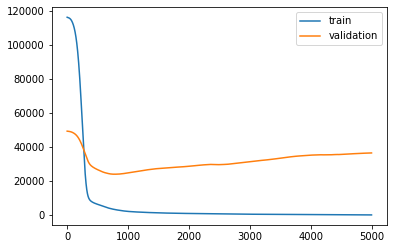

In [17]:
model3_history = model3.fit(
            standardized_X_train,
            Y_train,
            batch_size=148,
            epochs=5000,
            validation_split=0.3,
            #validation_data=(standardized_X_test,Y_test),
            callbacks=[model_checkpoint,early_stopping_monitor]
)

saved_model3 = load_model('best_model.h5')

pyplot.plot(model3_history.history['loss'], label='train')
pyplot.plot(model3_history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [18]:
predictions1 = saved_model1.predict(standardized_X_test)
predictions2 = saved_model2.predict(standardized_X_test)
predictions3 = saved_model3.predict(standardized_X_test)

# evaluate the model
train_acc1 = saved_model1.evaluate(standardized_X_train, Y_train)
train_acc2 = saved_model2.evaluate(standardized_X_train, Y_train)
train_acc3 = saved_model3.evaluate(standardized_X_train, Y_train)
test_acc = saved_model3.evaluate(standardized_X_test, Y_test)

print(saved_model1.metrics_names)
print('Model 1: ') 
print(train_acc1)
print('Model 2: ') 
print(train_acc2)
print('Model 3: ') 
print(train_acc3)
print('Test: ') 
print(test_acc)

150/150 [==============================] - 0s 33us/step
['loss', 'acc', 'mean_squared_error', 'mean_absolute_error']
Model 1: 
[14735.200531830658, 0.006756756756756757, 14735.200531830658, 69.97064162589409]
Model 2: 
[7936.863597972973, 0.013513513513513514, 7936.863597972973, 51.71497695510452]
Model 3: 
[11220.086471970017, 0.033783783783783786, 11220.086471970017, 51.3153498881572]
Test: 
[39269.153619791665, 0.0, 39269.153619791665, 153.22377176920574]


Text(0, 0.5, 'Model 3 Predicted Y')

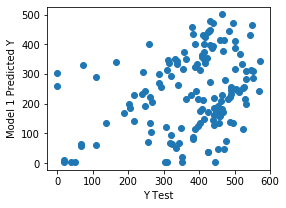

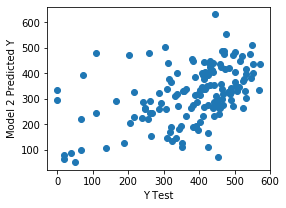

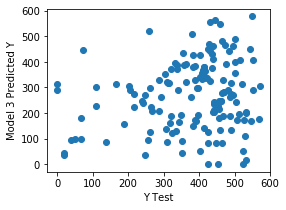

In [19]:
plt.figure(figsize=(4,3))
plt.scatter(Y_test[:200],predictions1[:200])
plt.xlabel('Y Test')
plt.ylabel('Model 1 Predicted Y')

plt.figure(figsize=(4,3))
plt.scatter(Y_test[:200],predictions2[:200])
plt.xlabel('Y Test')
plt.ylabel('Model 2 Predicted Y')

plt.figure(figsize=(4,3))
plt.scatter(Y_test[:200],predictions3[:200])
plt.xlabel('Y Test')
plt.ylabel('Model 3 Predicted Y')

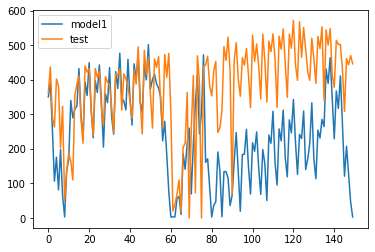

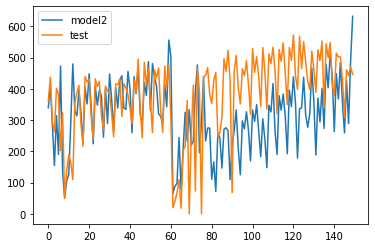

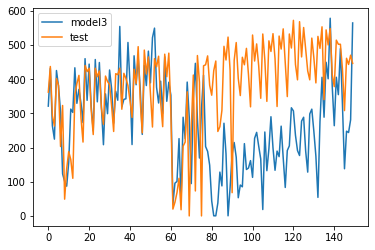

In [20]:
pyplot.plot(predictions1, label='model1')
pyplot.plot(Y_test, label='test')
pyplot.legend()
pyplot.show()

pyplot.plot(predictions2, label='model2')
pyplot.plot(Y_test, label='test')
pyplot.legend()
pyplot.show()

pyplot.plot(predictions3, label='model3')
pyplot.plot(Y_test, label='test')
pyplot.legend()
pyplot.show()